# data prepartion and expolration


In [365]:
#dfine libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import the dataset:
data=pd.read_csv('Ionosphere.csv')


#explore the data set
print('ionosphare dataset shape is ',data.shape)
data.describe().loc[['count','mean','min','max']]



ionosphare dataset shape is  (351, 35)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.00000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.00000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.11936,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.01448,0.641026
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [364]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000157F4A3E630>,
      dtype=object)

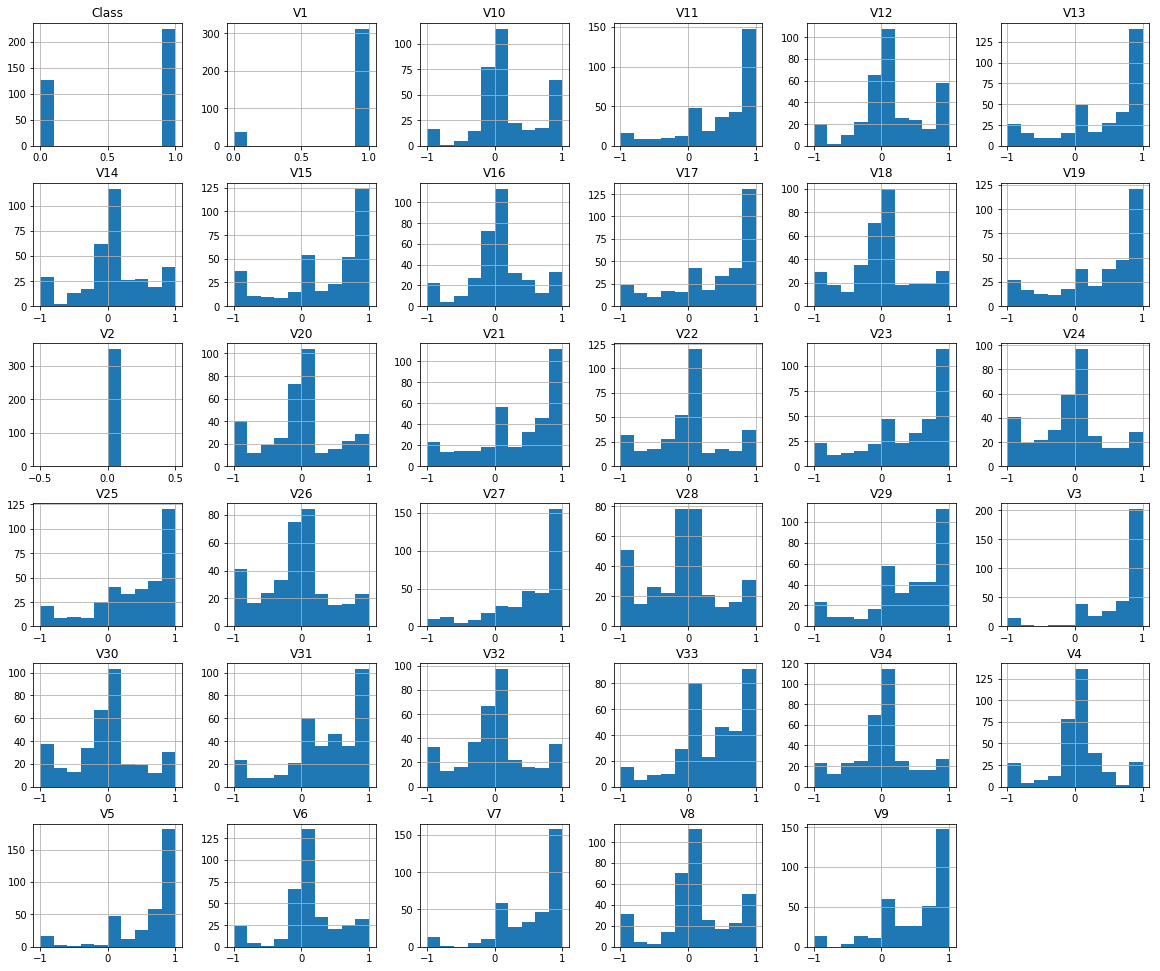

In [363]:
data.hist( figsize=(20,17))

In [362]:
#define variables
radar_class = data['Class']
features = data.drop(['Class','V2'], axis = 1)

#convert the variables to vectors
radar_class=radar_class.values
features = features.values

print(features)
print(features.shape)

[[ 1.0000e+00  9.9539e-01 -5.8890e-02 ... -5.4487e-01  1.8641e-01
  -4.5300e-01]
 [ 1.0000e+00  1.0000e+00 -1.8829e-01 ... -6.2880e-02 -1.3738e-01
  -2.4470e-02]
 [ 1.0000e+00  1.0000e+00 -3.3650e-02 ... -2.4180e-01  5.6045e-01
  -3.8238e-01]
 ...
 [ 1.0000e+00  9.4701e-01 -3.4000e-04 ...  4.4200e-03  9.2697e-01
  -5.7700e-03]
 [ 1.0000e+00  9.0608e-01 -1.6570e-02 ... -3.7570e-02  8.7403e-01
  -1.6243e-01]
 [ 1.0000e+00  8.4710e-01  1.3533e-01 ... -6.6780e-02  8.5764e-01
  -6.1510e-02]]
(351, 33)


now the data is ready to apply the machine learning algrothems. the next stage is will be to define the machine learning algrothem, traning then avaluation. we will use the multi layers perceptron neural netowrk to solve this classfication problem

# Training Machine learning algorithm and Evaluation:

In [376]:
#import libraires:
import keras 
from sklearn.model_selection import train_test_split

#Splitting the data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(features, radar_class,test_size=0.2, random_state=7)
print('train samples',X_train.shape[0])
print('test samples',X_test.shape[0])

#Building the model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(33,)))
model.add(Dropout(.2))
model.add(Dense(30, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

##tune the hperprameters of model:


train samples 280
test samples 71
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_391 (Dense)            (None, 50)                1700      
_________________________________________________________________
dropout_259 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_392 (Dense)            (None, 30)                1530      
_________________________________________________________________
dropout_260 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_393 (Dense)            (None, 1)                 31        
Total params: 3,261
Trainable params: 3,261
Non-trainable params: 0
_________________________________________________________________


In [377]:
#checkpoint
checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', verbose=1, save_best_only=True)

history=model.fit(x=X_train, y=y_train, batch_size=30, epochs=10, verbose=1, callbacks=[checkpointer], validation_split=0.2, shuffle=True)


Train on 224 samples, validate on 56 samples
Epoch 1/10
224/224 [==============================] - 16s 73ms/step - loss: 0.6533 - acc: 0.6205 - val_loss: 0.6288 - val_acc: 0.7679

Epoch 00001: val_loss improved from inf to 0.62884, saving model to weights.best.from_scratch.hdf5
Epoch 2/10
224/224 [==============================] - 0s 528us/step - loss: 0.6103 - acc: 0.7366 - val_loss: 0.5720 - val_acc: 0.8036

Epoch 00002: val_loss improved from 0.62884 to 0.57203, saving model to weights.best.from_scratch.hdf5
Epoch 3/10
224/224 [==============================] - 0s 1ms/step - loss: 0.5908 - acc: 0.7679 - val_loss: 0.5315 - val_acc: 0.8214

Epoch 00003: val_loss improved from 0.57203 to 0.53149, saving model to weights.best.from_scratch.hdf5
Epoch 4/10
224/224 [==============================] - 0s 432us/step - loss: 0.5261 - acc: 0.8348 - val_loss: 0.4971 - val_acc: 0.8393

Epoch 00004: val_loss improved from 0.53149 to 0.49712, saving model to weights.best.from_scratch.hdf5
Epoch 5/1

In [378]:
model.load_weights('weights.best.from_scratch.hdf5')
score1=model.evaluate(X_train,y_train,verbose=0)
score2=model.evaluate(X_test,y_test,verbose=0)
print('train accuracy',score1[1])
print('test accuracy',score2[1])

train accuracy 0.9107142840112958
test accuracy 0.8873239445014739


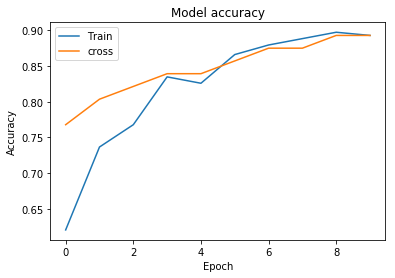

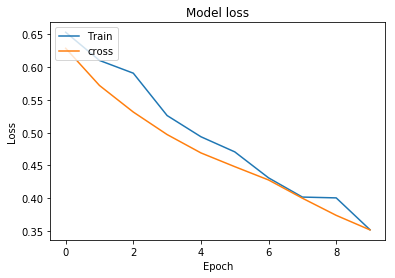

In [385]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'cross'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'cross'], loc='upper left')
plt.show()

### tune the model
The MLP model has got 88.73 %. however, the history graphs apove show that the model not training well and since the number of epochs are very low. we can improve the model performance throw a grid search method to find the best paramaters values(hyper_parameters)

In [379]:
#tune using grid search method
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def keras_model(node,drop,optimizer):
    #Building the model
    model = Sequential()
    model.add(Dense(node, activation='relu', input_shape=(33,)))
    model.add(Dropout(drop))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(drop))
    model.add(Dense(1, activation='sigmoid'))

    #Compiling the model
    model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = keras_model)
parameters = {'batch_size': [20, 30],
              'epochs': [10, 100],
              'optimizer': ['adam', 'rmsprop'],
              'drop':[0.1,0.2],
              'node':[50,70,80] }
grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/10
252/252 [==============================] - 6s 22ms/step - loss: 0.6613 - acc: 0.6508
Epoch 2/10
252/252 [==============================] - 0s 570us/step - loss: 0.5722 - acc: 0.7738
Epoch 3/10
252/252 [==============================] - 0s 554us/step - loss: 0.5096 - acc: 0.7976
Epoch 4/10
252/252 [==============================] - 0s 435us/step - loss: 0.4737 - acc: 0.8373
Epoch 5/10
252/252 [==============================] - 0s 467us/step - loss: 0.4280 - acc: 0.8889
Epoch 6/10
252/252 [==============================] - 0s 431us/step - loss: 0.3849 - acc: 0.9048
Epoch 7/10
252/252 [==============================] - 0s 511us/step - loss: 0.3353 - acc: 0.9286
Epoch 8/10
252/252 [==============================] - 0s 443us/step - loss: 0.3134 - acc: 0.9206
Epoch 9/10
252/252 [==============================] - 0s 491us/step - loss: 0.2767 - acc: 0.9246
Epoch 10/10
252/252 [==============================] - 0s 463us/step - loss: 0.2538 - acc: 0.9246
Epoch 1/10
252/252 [==========

252/252 [==============================] - 0s 463us/step - loss: 0.2677 - acc: 0.9127
Epoch 10/10
252/252 [==============================] - 0s 435us/step - loss: 0.2492 - acc: 0.9167
Epoch 1/10
252/252 [==============================] - 7s 27ms/step - loss: 0.6761 - acc: 0.5754
Epoch 2/10
252/252 [==============================] - 0s 471us/step - loss: 0.5629 - acc: 0.7381
Epoch 3/10
252/252 [==============================] - 0s 404us/step - loss: 0.5159 - acc: 0.7738
Epoch 4/10
252/252 [==============================] - 0s 400us/step - loss: 0.4783 - acc: 0.7857
Epoch 5/10
252/252 [==============================] - 0s 380us/step - loss: 0.4304 - acc: 0.8571
Epoch 6/10
252/252 [==============================] - 0s 427us/step - loss: 0.3994 - acc: 0.8889
Epoch 7/10
252/252 [==============================] - 0s 412us/step - loss: 0.3619 - acc: 0.9087
Epoch 8/10
252/252 [==============================] - 0s 408us/step - loss: 0.3245 - acc: 0.9286
Epoch 9/10
252/252 [=====================

252/252 [==============================] - 0s 443us/step - loss: 0.3071 - acc: 0.9246
Epoch 8/10
252/252 [==============================] - 0s 408us/step - loss: 0.2705 - acc: 0.9167
Epoch 9/10
252/252 [==============================] - 0s 463us/step - loss: 0.2533 - acc: 0.9286
Epoch 10/10
252/252 [==============================] - 0s 404us/step - loss: 0.2072 - acc: 0.9484
Epoch 1/10
252/252 [==============================] - 7s 29ms/step - loss: 0.5783 - acc: 0.7063
Epoch 2/10
252/252 [==============================] - 0s 423us/step - loss: 0.5144 - acc: 0.7579
Epoch 3/10
252/252 [==============================] - 0s 435us/step - loss: 0.4579 - acc: 0.8373
Epoch 4/10
252/252 [==============================] - 0s 483us/step - loss: 0.4127 - acc: 0.8651
Epoch 5/10
252/252 [==============================] - 0s 451us/step - loss: 0.3690 - acc: 0.8929
Epoch 6/10
252/252 [==============================] - 0s 467us/step - loss: 0.3460 - acc: 0.9206
Epoch 7/10
252/252 [=====================

252/252 [==============================] - 0s 863us/step - loss: 0.3036 - acc: 0.9127
Epoch 6/10
252/252 [==============================] - 0s 526us/step - loss: 0.2769 - acc: 0.9246
Epoch 7/10
252/252 [==============================] - 0s 629us/step - loss: 0.2439 - acc: 0.9365
Epoch 8/10
252/252 [==============================] - 0s 443us/step - loss: 0.2208 - acc: 0.9365
Epoch 9/10
252/252 [==============================] - 0s 431us/step - loss: 0.1976 - acc: 0.9405
Epoch 10/10
252/252 [==============================] - 0s 451us/step - loss: 0.1813 - acc: 0.9563
Epoch 1/10
252/252 [==============================] - 7s 30ms/step - loss: 0.6093 - acc: 0.7024
Epoch 2/10
252/252 [==============================] - 0s 542us/step - loss: 0.5120 - acc: 0.7937
Epoch 3/10
252/252 [==============================] - 0s 451us/step - loss: 0.4493 - acc: 0.8413
Epoch 4/10
252/252 [==============================] - 0s 431us/step - loss: 0.3918 - acc: 0.8929
Epoch 5/10
252/252 [=====================

252/252 [==============================] - 0s 538us/step - loss: 0.0512 - acc: 0.9841
Epoch 73/100
252/252 [==============================] - 0s 447us/step - loss: 0.0336 - acc: 0.9960
Epoch 74/100
252/252 [==============================] - 0s 542us/step - loss: 0.0263 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 511us/step - loss: 0.0293 - acc: 0.9960
Epoch 76/100
252/252 [==============================] - 0s 447us/step - loss: 0.0262 - acc: 0.9921
Epoch 77/100
252/252 [==============================] - 0s 459us/step - loss: 0.0342 - acc: 0.9881
Epoch 78/100
252/252 [==============================] - 0s 487us/step - loss: 0.0343 - acc: 0.9921
Epoch 79/100
252/252 [==============================] - 0s 514us/step - loss: 0.0281 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 455us/step - loss: 0.0351 - acc: 0.9921
Epoch 81/100
252/252 [==============================] - 0s 447us/step - loss: 0.0321 - acc: 0.9921
Epoch 82/100
252/252 [=

Epoch 55/100
252/252 [==============================] - 0s 582us/step - loss: 0.0444 - acc: 0.9960
Epoch 56/100
252/252 [==============================] - 0s 503us/step - loss: 0.0380 - acc: 0.9881
Epoch 57/100
252/252 [==============================] - 0s 451us/step - loss: 0.0416 - acc: 0.9960
Epoch 58/100
252/252 [==============================] - 0s 606us/step - loss: 0.0341 - acc: 0.9921
Epoch 59/100
252/252 [==============================] - 0s 598us/step - loss: 0.0288 - acc: 0.9960
Epoch 60/100
252/252 [==============================] - 0s 546us/step - loss: 0.0475 - acc: 0.9802
Epoch 61/100
252/252 [==============================] - 0s 744us/step - loss: 0.0415 - acc: 0.9960
Epoch 62/100
252/252 [==============================] - 0s 621us/step - loss: 0.0367 - acc: 0.9921
Epoch 63/100
252/252 [==============================] - 0s 606us/step - loss: 0.0295 - acc: 0.9921
Epoch 64/100
252/252 [==============================] - 0s 542us/step - loss: 0.0370 - acc: 0.9921
Epoch 65/1

Epoch 20/100
252/252 [==============================] - 0s 629us/step - loss: 0.1098 - acc: 0.9762
Epoch 21/100
252/252 [==============================] - 0s 566us/step - loss: 0.1279 - acc: 0.9524
Epoch 22/100
252/252 [==============================] - 0s 554us/step - loss: 0.1045 - acc: 0.9722
Epoch 23/100
252/252 [==============================] - 0s 514us/step - loss: 0.1142 - acc: 0.9722
Epoch 24/100
252/252 [==============================] - 0s 598us/step - loss: 0.0983 - acc: 0.9802
Epoch 25/100
252/252 [==============================] - 0s 590us/step - loss: 0.1043 - acc: 0.9762
Epoch 26/100
252/252 [==============================] - 0s 550us/step - loss: 0.0920 - acc: 0.9722
Epoch 27/100
252/252 [==============================] - 0s 621us/step - loss: 0.0873 - acc: 0.9762
Epoch 28/100
252/252 [==============================] - 0s 625us/step - loss: 0.0930 - acc: 0.9802
Epoch 29/100
252/252 [==============================] - 0s 562us/step - loss: 0.0755 - acc: 0.9841
Epoch 30/1

Epoch 85/100
252/252 [==============================] - 0s 538us/step - loss: 0.0067 - acc: 1.0000
Epoch 86/100
252/252 [==============================] - 0s 546us/step - loss: 0.0086 - acc: 1.0000
Epoch 87/100
252/252 [==============================] - 0s 483us/step - loss: 0.0051 - acc: 1.0000
Epoch 88/100
252/252 [==============================] - 0s 522us/step - loss: 0.0054 - acc: 1.0000
Epoch 89/100
252/252 [==============================] - 0s 483us/step - loss: 0.0143 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 483us/step - loss: 0.0099 - acc: 1.0000
Epoch 91/100
252/252 [==============================] - 0s 487us/step - loss: 0.0103 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 455us/step - loss: 0.0089 - acc: 1.0000
Epoch 93/100
252/252 [==============================] - 0s 455us/step - loss: 0.0060 - acc: 1.0000
Epoch 94/100
252/252 [==============================] - 0s 455us/step - loss: 0.0061 - acc: 1.0000
Epoch 95/1

Epoch 50/100
252/252 [==============================] - 0s 483us/step - loss: 0.0538 - acc: 0.9881
Epoch 51/100
252/252 [==============================] - 0s 522us/step - loss: 0.0685 - acc: 0.9802
Epoch 52/100
252/252 [==============================] - 0s 467us/step - loss: 0.0677 - acc: 0.9841
Epoch 53/100
252/252 [==============================] - 0s 483us/step - loss: 0.0458 - acc: 0.9921
Epoch 54/100
252/252 [==============================] - 0s 475us/step - loss: 0.0468 - acc: 0.9881
Epoch 55/100
252/252 [==============================] - 0s 467us/step - loss: 0.0477 - acc: 0.9881
Epoch 56/100
252/252 [==============================] - 0s 491us/step - loss: 0.0428 - acc: 0.9881
Epoch 57/100
252/252 [==============================] - 0s 451us/step - loss: 0.0389 - acc: 0.9960
Epoch 58/100
252/252 [==============================] - 0s 459us/step - loss: 0.0319 - acc: 0.9960
Epoch 59/100
252/252 [==============================] - 0s 467us/step - loss: 0.0390 - acc: 0.9960
Epoch 60/1

Epoch 15/100
252/252 [==============================] - 0s 483us/step - loss: 0.1852 - acc: 0.9444
Epoch 16/100
252/252 [==============================] - 0s 503us/step - loss: 0.1720 - acc: 0.9444
Epoch 17/100
252/252 [==============================] - 0s 471us/step - loss: 0.1552 - acc: 0.9563
Epoch 18/100
252/252 [==============================] - 0s 511us/step - loss: 0.1476 - acc: 0.9524
Epoch 19/100
252/252 [==============================] - 0s 578us/step - loss: 0.1351 - acc: 0.9603
Epoch 20/100
252/252 [==============================] - 0s 483us/step - loss: 0.1254 - acc: 0.9603
Epoch 21/100
252/252 [==============================] - 0s 613us/step - loss: 0.1217 - acc: 0.9643
Epoch 22/100
252/252 [==============================] - 0s 827us/step - loss: 0.1269 - acc: 0.9563
Epoch 23/100
252/252 [==============================] - 0s 728us/step - loss: 0.1137 - acc: 0.9643
Epoch 24/100
252/252 [==============================] - 0s 511us/step - loss: 0.1070 - acc: 0.9722
Epoch 25/1

252/252 [==============================] - 0s 728us/step - loss: 0.0284 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 764us/step - loss: 0.0290 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 526us/step - loss: 0.0297 - acc: 0.9921
Epoch 82/100
252/252 [==============================] - 0s 514us/step - loss: 0.0431 - acc: 0.9921
Epoch 83/100
252/252 [==============================] - 0s 665us/step - loss: 0.0294 - acc: 0.9921
Epoch 84/100
252/252 [==============================] - 0s 510us/step - loss: 0.0425 - acc: 0.9921
Epoch 85/100
252/252 [==============================] - 0s 542us/step - loss: 0.0291 - acc: 0.9921
Epoch 86/100
252/252 [==============================] - 0s 511us/step - loss: 0.0299 - acc: 0.9881
Epoch 87/100
252/252 [==============================] - 0s 574us/step - loss: 0.0276 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 522us/step - loss: 0.0282 - acc: 0.9960
Epoch 89/100
252/252 [=

Epoch 62/100
252/252 [==============================] - 0s 507us/step - loss: 0.0381 - acc: 0.9881
Epoch 63/100
252/252 [==============================] - 0s 499us/step - loss: 0.0389 - acc: 0.9881
Epoch 64/100
252/252 [==============================] - 0s 538us/step - loss: 0.0323 - acc: 0.9921
Epoch 65/100
252/252 [==============================] - 0s 479us/step - loss: 0.0372 - acc: 0.9921
Epoch 66/100
252/252 [==============================] - 0s 459us/step - loss: 0.0355 - acc: 0.9921
Epoch 67/100
252/252 [==============================] - 0s 511us/step - loss: 0.0288 - acc: 0.9921
Epoch 68/100
252/252 [==============================] - 0s 649us/step - loss: 0.0368 - acc: 0.9921
Epoch 69/100
252/252 [==============================] - 0s 863us/step - loss: 0.0279 - acc: 0.9881
Epoch 70/100
252/252 [==============================] - 0s 594us/step - loss: 0.0422 - acc: 0.9881
Epoch 71/100
252/252 [==============================] - 0s 732us/step - loss: 0.0258 - acc: 0.9921
Epoch 72/1

Epoch 27/100
252/252 [==============================] - 0s 475us/step - loss: 0.1020 - acc: 0.9683
Epoch 28/100
252/252 [==============================] - 0s 459us/step - loss: 0.0978 - acc: 0.9722
Epoch 29/100
252/252 [==============================] - 0s 467us/step - loss: 0.0917 - acc: 0.9683
Epoch 30/100
252/252 [==============================] - 0s 451us/step - loss: 0.0929 - acc: 0.9683
Epoch 31/100
252/252 [==============================] - 0s 467us/step - loss: 0.0815 - acc: 0.9722
Epoch 32/100
252/252 [==============================] - 0s 455us/step - loss: 0.0851 - acc: 0.9722
Epoch 33/100
252/252 [==============================] - 0s 511us/step - loss: 0.0744 - acc: 0.9841
Epoch 34/100
252/252 [==============================] - 0s 499us/step - loss: 0.0773 - acc: 0.9762
Epoch 35/100
252/252 [==============================] - 0s 455us/step - loss: 0.0827 - acc: 0.9722
Epoch 36/100
252/252 [==============================] - 0s 463us/step - loss: 0.0737 - acc: 0.9722
Epoch 37/1

252/252 [==============================] - 0s 550us/step - loss: 0.0244 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 499us/step - loss: 0.0214 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 637us/step - loss: 0.0205 - acc: 0.9960
Epoch 94/100
252/252 [==============================] - 0s 574us/step - loss: 0.0188 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 726us/step - loss: 0.0238 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 570us/step - loss: 0.0277 - acc: 0.9960
Epoch 97/100
252/252 [==============================] - 0s 613us/step - loss: 0.0193 - acc: 0.9960
Epoch 98/100
252/252 [==============================] - 0s 609us/step - loss: 0.0231 - acc: 0.9921
Epoch 99/100
252/252 [==============================] - 0s 657us/step - loss: 0.0222 - acc: 0.9960
Epoch 100/100
252/252 [==============================] - 0s 566us/step - loss: 0.0187 - acc: 0.9960
Epoch 1/100
252/252 [=

Epoch 74/100
252/252 [==============================] - 0s 530us/step - loss: 0.0047 - acc: 1.0000
Epoch 75/100
252/252 [==============================] - 0s 467us/step - loss: 0.0034 - acc: 1.0000
Epoch 76/100
252/252 [==============================] - 0s 518us/step - loss: 0.0061 - acc: 1.0000
Epoch 77/100
252/252 [==============================] - 0s 582us/step - loss: 0.0050 - acc: 1.0000
Epoch 78/100
252/252 [==============================] - 0s 997us/step - loss: 0.0040 - acc: 1.0000
Epoch 79/100
252/252 [==============================] - 0s 578us/step - loss: 0.0034 - acc: 1.0000
Epoch 80/100
252/252 [==============================] - 0s 530us/step - loss: 0.0022 - acc: 1.0000
Epoch 81/100
252/252 [==============================] - 0s 843us/step - loss: 0.0022 - acc: 1.0000
Epoch 82/100
252/252 [==============================] - 0s 594us/step - loss: 0.0030 - acc: 1.0000
Epoch 83/100
252/252 [==============================] - 0s 514us/step - loss: 0.0014 - acc: 1.0000
Epoch 84/1

Epoch 39/100
252/252 [==============================] - 0s 463us/step - loss: 0.0602 - acc: 0.9802
Epoch 40/100
252/252 [==============================] - 0s 457us/step - loss: 0.0547 - acc: 0.9841
Epoch 41/100
252/252 [==============================] - 0s 475us/step - loss: 0.0539 - acc: 0.9881
Epoch 42/100
252/252 [==============================] - 0s 471us/step - loss: 0.0474 - acc: 0.9881
Epoch 43/100
252/252 [==============================] - 0s 641us/step - loss: 0.0478 - acc: 0.9841
Epoch 44/100
252/252 [==============================] - 0s 665us/step - loss: 0.0546 - acc: 0.9841
Epoch 45/100
252/252 [==============================] - 0s 673us/step - loss: 0.0445 - acc: 0.9881
Epoch 46/100
252/252 [==============================] - 0s 522us/step - loss: 0.0466 - acc: 0.9841
Epoch 47/100
252/252 [==============================] - 0s 467us/step - loss: 0.0559 - acc: 0.9841
Epoch 48/100
252/252 [==============================] - 0s 455us/step - loss: 0.0444 - acc: 0.9881
Epoch 49/1

252/252 [==============================] - 0s 546us/step - loss: 0.4856 - acc: 0.8373
Epoch 4/100
252/252 [==============================] - 0s 475us/step - loss: 0.4435 - acc: 0.8611
Epoch 5/100
252/252 [==============================] - 0s 459us/step - loss: 0.4044 - acc: 0.8770
Epoch 6/100
252/252 [==============================] - 0s 689us/step - loss: 0.3621 - acc: 0.9008
Epoch 7/100
252/252 [==============================] - 0s 550us/step - loss: 0.3183 - acc: 0.9206
Epoch 8/100
252/252 [==============================] - 0s 479us/step - loss: 0.2971 - acc: 0.9206
Epoch 9/100
252/252 [==============================] - 0s 522us/step - loss: 0.2666 - acc: 0.9206
Epoch 10/100
252/252 [==============================] - 0s 499us/step - loss: 0.2534 - acc: 0.9206
Epoch 11/100
252/252 [==============================] - 0s 499us/step - loss: 0.2313 - acc: 0.9286
Epoch 12/100
252/252 [==============================] - 0s 514us/step - loss: 0.1965 - acc: 0.9405
Epoch 13/100
252/252 [=======

Epoch 86/100
252/252 [==============================] - 0s 487us/step - loss: 0.0190 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 554us/step - loss: 0.0257 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 514us/step - loss: 0.0164 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 467us/step - loss: 0.0211 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 475us/step - loss: 0.0213 - acc: 0.9921
Epoch 91/100
252/252 [==============================] - 0s 459us/step - loss: 0.0183 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 507us/step - loss: 0.0224 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 479us/step - loss: 0.0187 - acc: 0.9921
Epoch 94/100
252/252 [==============================] - 0s 459us/step - loss: 0.0194 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 455us/step - loss: 0.0162 - acc: 0.9960
Epoch 96/1

Epoch 51/100
252/252 [==============================] - 0s 483us/step - loss: 0.0421 - acc: 0.9921
Epoch 52/100
252/252 [==============================] - 0s 522us/step - loss: 0.0423 - acc: 0.9960
Epoch 53/100
252/252 [==============================] - 0s 499us/step - loss: 0.0419 - acc: 0.9881
Epoch 54/100
252/252 [==============================] - 0s 522us/step - loss: 0.0347 - acc: 0.9841
Epoch 55/100
252/252 [==============================] - 0s 511us/step - loss: 0.0272 - acc: 0.9960
Epoch 56/100
252/252 [==============================] - 0s 522us/step - loss: 0.0323 - acc: 0.9960
Epoch 57/100
252/252 [==============================] - 0s 558us/step - loss: 0.0309 - acc: 0.9960
Epoch 58/100
252/252 [==============================] - 0s 483us/step - loss: 0.0336 - acc: 0.9921
Epoch 59/100
252/252 [==============================] - 0s 487us/step - loss: 0.0366 - acc: 0.9960
Epoch 60/100
252/252 [==============================] - 0s 467us/step - loss: 0.0304 - acc: 0.9960
Epoch 61/1

Epoch 16/100
252/252 [==============================] - 0s 522us/step - loss: 0.1199 - acc: 0.9683
Epoch 17/100
252/252 [==============================] - 0s 538us/step - loss: 0.1149 - acc: 0.9603
Epoch 18/100
252/252 [==============================] - 0s 499us/step - loss: 0.1218 - acc: 0.9683
Epoch 19/100
252/252 [==============================] - 0s 463us/step - loss: 0.1103 - acc: 0.9683
Epoch 20/100
252/252 [==============================] - 0s 514us/step - loss: 0.1042 - acc: 0.9722
Epoch 21/100
252/252 [==============================] - 0s 598us/step - loss: 0.0993 - acc: 0.9722
Epoch 22/100
252/252 [==============================] - 0s 673us/step - loss: 0.0901 - acc: 0.9802
Epoch 23/100
252/252 [==============================] - 0s 594us/step - loss: 0.0732 - acc: 0.9802
Epoch 24/100
252/252 [==============================] - 0s 621us/step - loss: 0.0893 - acc: 0.9841
Epoch 25/100
252/252 [==============================] - 0s 613us/step - loss: 0.0782 - acc: 0.9841
Epoch 26/1

Epoch 81/100
252/252 [==============================] - 0s 526us/step - loss: 0.0263 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 649us/step - loss: 0.0290 - acc: 0.9960
Epoch 83/100
252/252 [==============================] - 0s 522us/step - loss: 0.0313 - acc: 0.9921
Epoch 84/100
252/252 [==============================] - 0s 621us/step - loss: 0.0251 - acc: 0.9921
Epoch 85/100
252/252 [==============================] - 0s 526us/step - loss: 0.0272 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 633us/step - loss: 0.0214 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 625us/step - loss: 0.0252 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 863us/step - loss: 0.0148 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 530us/step - loss: 0.0215 - acc: 0.9921
Epoch 90/100
252/252 [==============================] - 0s 491us/step - loss: 0.0172 - acc: 0.9960
Epoch 91/1

Epoch 64/100
252/252 [==============================] - 0s 562us/step - loss: 0.0094 - acc: 1.0000
Epoch 65/100
252/252 [==============================] - 0s 984us/step - loss: 0.0151 - acc: 0.9960
Epoch 66/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0076 - acc: 1.0000
Epoch 67/100
252/252 [==============================] - 0s 910us/step - loss: 0.0124 - acc: 1.0000
Epoch 68/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0140 - acc: 0.9960
Epoch 69/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0135 - acc: 0.9921
Epoch 70/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0081 - acc: 1.0000
Epoch 71/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0102 - acc: 1.0000
Epoch 72/100
252/252 [==============================] - 0s 2ms/step - loss: 0.0078 - acc: 1.0000
Epoch 73/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0099 - acc: 0.9960
Epoch 74/100
252/252 [==

252/252 [==============================] - 0s 499us/step - loss: 0.0470 - acc: 0.9841
Epoch 48/100
252/252 [==============================] - 0s 554us/step - loss: 0.0460 - acc: 0.9881
Epoch 49/100
252/252 [==============================] - 0s 621us/step - loss: 0.0471 - acc: 0.9921
Epoch 50/100
252/252 [==============================] - 0s 582us/step - loss: 0.0412 - acc: 0.9881
Epoch 51/100
252/252 [==============================] - 0s 602us/step - loss: 0.0475 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 633us/step - loss: 0.0385 - acc: 0.9960
Epoch 53/100
252/252 [==============================] - 0s 629us/step - loss: 0.0505 - acc: 0.9921
Epoch 54/100
252/252 [==============================] - 0s 562us/step - loss: 0.0399 - acc: 0.9841
Epoch 55/100
252/252 [==============================] - 0s 495us/step - loss: 0.0398 - acc: 0.9921
Epoch 56/100
252/252 [==============================] - 0s 558us/step - loss: 0.0393 - acc: 0.9881
Epoch 57/100
252/252 [=

252/252 [==============================] - 0s 526us/step - loss: 0.0730 - acc: 0.9802
Epoch 31/100
252/252 [==============================] - 0s 558us/step - loss: 0.0546 - acc: 0.9841
Epoch 32/100
252/252 [==============================] - 0s 495us/step - loss: 0.0727 - acc: 0.9762
Epoch 33/100
252/252 [==============================] - 0s 507us/step - loss: 0.0534 - acc: 0.9881
Epoch 34/100
252/252 [==============================] - 0s 530us/step - loss: 0.0689 - acc: 0.9762
Epoch 35/100
252/252 [==============================] - 0s 590us/step - loss: 0.0531 - acc: 0.9881
Epoch 36/100
252/252 [==============================] - 0s 550us/step - loss: 0.0582 - acc: 0.9802
Epoch 37/100
252/252 [==============================] - 0s 514us/step - loss: 0.0536 - acc: 0.9841
Epoch 38/100
252/252 [==============================] - 0s 503us/step - loss: 0.0568 - acc: 0.9921
Epoch 39/100
252/252 [==============================] - 0s 657us/step - loss: 0.0468 - acc: 0.9921
Epoch 40/100
252/252 [=

Epoch 13/100
252/252 [==============================] - 0s 613us/step - loss: 0.1502 - acc: 0.9603
Epoch 14/100
252/252 [==============================] - 0s 530us/step - loss: 0.1359 - acc: 0.9603
Epoch 15/100
252/252 [==============================] - 0s 697us/step - loss: 0.1268 - acc: 0.9603
Epoch 16/100
252/252 [==============================] - 0s 637us/step - loss: 0.1146 - acc: 0.9643
Epoch 17/100
252/252 [==============================] - 0s 566us/step - loss: 0.1128 - acc: 0.9683
Epoch 18/100
252/252 [==============================] - 0s 641us/step - loss: 0.1087 - acc: 0.9643
Epoch 19/100
252/252 [==============================] - 0s 641us/step - loss: 0.0957 - acc: 0.9762
Epoch 20/100
252/252 [==============================] - 0s 665us/step - loss: 0.1023 - acc: 0.9683
Epoch 21/100
252/252 [==============================] - 0s 613us/step - loss: 0.0952 - acc: 0.9762
Epoch 22/100
252/252 [==============================] - 0s 621us/step - loss: 0.0942 - acc: 0.9802
Epoch 23/1

Epoch 78/100
252/252 [==============================] - 0s 602us/step - loss: 0.0240 - acc: 0.9921
Epoch 79/100
252/252 [==============================] - 0s 633us/step - loss: 0.0307 - acc: 0.9921
Epoch 80/100
252/252 [==============================] - 0s 594us/step - loss: 0.0170 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 590us/step - loss: 0.0250 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 594us/step - loss: 0.0187 - acc: 0.9960
Epoch 83/100
252/252 [==============================] - 0s 578us/step - loss: 0.0255 - acc: 0.9921
Epoch 84/100
252/252 [==============================] - 0s 538us/step - loss: 0.0311 - acc: 0.9921
Epoch 85/100
252/252 [==============================] - 0s 554us/step - loss: 0.0281 - acc: 0.9921
Epoch 86/100
252/252 [==============================] - 0s 518us/step - loss: 0.0189 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 566us/step - loss: 0.0248 - acc: 0.9960
Epoch 88/1

252/252 [==============================] - 0s 617us/step - loss: 0.0485 - acc: 0.9921
Epoch 43/100
252/252 [==============================] - 0s 609us/step - loss: 0.0411 - acc: 0.9841
Epoch 44/100
252/252 [==============================] - 0s 716us/step - loss: 0.0455 - acc: 0.9841
Epoch 45/100
252/252 [==============================] - 0s 645us/step - loss: 0.0445 - acc: 0.9881
Epoch 46/100
252/252 [==============================] - 0s 851us/step - loss: 0.0488 - acc: 0.9881
Epoch 47/100
252/252 [==============================] - 0s 649us/step - loss: 0.0383 - acc: 0.9960
Epoch 48/100
252/252 [==============================] - 0s 708us/step - loss: 0.0292 - acc: 0.9921
Epoch 49/100
252/252 [==============================] - 0s 629us/step - loss: 0.0448 - acc: 0.9762
Epoch 50/100
252/252 [==============================] - 0s 621us/step - loss: 0.0352 - acc: 0.9921
Epoch 51/100
252/252 [==============================] - 0s 621us/step - loss: 0.0261 - acc: 0.9960
Epoch 52/100
252/252 [=

Epoch 25/100
252/252 [==============================] - 0s 564us/step - loss: 0.0867 - acc: 0.9683
Epoch 26/100
252/252 [==============================] - 0s 562us/step - loss: 0.0960 - acc: 0.9683
Epoch 27/100
252/252 [==============================] - 0s 554us/step - loss: 0.0812 - acc: 0.9762
Epoch 28/100
252/252 [==============================] - 0s 499us/step - loss: 0.0794 - acc: 0.9802
Epoch 29/100
252/252 [==============================] - 0s 562us/step - loss: 0.0719 - acc: 0.9762
Epoch 30/100
252/252 [==============================] - 0s 514us/step - loss: 0.0867 - acc: 0.9683
Epoch 31/100
252/252 [==============================] - 0s 697us/step - loss: 0.0682 - acc: 0.9841
Epoch 32/100
252/252 [==============================] - 0s 538us/step - loss: 0.0682 - acc: 0.9722
Epoch 33/100
252/252 [==============================] - 0s 518us/step - loss: 0.0568 - acc: 0.9881
Epoch 34/100
252/252 [==============================] - 0s 471us/step - loss: 0.0620 - acc: 0.9802
Epoch 35/1

252/252 [==============================] - 0s 550us/step - loss: 0.0219 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 507us/step - loss: 0.0159 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 491us/step - loss: 0.0149 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 602us/step - loss: 0.0203 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 542us/step - loss: 0.0240 - acc: 0.9960
Epoch 94/100
252/252 [==============================] - 0s 526us/step - loss: 0.0137 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 518us/step - loss: 0.0151 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 467us/step - loss: 0.0176 - acc: 0.9960
Epoch 97/100
252/252 [==============================] - 0s 475us/step - loss: 0.0159 - acc: 0.9960
Epoch 98/100
252/252 [==============================] - 0s 479us/step - loss: 0.0153 - acc: 0.9960
Epoch 99/100
252/252 [=

Epoch 72/100
252/252 [==============================] - 0s 526us/step - loss: 0.0155 - acc: 0.9960
Epoch 73/100
252/252 [==============================] - 0s 499us/step - loss: 0.0200 - acc: 0.9960
Epoch 74/100
252/252 [==============================] - 0s 574us/step - loss: 0.0172 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 514us/step - loss: 0.0236 - acc: 0.9960
Epoch 76/100
252/252 [==============================] - 0s 491us/step - loss: 0.0234 - acc: 0.9960
Epoch 77/100
252/252 [==============================] - 0s 503us/step - loss: 0.0188 - acc: 0.9960
Epoch 78/100
252/252 [==============================] - 0s 522us/step - loss: 0.0141 - acc: 0.9960
Epoch 79/100
252/252 [==============================] - 0s 582us/step - loss: 0.0261 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 507us/step - loss: 0.0179 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 479us/step - loss: 0.0075 - acc: 1.0000
Epoch 82/1

252/252 [==============================] - 0s 503us/step - loss: 0.0518 - acc: 0.9841
Epoch 37/100
252/252 [==============================] - 0s 518us/step - loss: 0.0524 - acc: 0.9881
Epoch 38/100
252/252 [==============================] - 0s 518us/step - loss: 0.0539 - acc: 0.9881
Epoch 39/100
252/252 [==============================] - 0s 566us/step - loss: 0.0424 - acc: 0.9841
Epoch 40/100
252/252 [==============================] - 0s 483us/step - loss: 0.0522 - acc: 0.9841
Epoch 41/100
252/252 [==============================] - 0s 487us/step - loss: 0.0476 - acc: 0.9881
Epoch 42/100
252/252 [==============================] - 0s 526us/step - loss: 0.0495 - acc: 0.9802
Epoch 43/100
252/252 [==============================] - 0s 483us/step - loss: 0.0377 - acc: 0.9921
Epoch 44/100
252/252 [==============================] - 0s 491us/step - loss: 0.0506 - acc: 0.9841
Epoch 45/100
252/252 [==============================] - 0s 467us/step - loss: 0.0448 - acc: 0.9802
Epoch 46/100
252/252 [=

Epoch 19/100
252/252 [==============================] - 0s 511us/step - loss: 0.1161 - acc: 0.9643
Epoch 20/100
252/252 [==============================] - 0s 522us/step - loss: 0.1010 - acc: 0.9722
Epoch 21/100
252/252 [==============================] - 0s 554us/step - loss: 0.0988 - acc: 0.9683
Epoch 22/100
252/252 [==============================] - 0s 550us/step - loss: 0.0907 - acc: 0.9762
Epoch 23/100
252/252 [==============================] - 0s 511us/step - loss: 0.0823 - acc: 0.9683
Epoch 24/100
252/252 [==============================] - 0s 483us/step - loss: 0.0745 - acc: 0.9762
Epoch 25/100
252/252 [==============================] - 0s 479us/step - loss: 0.0819 - acc: 0.9881
Epoch 26/100
252/252 [==============================] - 0s 526us/step - loss: 0.0694 - acc: 0.9841
Epoch 27/100
252/252 [==============================] - 0s 526us/step - loss: 0.0698 - acc: 0.9841
Epoch 28/100
252/252 [==============================] - 0s 566us/step - loss: 0.0735 - acc: 0.9841
Epoch 29/1

252/252 [==============================] - 0s 617us/step - loss: 0.0166 - acc: 0.9960
Epoch 84/100
252/252 [==============================] - 0s 598us/step - loss: 0.0173 - acc: 0.9960
Epoch 85/100
252/252 [==============================] - 0s 570us/step - loss: 0.0171 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 514us/step - loss: 0.0217 - acc: 0.9921
Epoch 87/100
252/252 [==============================] - 0s 562us/step - loss: 0.0228 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 511us/step - loss: 0.0136 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 542us/step - loss: 0.0110 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 518us/step - loss: 0.0159 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 558us/step - loss: 0.0128 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 526us/step - loss: 0.0140 - acc: 0.9960
Epoch 93/100
252/252 [=

Epoch 66/100
252/252 [==============================] - 0s 641us/step - loss: 0.0242 - acc: 0.9960
Epoch 67/100
252/252 [==============================] - 0s 617us/step - loss: 0.0287 - acc: 0.9960
Epoch 68/100
252/252 [==============================] - 0s 637us/step - loss: 0.0182 - acc: 0.9960
Epoch 69/100
252/252 [==============================] - 0s 590us/step - loss: 0.0262 - acc: 0.9921
Epoch 70/100
252/252 [==============================] - 0s 586us/step - loss: 0.0182 - acc: 0.9921
Epoch 71/100
252/252 [==============================] - 0s 697us/step - loss: 0.0212 - acc: 0.9960
Epoch 72/100
252/252 [==============================] - 0s 479us/step - loss: 0.0229 - acc: 0.9960
Epoch 73/100
252/252 [==============================] - 0s 518us/step - loss: 0.0228 - acc: 0.9960
Epoch 74/100
252/252 [==============================] - 0s 554us/step - loss: 0.0167 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 582us/step - loss: 0.0306 - acc: 0.9921
Epoch 76/1

Epoch 31/100
252/252 [==============================] - 0s 578us/step - loss: 0.0697 - acc: 0.9762
Epoch 32/100
252/252 [==============================] - 0s 538us/step - loss: 0.0739 - acc: 0.9841
Epoch 33/100
252/252 [==============================] - 0s 499us/step - loss: 0.0636 - acc: 0.9802
Epoch 34/100
252/252 [==============================] - 0s 542us/step - loss: 0.0522 - acc: 0.9841
Epoch 35/100
252/252 [==============================] - 0s 887us/step - loss: 0.0491 - acc: 0.9881
Epoch 36/100
252/252 [==============================] - 0s 689us/step - loss: 0.0583 - acc: 0.9841
Epoch 37/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0518 - acc: 0.9921
Epoch 38/100
252/252 [==============================] - 0s 570us/step - loss: 0.0551 - acc: 0.9802
Epoch 39/100
252/252 [==============================] - 0s 542us/step - loss: 0.0568 - acc: 0.9841
Epoch 40/100
252/252 [==============================] - 0s 546us/step - loss: 0.0480 - acc: 0.9881
Epoch 41/100

252/252 [==============================] - 0s 546us/step - loss: 0.0101 - acc: 1.0000
Epoch 96/100
252/252 [==============================] - 0s 594us/step - loss: 0.0121 - acc: 0.9960
Epoch 97/100
252/252 [==============================] - 0s 554us/step - loss: 0.0114 - acc: 0.9960
Epoch 98/100
252/252 [==============================] - 0s 617us/step - loss: 0.0138 - acc: 0.9960
Epoch 99/100
252/252 [==============================] - 0s 708us/step - loss: 0.0081 - acc: 1.0000
Epoch 100/100
252/252 [==============================] - 0s 637us/step - loss: 0.0137 - acc: 0.9960
Epoch 1/100
252/252 [==============================] - 10s 40ms/step - loss: 0.6220 - acc: 0.6389
Epoch 2/100
252/252 [==============================] - 0s 554us/step - loss: 0.5330 - acc: 0.6786
Epoch 3/100
252/252 [==============================] - 0s 558us/step - loss: 0.4691 - acc: 0.7778
Epoch 4/100
252/252 [==============================] - 0s 637us/step - loss: 0.4205 - acc: 0.8532
Epoch 5/100
252/252 [=====

Epoch 78/100
252/252 [==============================] - 0s 574us/step - loss: 0.0138 - acc: 0.9960
Epoch 79/100
252/252 [==============================] - 0s 542us/step - loss: 0.0175 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 526us/step - loss: 0.0167 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 538us/step - loss: 0.0211 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 602us/step - loss: 0.0182 - acc: 0.9960
Epoch 83/100
252/252 [==============================] - 0s 780us/step - loss: 0.0156 - acc: 0.9960
Epoch 84/100
252/252 [==============================] - 0s 590us/step - loss: 0.0129 - acc: 0.9960
Epoch 85/100
252/252 [==============================] - 0s 633us/step - loss: 0.0179 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 578us/step - loss: 0.0199 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 526us/step - loss: 0.0237 - acc: 0.9960
Epoch 88/1

Epoch 43/100
252/252 [==============================] - 0s 578us/step - loss: 0.0387 - acc: 0.9881
Epoch 44/100
252/252 [==============================] - 0s 534us/step - loss: 0.0305 - acc: 0.9921
Epoch 45/100
252/252 [==============================] - 0s 578us/step - loss: 0.0331 - acc: 0.9960
Epoch 46/100
252/252 [==============================] - 0s 546us/step - loss: 0.0329 - acc: 0.9921
Epoch 47/100
252/252 [==============================] - 0s 511us/step - loss: 0.0280 - acc: 0.9921
Epoch 48/100
252/252 [==============================] - 0s 566us/step - loss: 0.0204 - acc: 0.9960
Epoch 49/100
252/252 [==============================] - 0s 574us/step - loss: 0.0249 - acc: 0.9960
Epoch 50/100
252/252 [==============================] - 0s 558us/step - loss: 0.0241 - acc: 0.9960
Epoch 51/100
252/252 [==============================] - 0s 570us/step - loss: 0.0217 - acc: 0.9960
Epoch 52/100
252/252 [==============================] - 0s 530us/step - loss: 0.0182 - acc: 0.9960
Epoch 53/1

Epoch 8/100
252/252 [==============================] - 0s 562us/step - loss: 0.2466 - acc: 0.9365
Epoch 9/100
252/252 [==============================] - 0s 598us/step - loss: 0.2291 - acc: 0.9325
Epoch 10/100
252/252 [==============================] - 0s 606us/step - loss: 0.1979 - acc: 0.9444
Epoch 11/100
252/252 [==============================] - 0s 526us/step - loss: 0.1815 - acc: 0.9524
Epoch 12/100
252/252 [==============================] - 0s 538us/step - loss: 0.1688 - acc: 0.9484
Epoch 13/100
252/252 [==============================] - 0s 732us/step - loss: 0.1498 - acc: 0.9563
Epoch 14/100
252/252 [==============================] - 0s 625us/step - loss: 0.1390 - acc: 0.9444
Epoch 15/100
252/252 [==============================] - 0s 625us/step - loss: 0.1274 - acc: 0.9643
Epoch 16/100
252/252 [==============================] - 0s 621us/step - loss: 0.1209 - acc: 0.9683
Epoch 17/100
252/252 [==============================] - 0s 657us/step - loss: 0.1178 - acc: 0.9683
Epoch 18/100

Epoch 73/100
252/252 [==============================] - 0s 724us/step - loss: 0.0171 - acc: 0.9960
Epoch 74/100
252/252 [==============================] - 0s 669us/step - loss: 0.0221 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 819us/step - loss: 0.0202 - acc: 0.9921
Epoch 76/100
252/252 [==============================] - 0s 633us/step - loss: 0.0238 - acc: 0.9960
Epoch 77/100
252/252 [==============================] - 0s 578us/step - loss: 0.0162 - acc: 0.9960
Epoch 78/100
252/252 [==============================] - 0s 530us/step - loss: 0.0205 - acc: 0.9921
Epoch 79/100
252/252 [==============================] - 0s 613us/step - loss: 0.0227 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 554us/step - loss: 0.0245 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 538us/step - loss: 0.0224 - acc: 0.9921
Epoch 82/100
252/252 [==============================] - 0s 609us/step - loss: 0.0257 - acc: 0.9960
Epoch 83/1

Epoch 38/100
252/252 [==============================] - 0s 617us/step - loss: 0.0497 - acc: 0.9921
Epoch 39/100
252/252 [==============================] - 0s 811us/step - loss: 0.0404 - acc: 0.9802
Epoch 40/100
252/252 [==============================] - 0s 920us/step - loss: 0.0516 - acc: 0.9881
Epoch 41/100
252/252 [==============================] - 0s 689us/step - loss: 0.0313 - acc: 0.9921
Epoch 42/100
252/252 [==============================] - 0s 598us/step - loss: 0.0439 - acc: 0.9841
Epoch 43/100
252/252 [==============================] - 0s 617us/step - loss: 0.0347 - acc: 0.9921
Epoch 44/100
252/252 [==============================] - 0s 617us/step - loss: 0.0455 - acc: 0.9921
Epoch 45/100
252/252 [==============================] - 0s 752us/step - loss: 0.0445 - acc: 0.9881
Epoch 46/100
252/252 [==============================] - 0s 720us/step - loss: 0.0367 - acc: 0.9960
Epoch 47/100
252/252 [==============================] - 0s 673us/step - loss: 0.0421 - acc: 0.9881
Epoch 48/1

252/252 [==============================] - 0s 657us/step - loss: 0.5186 - acc: 0.7738
Epoch 3/100
252/252 [==============================] - 0s 554us/step - loss: 0.4517 - acc: 0.8611
Epoch 4/100
252/252 [==============================] - 0s 530us/step - loss: 0.3953 - acc: 0.8730
Epoch 5/100
252/252 [==============================] - 0s 590us/step - loss: 0.3325 - acc: 0.9008
Epoch 6/100
252/252 [==============================] - 0s 562us/step - loss: 0.3032 - acc: 0.9008
Epoch 7/100
252/252 [==============================] - 0s 574us/step - loss: 0.2763 - acc: 0.9127
Epoch 8/100
252/252 [==============================] - 0s 609us/step - loss: 0.2574 - acc: 0.9246
Epoch 9/100
252/252 [==============================] - 0s 645us/step - loss: 0.2169 - acc: 0.9246
Epoch 10/100
252/252 [==============================] - 0s 574us/step - loss: 0.2015 - acc: 0.9325
Epoch 11/100
252/252 [==============================] - 0s 534us/step - loss: 0.1718 - acc: 0.9365
Epoch 12/100
252/252 [========

Epoch 85/100
252/252 [==============================] - 0s 542us/step - loss: 0.0081 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 515us/step - loss: 0.0091 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 693us/step - loss: 0.0151 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 598us/step - loss: 0.0090 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 522us/step - loss: 0.0105 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 645us/step - loss: 0.0112 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 582us/step - loss: 0.0123 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 511us/step - loss: 0.0034 - acc: 1.0000
Epoch 93/100
252/252 [==============================] - 0s 629us/step - loss: 0.0064 - acc: 1.0000
Epoch 94/100
252/252 [==============================] - 0s 522us/step - loss: 0.0124 - acc: 0.9960
Epoch 95/1

Epoch 50/100
252/252 [==============================] - 0s 689us/step - loss: 0.0181 - acc: 0.9960
Epoch 51/100
252/252 [==============================] - 0s 554us/step - loss: 0.0320 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 661us/step - loss: 0.0250 - acc: 0.9960
Epoch 53/100
252/252 [==============================] - 0s 629us/step - loss: 0.0282 - acc: 0.9921
Epoch 54/100
252/252 [==============================] - 0s 590us/step - loss: 0.0179 - acc: 0.9960
Epoch 55/100
252/252 [==============================] - 0s 586us/step - loss: 0.0337 - acc: 0.9921
Epoch 56/100
252/252 [==============================] - 0s 574us/step - loss: 0.0250 - acc: 0.9960
Epoch 57/100
252/252 [==============================] - 0s 570us/step - loss: 0.0257 - acc: 0.9960
Epoch 58/100
252/252 [==============================] - 0s 542us/step - loss: 0.0291 - acc: 0.9960
Epoch 59/100
252/252 [==============================] - 0s 621us/step - loss: 0.0186 - acc: 0.9960
Epoch 60/1

252/252 [==============================] - 0s 712us/step - loss: 0.1234 - acc: 0.9683
Epoch 15/100
252/252 [==============================] - 0s 673us/step - loss: 0.1291 - acc: 0.9603
Epoch 16/100
252/252 [==============================] - 0s 795us/step - loss: 0.1120 - acc: 0.9603
Epoch 17/100
252/252 [==============================] - 0s 803us/step - loss: 0.1201 - acc: 0.9683
Epoch 18/100
252/252 [==============================] - 0s 590us/step - loss: 0.0962 - acc: 0.9722
Epoch 19/100
252/252 [==============================] - 0s 534us/step - loss: 0.1026 - acc: 0.9683
Epoch 20/100
252/252 [==============================] - 0s 586us/step - loss: 0.1010 - acc: 0.9762
Epoch 21/100
252/252 [==============================] - 0s 538us/step - loss: 0.0933 - acc: 0.9722
Epoch 22/100
252/252 [==============================] - 0s 606us/step - loss: 0.0902 - acc: 0.9722
Epoch 23/100
252/252 [==============================] - 0s 526us/step - loss: 0.0768 - acc: 0.9802
Epoch 24/100
252/252 [=

Epoch 79/100
252/252 [==============================] - 0s 574us/step - loss: 0.0145 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 526us/step - loss: 0.0154 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 495us/step - loss: 0.0219 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 568us/step - loss: 0.0066 - acc: 1.0000
Epoch 83/100
252/252 [==============================] - 0s 566us/step - loss: 0.0156 - acc: 0.9960
Epoch 84/100
252/252 [==============================] - 0s 538us/step - loss: 0.0056 - acc: 1.0000
Epoch 85/100
252/252 [==============================] - 0s 574us/step - loss: 0.0188 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 598us/step - loss: 0.0127 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 554us/step - loss: 0.0103 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 522us/step - loss: 0.0102 - acc: 0.9960
Epoch 89/1

252/252 [==============================] - 0s 637us/step - loss: 0.0449 - acc: 0.9802
Epoch 44/100
252/252 [==============================] - 0s 578us/step - loss: 0.0422 - acc: 0.9881
Epoch 45/100
252/252 [==============================] - 0s 526us/step - loss: 0.0373 - acc: 0.9881
Epoch 46/100
252/252 [==============================] - 0s 534us/step - loss: 0.0386 - acc: 0.9921
Epoch 47/100
252/252 [==============================] - 0s 590us/step - loss: 0.0299 - acc: 0.9921
Epoch 48/100
252/252 [==============================] - 0s 578us/step - loss: 0.0477 - acc: 0.9881
Epoch 49/100
252/252 [==============================] - 0s 554us/step - loss: 0.0278 - acc: 0.9960
Epoch 50/100
252/252 [==============================] - 0s 625us/step - loss: 0.0329 - acc: 0.9960
Epoch 51/100
252/252 [==============================] - 0s 590us/step - loss: 0.0334 - acc: 0.9921
Epoch 52/100
252/252 [==============================] - 0s 621us/step - loss: 0.0297 - acc: 0.9960
Epoch 53/100
252/252 [=

Epoch 26/100
252/252 [==============================] - 0s 534us/step - loss: 0.0696 - acc: 0.9762
Epoch 27/100
252/252 [==============================] - 0s 570us/step - loss: 0.0684 - acc: 0.9762
Epoch 28/100
252/252 [==============================] - 0s 621us/step - loss: 0.0646 - acc: 0.9802
Epoch 29/100
252/252 [==============================] - 0s 681us/step - loss: 0.0671 - acc: 0.9802
Epoch 30/100
252/252 [==============================] - 0s 606us/step - loss: 0.0605 - acc: 0.9762
Epoch 31/100
252/252 [==============================] - 0s 590us/step - loss: 0.0612 - acc: 0.9841
Epoch 32/100
252/252 [==============================] - 0s 574us/step - loss: 0.0558 - acc: 0.9841
Epoch 33/100
252/252 [==============================] - 0s 566us/step - loss: 0.0552 - acc: 0.9802
Epoch 34/100
252/252 [==============================] - 0s 526us/step - loss: 0.0613 - acc: 0.9881
Epoch 35/100
252/252 [==============================] - 0s 570us/step - loss: 0.0592 - acc: 0.9841
Epoch 36/1

252/252 [==============================] - 0s 602us/step - loss: 0.6350 - acc: 0.6429
Epoch 3/10
252/252 [==============================] - 0s 562us/step - loss: 0.5566 - acc: 0.7183
Epoch 4/10
252/252 [==============================] - 0s 558us/step - loss: 0.4910 - acc: 0.7976
Epoch 5/10
252/252 [==============================] - 0s 586us/step - loss: 0.4641 - acc: 0.8333
Epoch 6/10
252/252 [==============================] - 0s 598us/step - loss: 0.4465 - acc: 0.8532
Epoch 7/10
252/252 [==============================] - 0s 673us/step - loss: 0.4006 - acc: 0.8611
Epoch 8/10
252/252 [==============================] - 0s 673us/step - loss: 0.3639 - acc: 0.8889
Epoch 9/10
252/252 [==============================] - 0s 558us/step - loss: 0.3583 - acc: 0.8770
Epoch 10/10
252/252 [==============================] - 0s 653us/step - loss: 0.3123 - acc: 0.9246
Epoch 1/10
252/252 [==============================] - 12s 50ms/step - loss: 0.7253 - acc: 0.5000
Epoch 2/10
252/252 [====================

252/252 [==============================] - 0s 736us/step - loss: 0.2637 - acc: 0.9087
Epoch 1/10
252/252 [==============================] - 13s 52ms/step - loss: 0.7182 - acc: 0.5040
Epoch 2/10
252/252 [==============================] - 0s 617us/step - loss: 0.5739 - acc: 0.7698
Epoch 3/10
252/252 [==============================] - 0s 693us/step - loss: 0.5144 - acc: 0.7897
Epoch 4/10
252/252 [==============================] - 0s 598us/step - loss: 0.4828 - acc: 0.8175
Epoch 5/10
252/252 [==============================] - 0s 637us/step - loss: 0.4343 - acc: 0.8571
Epoch 6/10
252/252 [==============================] - 0s 645us/step - loss: 0.3986 - acc: 0.8770
Epoch 7/10
252/252 [==============================] - 0s 629us/step - loss: 0.3628 - acc: 0.8889
Epoch 8/10
252/252 [==============================] - 0s 629us/step - loss: 0.3089 - acc: 0.8889
Epoch 9/10
252/252 [==============================] - 0s 629us/step - loss: 0.3077 - acc: 0.9127
Epoch 10/10
252/252 [====================

252/252 [==============================] - 0s 712us/step - loss: 0.3121 - acc: 0.9008
Epoch 9/10
252/252 [==============================] - 0s 598us/step - loss: 0.2635 - acc: 0.9206
Epoch 10/10
252/252 [==============================] - 0s 602us/step - loss: 0.2585 - acc: 0.9286
Epoch 1/10
252/252 [==============================] - 13s 54ms/step - loss: 0.6738 - acc: 0.6230
Epoch 2/10
252/252 [==============================] - 0s 606us/step - loss: 0.6084 - acc: 0.6508
Epoch 3/10
252/252 [==============================] - 0s 649us/step - loss: 0.5641 - acc: 0.7103
Epoch 4/10
252/252 [==============================] - 0s 669us/step - loss: 0.5352 - acc: 0.7540
Epoch 5/10
252/252 [==============================] - 0s 582us/step - loss: 0.4759 - acc: 0.8056
Epoch 6/10
252/252 [==============================] - 0s 637us/step - loss: 0.4443 - acc: 0.8214
Epoch 7/10
252/252 [==============================] - 0s 606us/step - loss: 0.4055 - acc: 0.8810
Epoch 8/10
252/252 [====================

252/252 [==============================] - 0s 689us/step - loss: 0.3351 - acc: 0.8968
Epoch 7/10
252/252 [==============================] - 0s 617us/step - loss: 0.3128 - acc: 0.9127
Epoch 8/10
252/252 [==============================] - 0s 629us/step - loss: 0.2738 - acc: 0.9286
Epoch 9/10
252/252 [==============================] - 0s 673us/step - loss: 0.2315 - acc: 0.9365
Epoch 10/10
252/252 [==============================] - 0s 594us/step - loss: 0.2270 - acc: 0.9484
Epoch 1/100
252/252 [==============================] - 15s 58ms/step - loss: 0.6412 - acc: 0.6508
Epoch 2/100
252/252 [==============================] - 0s 669us/step - loss: 0.5706 - acc: 0.6984
Epoch 3/100
252/252 [==============================] - 0s 697us/step - loss: 0.5320 - acc: 0.7579
Epoch 4/100
252/252 [==============================] - 0s 617us/step - loss: 0.4865 - acc: 0.7937
Epoch 5/100
252/252 [==============================] - 0s 609us/step - loss: 0.4363 - acc: 0.8294
Epoch 6/100
252/252 [==============

252/252 [==============================] - 0s 669us/step - loss: 0.0548 - acc: 0.9881
Epoch 80/100
252/252 [==============================] - 0s 598us/step - loss: 0.0496 - acc: 0.9841
Epoch 81/100
252/252 [==============================] - 0s 617us/step - loss: 0.0441 - acc: 0.9881
Epoch 82/100
252/252 [==============================] - 0s 645us/step - loss: 0.0524 - acc: 0.9881
Epoch 83/100
252/252 [==============================] - 0s 701us/step - loss: 0.0577 - acc: 0.9841
Epoch 84/100
252/252 [==============================] - 0s 669us/step - loss: 0.0370 - acc: 0.9921
Epoch 85/100
252/252 [==============================] - 0s 621us/step - loss: 0.0428 - acc: 0.9921
Epoch 86/100
252/252 [==============================] - 0s 673us/step - loss: 0.0504 - acc: 0.9921
Epoch 87/100
252/252 [==============================] - 0s 649us/step - loss: 0.0348 - acc: 0.9881
Epoch 88/100
252/252 [==============================] - 0s 641us/step - loss: 0.0300 - acc: 0.9960
Epoch 89/100
252/252 [=

Epoch 62/100
252/252 [==============================] - 0s 803us/step - loss: 0.0556 - acc: 0.9881
Epoch 63/100
252/252 [==============================] - 0s 724us/step - loss: 0.0704 - acc: 0.9802
Epoch 64/100
252/252 [==============================] - 0s 720us/step - loss: 0.0511 - acc: 0.9881
Epoch 65/100
252/252 [==============================] - 0s 649us/step - loss: 0.0574 - acc: 0.9841
Epoch 66/100
252/252 [==============================] - 0s 633us/step - loss: 0.0590 - acc: 0.9841
Epoch 67/100
252/252 [==============================] - 0s 831us/step - loss: 0.0702 - acc: 0.9762
Epoch 68/100
252/252 [==============================] - 0s 815us/step - loss: 0.0398 - acc: 0.9881
Epoch 69/100
252/252 [==============================] - 0s 784us/step - loss: 0.0638 - acc: 0.9802
Epoch 70/100
252/252 [==============================] - 0s 788us/step - loss: 0.0378 - acc: 0.9881
Epoch 71/100
252/252 [==============================] - 0s 772us/step - loss: 0.0417 - acc: 0.9960
Epoch 72/1

Epoch 27/100
252/252 [==============================] - 0s 645us/step - loss: 0.1458 - acc: 0.9444
Epoch 28/100
252/252 [==============================] - 0s 669us/step - loss: 0.1318 - acc: 0.9603
Epoch 29/100
252/252 [==============================] - 0s 641us/step - loss: 0.1194 - acc: 0.9643
Epoch 30/100
252/252 [==============================] - 0s 788us/step - loss: 0.1385 - acc: 0.9524
Epoch 31/100
252/252 [==============================] - 0s 689us/step - loss: 0.1186 - acc: 0.9722
Epoch 32/100
252/252 [==============================] - 0s 712us/step - loss: 0.1148 - acc: 0.9563
Epoch 33/100
252/252 [==============================] - 0s 649us/step - loss: 0.1141 - acc: 0.9683
Epoch 34/100
252/252 [==============================] - 0s 661us/step - loss: 0.1032 - acc: 0.9762
Epoch 35/100
252/252 [==============================] - 0s 633us/step - loss: 0.1062 - acc: 0.9683
Epoch 36/100
252/252 [==============================] - 0s 673us/step - loss: 0.0950 - acc: 0.9762
Epoch 37/1

Epoch 92/100
252/252 [==============================] - 0s 546us/step - loss: 0.0187 - acc: 0.9921
Epoch 93/100
252/252 [==============================] - 0s 562us/step - loss: 0.0100 - acc: 1.0000
Epoch 94/100
252/252 [==============================] - 0s 554us/step - loss: 0.0220 - acc: 0.9921
Epoch 95/100
252/252 [==============================] - 0s 570us/step - loss: 0.0229 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 570us/step - loss: 0.0207 - acc: 0.9921
Epoch 97/100
252/252 [==============================] - 0s 613us/step - loss: 0.0148 - acc: 1.0000
Epoch 98/100
252/252 [==============================] - 0s 586us/step - loss: 0.0156 - acc: 0.9960
Epoch 99/100
252/252 [==============================] - 0s 550us/step - loss: 0.0131 - acc: 0.9960
Epoch 100/100
252/252 [==============================] - 0s 546us/step - loss: 0.0098 - acc: 1.0000
Epoch 1/100
252/252 [==============================] - 14s 54ms/step - loss: 0.6301 - acc: 0.6865
Epoch 2/10

Epoch 57/100
252/252 [==============================] - 0s 625us/step - loss: 0.0472 - acc: 0.9921
Epoch 58/100
252/252 [==============================] - 0s 570us/step - loss: 0.0427 - acc: 0.9881
Epoch 59/100
252/252 [==============================] - 0s 571us/step - loss: 0.0400 - acc: 0.9881
Epoch 60/100
252/252 [==============================] - 0s 594us/step - loss: 0.0465 - acc: 0.9921
Epoch 61/100
252/252 [==============================] - 0s 629us/step - loss: 0.0461 - acc: 0.9960
Epoch 62/100
252/252 [==============================] - 0s 578us/step - loss: 0.0517 - acc: 0.9881
Epoch 63/100
252/252 [==============================] - 0s 704us/step - loss: 0.0520 - acc: 0.9921
Epoch 64/100
252/252 [==============================] - 0s 716us/step - loss: 0.0400 - acc: 0.9921
Epoch 65/100
252/252 [==============================] - 0s 697us/step - loss: 0.0514 - acc: 0.9881
Epoch 66/100
252/252 [==============================] - 0s 558us/step - loss: 0.0444 - acc: 0.9960
Epoch 67/1

Epoch 22/100
252/252 [==============================] - 0s 665us/step - loss: 0.1649 - acc: 0.9405
Epoch 23/100
252/252 [==============================] - 0s 677us/step - loss: 0.1703 - acc: 0.9444
Epoch 24/100
252/252 [==============================] - 0s 685us/step - loss: 0.1590 - acc: 0.9603
Epoch 25/100
252/252 [==============================] - 0s 637us/step - loss: 0.1202 - acc: 0.9603
Epoch 26/100
252/252 [==============================] - 0s 621us/step - loss: 0.1510 - acc: 0.9524
Epoch 27/100
252/252 [==============================] - 0s 712us/step - loss: 0.1299 - acc: 0.9563
Epoch 28/100
252/252 [==============================] - 0s 586us/step - loss: 0.1377 - acc: 0.9643
Epoch 29/100
252/252 [==============================] - 0s 582us/step - loss: 0.1157 - acc: 0.9683
Epoch 30/100
252/252 [==============================] - 0s 554us/step - loss: 0.1134 - acc: 0.9643
Epoch 31/100
252/252 [==============================] - 0s 602us/step - loss: 0.1107 - acc: 0.9563
Epoch 32/1

Epoch 87/100
252/252 [==============================] - 0s 653us/step - loss: 0.0435 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 572us/step - loss: 0.0373 - acc: 0.9881
Epoch 89/100
252/252 [==============================] - 0s 558us/step - loss: 0.0306 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 562us/step - loss: 0.0378 - acc: 0.9921
Epoch 91/100
252/252 [==============================] - 0s 558us/step - loss: 0.0478 - acc: 0.9841
Epoch 92/100
252/252 [==============================] - 0s 588us/step - loss: 0.0327 - acc: 0.9921
Epoch 93/100
252/252 [==============================] - 0s 578us/step - loss: 0.0424 - acc: 0.9960
Epoch 94/100
252/252 [==============================] - 0s 649us/step - loss: 0.0315 - acc: 0.9921
Epoch 95/100
252/252 [==============================] - 0s 554us/step - loss: 0.0309 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 554us/step - loss: 0.0450 - acc: 0.9921
Epoch 97/1

Epoch 52/100
252/252 [==============================] - 0s 625us/step - loss: 0.0721 - acc: 0.9762
Epoch 53/100
252/252 [==============================] - 0s 637us/step - loss: 0.0713 - acc: 0.9802
Epoch 54/100
252/252 [==============================] - 0s 792us/step - loss: 0.0851 - acc: 0.9762
Epoch 55/100
252/252 [==============================] - 0s 689us/step - loss: 0.0732 - acc: 0.9683
Epoch 56/100
252/252 [==============================] - 0s 677us/step - loss: 0.0612 - acc: 0.9881
Epoch 57/100
252/252 [==============================] - 0s 720us/step - loss: 0.0525 - acc: 0.9841
Epoch 58/100
252/252 [==============================] - 0s 661us/step - loss: 0.0606 - acc: 0.9802
Epoch 59/100
252/252 [==============================] - 0s 720us/step - loss: 0.0563 - acc: 0.9762
Epoch 60/100
252/252 [==============================] - 0s 665us/step - loss: 0.0474 - acc: 0.9841
Epoch 61/100
252/252 [==============================] - 0s 625us/step - loss: 0.0560 - acc: 0.9841
Epoch 62/1

Epoch 17/100
252/252 [==============================] - 0s 807us/step - loss: 0.1697 - acc: 0.9444
Epoch 18/100
252/252 [==============================] - 0s 752us/step - loss: 0.1568 - acc: 0.9563
Epoch 19/100
252/252 [==============================] - 0s 910us/step - loss: 0.1761 - acc: 0.9444
Epoch 20/100
252/252 [==============================] - 0s 1ms/step - loss: 0.1453 - acc: 0.9405
Epoch 21/100
252/252 [==============================] - 0s 879us/step - loss: 0.1458 - acc: 0.9603
Epoch 22/100
252/252 [==============================] - 0s 1ms/step - loss: 0.1267 - acc: 0.9524
Epoch 23/100
252/252 [==============================] - 0s 1ms/step - loss: 0.1449 - acc: 0.9484
Epoch 24/100
252/252 [==============================] - 0s 966us/step - loss: 0.1251 - acc: 0.9643
Epoch 25/100
252/252 [==============================] - 0s 962us/step - loss: 0.1165 - acc: 0.9683
Epoch 26/100
252/252 [==============================] - 0s 1ms/step - loss: 0.1154 - acc: 0.9643
Epoch 27/100
252/2

252/252 [==============================] - 0s 697us/step - loss: 0.0170 - acc: 0.9960
Epoch 83/100
252/252 [==============================] - 0s 677us/step - loss: 0.0207 - acc: 0.9921
Epoch 84/100
252/252 [==============================] - 0s 704us/step - loss: 0.0251 - acc: 0.9921
Epoch 85/100
252/252 [==============================] - 0s 676us/step - loss: 0.0327 - acc: 0.9841
Epoch 86/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0241 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 950us/step - loss: 0.0218 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 685us/step - loss: 0.0223 - acc: 0.9921
Epoch 89/100
252/252 [==============================] - 0s 708us/step - loss: 0.0109 - acc: 1.0000
Epoch 90/100
252/252 [==============================] - 0s 665us/step - loss: 0.0176 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 669us/step - loss: 0.0112 - acc: 1.0000
Epoch 92/100
252/252 [===

252/252 [==============================] - 0s 1ms/step - loss: 0.0535 - acc: 0.9841
Epoch 49/100
252/252 [==============================] - 0s 993us/step - loss: 0.0668 - acc: 0.9841
Epoch 50/100
252/252 [==============================] - 0s 871us/step - loss: 0.0613 - acc: 0.9762
Epoch 51/100
252/252 [==============================] - 0s 803us/step - loss: 0.0551 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 887us/step - loss: 0.0608 - acc: 0.9881
Epoch 53/100
252/252 [==============================] - 0s 744us/step - loss: 0.0491 - acc: 0.9921
Epoch 54/100
252/252 [==============================] - 0s 677us/step - loss: 0.0528 - acc: 0.9960
Epoch 55/100
252/252 [==============================] - 0s 946us/step - loss: 0.0497 - acc: 0.9921
Epoch 56/100
252/252 [==============================] - 0s 792us/step - loss: 0.0654 - acc: 0.9802
Epoch 57/100
252/252 [==============================] - 0s 712us/step - loss: 0.0561 - acc: 0.9881
Epoch 58/100
252/252 [===

252/252 [==============================] - 0s 1ms/step - loss: 0.1177 - acc: 0.9643
Epoch 32/100
252/252 [==============================] - 0s 1ms/step - loss: 0.1109 - acc: 0.9603
Epoch 33/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0811 - acc: 0.9722
Epoch 34/100
252/252 [==============================] - 0s 732us/step - loss: 0.0991 - acc: 0.9722
Epoch 35/100
252/252 [==============================] - 0s 665us/step - loss: 0.1022 - acc: 0.9643
Epoch 36/100
252/252 [==============================] - 0s 776us/step - loss: 0.0978 - acc: 0.9683
Epoch 37/100
252/252 [==============================] - 0s 661us/step - loss: 0.0752 - acc: 0.9802
Epoch 38/100
252/252 [==============================] - 0s 653us/step - loss: 0.0982 - acc: 0.9683
Epoch 39/100
252/252 [==============================] - 0s 657us/step - loss: 0.0813 - acc: 0.9841
Epoch 40/100
252/252 [==============================] - 0s 704us/step - loss: 0.0980 - acc: 0.9722
Epoch 41/100
252/252 [=======

252/252 [==============================] - 0s 752us/step - loss: 0.0209 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 795us/step - loss: 0.0569 - acc: 0.9841
Epoch 97/100
252/252 [==============================] - 0s 728us/step - loss: 0.0271 - acc: 0.9960
Epoch 98/100
252/252 [==============================] - 0s 784us/step - loss: 0.0417 - acc: 0.9921
Epoch 99/100
252/252 [==============================] - 0s 890us/step - loss: 0.0198 - acc: 0.9960
Epoch 100/100
252/252 [==============================] - 0s 697us/step - loss: 0.0368 - acc: 0.9881
Epoch 1/100
252/252 [==============================] - 18s 70ms/step - loss: 0.6502 - acc: 0.6032
Epoch 2/100
252/252 [==============================] - 0s 1ms/step - loss: 0.5796 - acc: 0.7262
Epoch 3/100
252/252 [==============================] - 0s 2ms/step - loss: 0.5103 - acc: 0.7857
Epoch 4/100
252/252 [==============================] - 0s 978us/step - loss: 0.4721 - acc: 0.8254
Epoch 5/100
252/252 [=========

252/252 [==============================] - 0s 819us/step - loss: 0.0557 - acc: 0.9881 0s - loss: 0.0559 - acc: 0.98
Epoch 62/100
252/252 [==============================] - 0s 756us/step - loss: 0.0458 - acc: 0.9921
Epoch 63/100
252/252 [==============================] - 0s 978us/step - loss: 0.0377 - acc: 0.9921
Epoch 64/100
252/252 [==============================] - 0s 708us/step - loss: 0.0404 - acc: 0.9960
Epoch 65/100
252/252 [==============================] - 0s 831us/step - loss: 0.0448 - acc: 0.9960
Epoch 66/100
252/252 [==============================] - 0s 724us/step - loss: 0.0361 - acc: 0.9881
Epoch 67/100
252/252 [==============================] - 0s 930us/step - loss: 0.0442 - acc: 0.9881
Epoch 68/100
252/252 [==============================] - 0s 918us/step - loss: 0.0345 - acc: 0.9921
Epoch 69/100
252/252 [==============================] - 0s 807us/step - loss: 0.0410 - acc: 0.9960
Epoch 70/100
252/252 [==============================] - 0s 780us/step - loss: 0.0418 - acc: 

Epoch 26/100
252/252 [==============================] - 0s 756us/step - loss: 0.1153 - acc: 0.9762
Epoch 27/100
252/252 [==============================] - 0s 712us/step - loss: 0.1168 - acc: 0.9603
Epoch 28/100
252/252 [==============================] - 0s 736us/step - loss: 0.1155 - acc: 0.9603
Epoch 29/100
252/252 [==============================] - 0s 978us/step - loss: 0.0875 - acc: 0.9841
Epoch 30/100
252/252 [==============================] - 0s 946us/step - loss: 0.1101 - acc: 0.9722
Epoch 31/100
252/252 [==============================] - 0s 855us/step - loss: 0.0992 - acc: 0.9643
Epoch 32/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0903 - acc: 0.9722
Epoch 33/100
252/252 [==============================] - 0s 918us/step - loss: 0.0893 - acc: 0.9841
Epoch 34/100
252/252 [==============================] - 0s 910us/step - loss: 0.0986 - acc: 0.9722
Epoch 35/100
252/252 [==============================] - 0s 799us/step - loss: 0.0760 - acc: 0.9841
Epoch 36/100

252/252 [==============================] - 0s 815us/step - loss: 0.0172 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 752us/step - loss: 0.0316 - acc: 0.9881
Epoch 93/100
252/252 [==============================] - 0s 772us/step - loss: 0.0327 - acc: 0.9881
Epoch 94/100
252/252 [==============================] - 0s 744us/step - loss: 0.0269 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 795us/step - loss: 0.0331 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 811us/step - loss: 0.0240 - acc: 0.9960
Epoch 97/100
252/252 [==============================] - 0s 760us/step - loss: 0.0205 - acc: 0.9960
Epoch 98/100
252/252 [==============================] - 0s 799us/step - loss: 0.0319 - acc: 0.9921
Epoch 99/100
252/252 [==============================] - 0s 732us/step - loss: 0.0202 - acc: 0.9960
Epoch 100/100
252/252 [==============================] - 0s 811us/step - loss: 0.0227 - acc: 0.9921
Epoch 1/100
252/252 [=

Epoch 74/100
252/252 [==============================] - 0s 661us/step - loss: 0.0165 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 691us/step - loss: 0.0139 - acc: 1.0000
Epoch 76/100
252/252 [==============================] - 0s 673us/step - loss: 0.0239 - acc: 0.9881
Epoch 77/100
252/252 [==============================] - 0s 681us/step - loss: 0.0142 - acc: 1.0000
Epoch 78/100
252/252 [==============================] - 0s 764us/step - loss: 0.0145 - acc: 1.0000
Epoch 79/100
252/252 [==============================] - 0s 843us/step - loss: 0.0152 - acc: 0.9921
Epoch 80/100
252/252 [==============================] - 0s 716us/step - loss: 0.0183 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 776us/step - loss: 0.0091 - acc: 1.0000
Epoch 82/100
252/252 [==============================] - 0s 685us/step - loss: 0.0150 - acc: 0.9921
Epoch 83/100
252/252 [==============================] - 0s 720us/step - loss: 0.0154 - acc: 1.0000
Epoch 84/1

252/252 [==============================] - 0s 716us/step - loss: 0.0610 - acc: 0.9841
Epoch 40/100
252/252 [==============================] - 0s 720us/step - loss: 0.0623 - acc: 0.9841
Epoch 41/100
252/252 [==============================] - 0s 712us/step - loss: 0.0553 - acc: 0.9881
Epoch 42/100
252/252 [==============================] - 0s 784us/step - loss: 0.0637 - acc: 0.9921
Epoch 43/100
252/252 [==============================] - 0s 795us/step - loss: 0.0498 - acc: 0.9841
Epoch 44/100
252/252 [==============================] - 0s 728us/step - loss: 0.0503 - acc: 0.9881
Epoch 45/100
252/252 [==============================] - 0s 744us/step - loss: 0.0487 - acc: 0.9921
Epoch 46/100
252/252 [==============================] - 0s 716us/step - loss: 0.0460 - acc: 0.9960
Epoch 47/100
252/252 [==============================] - 0s 716us/step - loss: 0.0561 - acc: 0.9841
Epoch 48/100
252/252 [==============================] - 0s 780us/step - loss: 0.0467 - acc: 0.9881
Epoch 49/100
252/252 [=

Epoch 22/100
252/252 [==============================] - 0s 863us/step - loss: 0.1187 - acc: 0.9722
Epoch 23/100
252/252 [==============================] - 0s 1ms/step - loss: 0.1181 - acc: 0.9722
Epoch 24/100
252/252 [==============================] - 0s 962us/step - loss: 0.0884 - acc: 0.9802
Epoch 25/100
252/252 [==============================] - 0s 827us/step - loss: 0.1085 - acc: 0.9683
Epoch 26/100
252/252 [==============================] - 0s 883us/step - loss: 0.1143 - acc: 0.9722
Epoch 27/100
252/252 [==============================] - 0s 918us/step - loss: 0.1204 - acc: 0.9603
Epoch 28/100
252/252 [==============================] - 0s 807us/step - loss: 0.1114 - acc: 0.9683
Epoch 29/100
252/252 [==============================] - 0s 815us/step - loss: 0.0909 - acc: 0.9802
Epoch 30/100
252/252 [==============================] - 0s 736us/step - loss: 0.0921 - acc: 0.9802
Epoch 31/100
252/252 [==============================] - 0s 732us/step - loss: 0.0761 - acc: 0.9762
Epoch 32/100

Epoch 87/100
252/252 [==============================] - 0s 795us/step - loss: 0.0376 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 764us/step - loss: 0.0246 - acc: 0.9921
Epoch 89/100
252/252 [==============================] - 0s 744us/step - loss: 0.0274 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 732us/step - loss: 0.0252 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 740us/step - loss: 0.0297 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 736us/step - loss: 0.0279 - acc: 0.9921
Epoch 93/100
252/252 [==============================] - 0s 736us/step - loss: 0.0285 - acc: 0.9921
Epoch 94/100
252/252 [==============================] - 0s 724us/step - loss: 0.0190 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 776us/step - loss: 0.0324 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 768us/step - loss: 0.0285 - acc: 0.9921
Epoch 97/1

252/252 [==============================] - 0s 744us/step - loss: 0.0403 - acc: 0.9881
Epoch 53/100
252/252 [==============================] - 0s 740us/step - loss: 0.0451 - acc: 0.9802
Epoch 54/100
252/252 [==============================] - 0s 701us/step - loss: 0.0364 - acc: 0.9881
Epoch 55/100
252/252 [==============================] - 0s 740us/step - loss: 0.0282 - acc: 0.9921
Epoch 56/100
252/252 [==============================] - 0s 772us/step - loss: 0.0605 - acc: 0.9802
Epoch 57/100
252/252 [==============================] - 0s 712us/step - loss: 0.0331 - acc: 0.9881
Epoch 58/100
252/252 [==============================] - 0s 776us/step - loss: 0.0343 - acc: 0.9881
Epoch 59/100
252/252 [==============================] - 0s 712us/step - loss: 0.0611 - acc: 0.9762
Epoch 60/100
252/252 [==============================] - 0s 697us/step - loss: 0.0405 - acc: 0.9921
Epoch 61/100
252/252 [==============================] - 0s 728us/step - loss: 0.0335 - acc: 0.9921
Epoch 62/100
252/252 [=

252/252 [==============================] - 0s 732us/step - loss: 0.0906 - acc: 0.9603
Epoch 36/100
252/252 [==============================] - 0s 784us/step - loss: 0.0852 - acc: 0.9683
Epoch 37/100
252/252 [==============================] - 0s 736us/step - loss: 0.0735 - acc: 0.9722
Epoch 38/100
252/252 [==============================] - 0s 740us/step - loss: 0.0727 - acc: 0.9841
Epoch 39/100
252/252 [==============================] - 0s 752us/step - loss: 0.0713 - acc: 0.9762
Epoch 40/100
252/252 [==============================] - 0s 807us/step - loss: 0.0686 - acc: 0.9762
Epoch 41/100
252/252 [==============================] - 0s 716us/step - loss: 0.0738 - acc: 0.9762
Epoch 42/100
252/252 [==============================] - 0s 728us/step - loss: 0.0684 - acc: 0.9762
Epoch 43/100
252/252 [==============================] - 0s 752us/step - loss: 0.0782 - acc: 0.9722
Epoch 44/100
252/252 [==============================] - 0s 701us/step - loss: 0.0670 - acc: 0.9802
Epoch 45/100
252/252 [=

Epoch 18/100
252/252 [==============================] - 0s 712us/step - loss: 0.1660 - acc: 0.9524
Epoch 19/100
252/252 [==============================] - 0s 728us/step - loss: 0.1621 - acc: 0.9484
Epoch 20/100
252/252 [==============================] - 0s 788us/step - loss: 0.1379 - acc: 0.9484
Epoch 21/100
252/252 [==============================] - 0s 807us/step - loss: 0.1331 - acc: 0.9603
Epoch 22/100
252/252 [==============================] - 0s 768us/step - loss: 0.1170 - acc: 0.9643
Epoch 23/100
252/252 [==============================] - 0s 724us/step - loss: 0.1343 - acc: 0.9524
Epoch 24/100
252/252 [==============================] - 0s 752us/step - loss: 0.1348 - acc: 0.9563
Epoch 25/100
252/252 [==============================] - 0s 792us/step - loss: 0.1267 - acc: 0.9643
Epoch 26/100
252/252 [==============================] - 0s 835us/step - loss: 0.1219 - acc: 0.9603
Epoch 27/100
252/252 [==============================] - 0s 788us/step - loss: 0.1212 - acc: 0.9603
Epoch 28/1

Epoch 83/100
252/252 [==============================] - 0s 740us/step - loss: 0.0074 - acc: 1.0000
Epoch 84/100
252/252 [==============================] - 0s 784us/step - loss: 0.0213 - acc: 0.9960
Epoch 85/100
252/252 [==============================] - 0s 760us/step - loss: 0.0243 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 788us/step - loss: 0.0185 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 764us/step - loss: 0.0160 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 736us/step - loss: 0.0267 - acc: 0.9921
Epoch 89/100
252/252 [==============================] - 0s 736us/step - loss: 0.0178 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 728us/step - loss: 0.0199 - acc: 0.9921
Epoch 91/100
252/252 [==============================] - 0s 724us/step - loss: 0.0246 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 740us/step - loss: 0.0197 - acc: 0.9960
Epoch 93/1

252/252 [==============================] - 0s 764us/step - loss: 0.0578 - acc: 0.9762
Epoch 49/100
252/252 [==============================] - 0s 752us/step - loss: 0.0461 - acc: 0.9841
Epoch 50/100
252/252 [==============================] - 0s 784us/step - loss: 0.0482 - acc: 0.9802
Epoch 51/100
252/252 [==============================] - 0s 831us/step - loss: 0.0553 - acc: 0.9841
Epoch 52/100
252/252 [==============================] - 0s 736us/step - loss: 0.0408 - acc: 0.9881
Epoch 53/100
252/252 [==============================] - 0s 701us/step - loss: 0.0494 - acc: 0.9881
Epoch 54/100
252/252 [==============================] - 0s 704us/step - loss: 0.0374 - acc: 0.9881
Epoch 55/100
252/252 [==============================] - 0s 788us/step - loss: 0.0400 - acc: 0.9881
Epoch 56/100
252/252 [==============================] - 0s 772us/step - loss: 0.0409 - acc: 0.9841
Epoch 57/100
252/252 [==============================] - 0s 712us/step - loss: 0.0407 - acc: 0.9960
Epoch 58/100
252/252 [=

Epoch 31/100
252/252 [==============================] - 0s 760us/step - loss: 0.1048 - acc: 0.9683
Epoch 32/100
252/252 [==============================] - 0s 756us/step - loss: 0.0736 - acc: 0.9802
Epoch 33/100
252/252 [==============================] - 0s 720us/step - loss: 0.0698 - acc: 0.9802
Epoch 34/100
252/252 [==============================] - 0s 716us/step - loss: 0.0661 - acc: 0.9841
Epoch 35/100
252/252 [==============================] - 0s 744us/step - loss: 0.0713 - acc: 0.9762
Epoch 36/100
252/252 [==============================] - 0s 760us/step - loss: 0.0651 - acc: 0.9841
Epoch 37/100
252/252 [==============================] - 0s 851us/step - loss: 0.0778 - acc: 0.9841
Epoch 38/100
252/252 [==============================] - 0s 724us/step - loss: 0.0681 - acc: 0.9762
Epoch 39/100
252/252 [==============================] - 0s 701us/step - loss: 0.0655 - acc: 0.9802
Epoch 40/100
252/252 [==============================] - 0s 736us/step - loss: 0.0640 - acc: 0.9802
Epoch 41/1

252/252 [==============================] - 0s 859us/step - loss: 0.0212 - acc: 0.9921
Epoch 96/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0198 - acc: 0.9921
Epoch 97/100
252/252 [==============================] - 0s 807us/step - loss: 0.0285 - acc: 0.9921
Epoch 98/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0226 - acc: 0.9960
Epoch 99/100
252/252 [==============================] - 0s 2ms/step - loss: 0.0168 - acc: 0.9960
Epoch 100/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0202 - acc: 0.9960
Epoch 1/100
252/252 [==============================] - 17s 69ms/step - loss: 0.6121 - acc: 0.7143
Epoch 2/100
252/252 [==============================] - 0s 756us/step - loss: 0.5443 - acc: 0.7381
Epoch 3/100
252/252 [==============================] - 0s 1ms/step - loss: 0.4716 - acc: 0.8095
Epoch 4/100
252/252 [==============================] - 0s 792us/step - loss: 0.4323 - acc: 0.8571
Epoch 5/100
252/252 [===============

252/252 [==============================] - 0s 910us/step - loss: 0.0675 - acc: 0.9722
Epoch 62/100
252/252 [==============================] - 0s 894us/step - loss: 0.0406 - acc: 0.9881
Epoch 63/100
252/252 [==============================] - 0s 958us/step - loss: 0.0358 - acc: 0.9921
Epoch 64/100
252/252 [==============================] - 0s 918us/step - loss: 0.0313 - acc: 0.9960
Epoch 65/100
252/252 [==============================] - 0s 887us/step - loss: 0.0251 - acc: 0.9960
Epoch 66/100
252/252 [==============================] - 0s 938us/step - loss: 0.0258 - acc: 0.9921
Epoch 67/100
252/252 [==============================] - 0s 942us/step - loss: 0.0266 - acc: 0.9960
Epoch 68/100
252/252 [==============================] - 0s 879us/step - loss: 0.0196 - acc: 0.9960
Epoch 69/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0386 - acc: 0.9881
Epoch 70/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0359 - acc: 0.9881
Epoch 71/100
252/252 [=====

252/252 [==============================] - 0s 768us/step - loss: 0.0630 - acc: 0.9722
Epoch 45/100
252/252 [==============================] - 0s 760us/step - loss: 0.0579 - acc: 0.9841
Epoch 46/100
252/252 [==============================] - 0s 760us/step - loss: 0.0685 - acc: 0.9722
Epoch 47/100
252/252 [==============================] - 0s 780us/step - loss: 0.0545 - acc: 0.9921
Epoch 48/100
252/252 [==============================] - 0s 795us/step - loss: 0.0446 - acc: 0.9841
Epoch 49/100
252/252 [==============================] - 0s 788us/step - loss: 0.0571 - acc: 0.9841
Epoch 50/100
252/252 [==============================] - 0s 760us/step - loss: 0.0468 - acc: 0.9921
Epoch 51/100
252/252 [==============================] - 0s 736us/step - loss: 0.0514 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 815us/step - loss: 0.0497 - acc: 0.9881
Epoch 53/100
252/252 [==============================] - 0s 894us/step - loss: 0.0506 - acc: 0.9881
Epoch 54/100
252/252 [=

252/252 [==============================] - 0s 997us/step - loss: 0.1094 - acc: 0.9683
Epoch 28/100
252/252 [==============================] - 0s 792us/step - loss: 0.0933 - acc: 0.9683
Epoch 29/100
252/252 [==============================] - 0s 756us/step - loss: 0.0891 - acc: 0.9762
Epoch 30/100
252/252 [==============================] - 0s 780us/step - loss: 0.0900 - acc: 0.9762
Epoch 31/100
252/252 [==============================] - 0s 764us/step - loss: 0.0978 - acc: 0.9762
Epoch 32/100
252/252 [==============================] - 0s 815us/step - loss: 0.0822 - acc: 0.9762
Epoch 33/100
252/252 [==============================] - 0s 795us/step - loss: 0.0966 - acc: 0.9762
Epoch 34/100
252/252 [==============================] - 0s 776us/step - loss: 0.0941 - acc: 0.9683
Epoch 35/100
252/252 [==============================] - 0s 784us/step - loss: 0.0780 - acc: 0.9762
Epoch 36/100
252/252 [==============================] - 0s 764us/step - loss: 0.0765 - acc: 0.9802
Epoch 37/100
252/252 [=

252/252 [==============================] - 0s 788us/step - loss: 0.2615 - acc: 0.9405
Epoch 11/100
252/252 [==============================] - 0s 748us/step - loss: 0.2249 - acc: 0.9405
Epoch 12/100
252/252 [==============================] - 0s 807us/step - loss: 0.2104 - acc: 0.9325
Epoch 13/100
252/252 [==============================] - 0s 819us/step - loss: 0.2034 - acc: 0.9524
Epoch 14/100
252/252 [==============================] - 0s 807us/step - loss: 0.1918 - acc: 0.9444
Epoch 15/100
252/252 [==============================] - 0s 823us/step - loss: 0.1901 - acc: 0.9603
Epoch 16/100
252/252 [==============================] - 0s 799us/step - loss: 0.1549 - acc: 0.9563
Epoch 17/100
252/252 [==============================] - 0s 831us/step - loss: 0.1753 - acc: 0.9405
Epoch 18/100
252/252 [==============================] - 0s 815us/step - loss: 0.1565 - acc: 0.9484
Epoch 19/100
252/252 [==============================] - 0s 803us/step - loss: 0.1726 - acc: 0.9365
Epoch 20/100
252/252 [=

252/252 [==============================] - 0s 827us/step - loss: 0.0325 - acc: 0.9960
Epoch 76/100
252/252 [==============================] - 0s 792us/step - loss: 0.0332 - acc: 0.9921
Epoch 77/100
252/252 [==============================] - 0s 756us/step - loss: 0.0281 - acc: 0.9960
Epoch 78/100
252/252 [==============================] - 0s 839us/step - loss: 0.0242 - acc: 0.9921
Epoch 79/100
252/252 [==============================] - 0s 843us/step - loss: 0.0300 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 831us/step - loss: 0.0385 - acc: 0.9921
Epoch 81/100
252/252 [==============================] - 0s 760us/step - loss: 0.0297 - acc: 0.9881
Epoch 82/100
252/252 [==============================] - 0s 760us/step - loss: 0.0359 - acc: 0.9960
Epoch 83/100
252/252 [==============================] - 0s 772us/step - loss: 0.0408 - acc: 0.9881
Epoch 84/100
252/252 [==============================] - 0s 867us/step - loss: 0.0266 - acc: 0.9921
Epoch 85/100
252/252 [=

Epoch 40/100
252/252 [==============================] - 0s 772us/step - loss: 0.0587 - acc: 0.9802
Epoch 41/100
252/252 [==============================] - 0s 867us/step - loss: 0.0603 - acc: 0.9841
Epoch 42/100
252/252 [==============================] - 0s 867us/step - loss: 0.0567 - acc: 0.9762
Epoch 43/100
252/252 [==============================] - 0s 823us/step - loss: 0.0697 - acc: 0.9841
Epoch 44/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0694 - acc: 0.9881
Epoch 45/100
252/252 [==============================] - 0s 764us/step - loss: 0.0554 - acc: 0.9841
Epoch 46/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0566 - acc: 0.9841
Epoch 47/100
252/252 [==============================] - 0s 914us/step - loss: 0.0655 - acc: 0.9802
Epoch 48/100
252/252 [==============================] - 0s 942us/step - loss: 0.0506 - acc: 0.9841
Epoch 49/100
252/252 [==============================] - 0s 934us/step - loss: 0.0524 - acc: 0.9921
Epoch 50/100
2

Epoch 5/100
252/252 [==============================] - 0s 835us/step - loss: 0.4157 - acc: 0.8532
Epoch 6/100
252/252 [==============================] - 0s 875us/step - loss: 0.3691 - acc: 0.8690
Epoch 7/100
252/252 [==============================] - 0s 978us/step - loss: 0.3557 - acc: 0.9008
Epoch 8/100
252/252 [==============================] - 0s 1ms/step - loss: 0.3256 - acc: 0.9087
Epoch 9/100
252/252 [==============================] - 0s 1ms/step - loss: 0.2805 - acc: 0.9405
Epoch 10/100
252/252 [==============================] - 0s 997us/step - loss: 0.2457 - acc: 0.9325
Epoch 11/100
252/252 [==============================] - 0s 950us/step - loss: 0.2391 - acc: 0.9405
Epoch 12/100
252/252 [==============================] - 0s 1ms/step - loss: 0.2120 - acc: 0.9444
Epoch 13/100
252/252 [==============================] - 0s 906us/step - loss: 0.2039 - acc: 0.9325
Epoch 14/100
252/252 [==============================] - 0s 1ms/step - loss: 0.2018 - acc: 0.9365
Epoch 15/100
252/252 [=

Epoch 88/100
252/252 [==============================] - 0s 819us/step - loss: 0.0236 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 803us/step - loss: 0.0234 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 843us/step - loss: 0.0248 - acc: 0.9921
Epoch 91/100
252/252 [==============================] - 0s 807us/step - loss: 0.0192 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 784us/step - loss: 0.0267 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 819us/step - loss: 0.0292 - acc: 0.9921
Epoch 94/100
252/252 [==============================] - 0s 811us/step - loss: 0.0158 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 871us/step - loss: 0.0224 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 831us/step - loss: 0.0281 - acc: 0.9960
Epoch 97/100
252/252 [==============================] - 0s 823us/step - loss: 0.0189 - acc: 0.9960
Epoch 98/1

252/252 [==============================] - 0s 1ms/step - loss: 0.0487 - acc: 0.9881
Epoch 53/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0431 - acc: 0.9881
Epoch 54/100
252/252 [==============================] - 0s 890us/step - loss: 0.0366 - acc: 0.9921
Epoch 55/100
252/252 [==============================] - 0s 792us/step - loss: 0.0468 - acc: 0.9881
Epoch 56/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0377 - acc: 0.9960
Epoch 57/100
252/252 [==============================] - 0s 827us/step - loss: 0.0359 - acc: 0.9960
Epoch 58/100
252/252 [==============================] - 0s 827us/step - loss: 0.0470 - acc: 0.9960
Epoch 59/100
252/252 [==============================] - 0s 768us/step - loss: 0.0421 - acc: 0.9881
Epoch 60/100
252/252 [==============================] - 0s 772us/step - loss: 0.0408 - acc: 0.9960
Epoch 61/100
252/252 [==============================] - 0s 871us/step - loss: 0.0375 - acc: 0.9881
Epoch 62/100
252/252 [=======

252/252 [==============================] - 0s 752us/step - loss: 0.0790 - acc: 0.9683
Epoch 36/100
252/252 [==============================] - 0s 788us/step - loss: 0.0769 - acc: 0.9841
Epoch 37/100
252/252 [==============================] - 0s 799us/step - loss: 0.0713 - acc: 0.9802
Epoch 38/100
252/252 [==============================] - 0s 772us/step - loss: 0.0654 - acc: 0.9802
Epoch 39/100
252/252 [==============================] - 0s 728us/step - loss: 0.0661 - acc: 0.9762
Epoch 40/100
252/252 [==============================] - 0s 764us/step - loss: 0.0664 - acc: 0.9841
Epoch 41/100
252/252 [==============================] - 0s 780us/step - loss: 0.0572 - acc: 0.9881
Epoch 42/100
252/252 [==============================] - 0s 803us/step - loss: 0.0561 - acc: 0.9881
Epoch 43/100
252/252 [==============================] - 0s 799us/step - loss: 0.0536 - acc: 0.9802
Epoch 44/100
252/252 [==============================] - 0s 744us/step - loss: 0.0551 - acc: 0.9802
Epoch 45/100
252/252 [=

252/252 [==============================] - 0s 788us/step - loss: 0.1448 - acc: 0.9365
Epoch 19/100
252/252 [==============================] - 0s 752us/step - loss: 0.1124 - acc: 0.9683
Epoch 20/100
252/252 [==============================] - 0s 744us/step - loss: 0.1505 - acc: 0.9405
Epoch 21/100
252/252 [==============================] - 0s 803us/step - loss: 0.1317 - acc: 0.9643
Epoch 22/100
252/252 [==============================] - 0s 894us/step - loss: 0.1194 - acc: 0.9643
Epoch 23/100
252/252 [==============================] - 0s 752us/step - loss: 0.1161 - acc: 0.9563
Epoch 24/100
252/252 [==============================] - 0s 756us/step - loss: 0.1159 - acc: 0.9563
Epoch 25/100
252/252 [==============================] - 0s 768us/step - loss: 0.1012 - acc: 0.9643
Epoch 26/100
252/252 [==============================] - 0s 736us/step - loss: 0.1035 - acc: 0.9683
Epoch 27/100
252/252 [==============================] - 0s 922us/step - loss: 0.0867 - acc: 0.9722
Epoch 28/100
252/252 [=

Epoch 1/100
252/252 [==============================] - 17s 67ms/step - loss: 0.6471 - acc: 0.6190
Epoch 2/100
252/252 [==============================] - 0s 716us/step - loss: 0.5303 - acc: 0.7897
Epoch 3/100
252/252 [==============================] - 0s 661us/step - loss: 0.5093 - acc: 0.7738
Epoch 4/100
252/252 [==============================] - 0s 653us/step - loss: 0.4564 - acc: 0.8413
Epoch 5/100
252/252 [==============================] - 0s 653us/step - loss: 0.3990 - acc: 0.8452
Epoch 6/100
252/252 [==============================] - 0s 669us/step - loss: 0.3611 - acc: 0.8810
Epoch 7/100
252/252 [==============================] - 0s 701us/step - loss: 0.3276 - acc: 0.9008
Epoch 8/100
252/252 [==============================] - 0s 693us/step - loss: 0.2841 - acc: 0.9167
Epoch 9/100
252/252 [==============================] - 0s 673us/step - loss: 0.2836 - acc: 0.8968
Epoch 10/100
252/252 [==============================] - 0s 657us/step - loss: 0.2555 - acc: 0.9127
Epoch 11/100
252/25

252/252 [==============================] - 0s 851us/step - loss: 0.0366 - acc: 0.9921
Epoch 68/100
252/252 [==============================] - 0s 839us/step - loss: 0.0405 - acc: 0.9881
Epoch 69/100
252/252 [==============================] - 0s 879us/step - loss: 0.0211 - acc: 0.9960
Epoch 70/100
252/252 [==============================] - 0s 764us/step - loss: 0.0406 - acc: 0.9841
Epoch 71/100
252/252 [==============================] - 0s 799us/step - loss: 0.0300 - acc: 0.9921
Epoch 72/100
252/252 [==============================] - 0s 756us/step - loss: 0.0287 - acc: 0.9921
Epoch 73/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0284 - acc: 0.9921
Epoch 74/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0367 - acc: 0.9921
Epoch 75/100
252/252 [==============================] - 0s 997us/step - loss: 0.0271 - acc: 0.9960
Epoch 76/100
252/252 [==============================] - 0s 958us/step - loss: 0.0224 - acc: 0.9960
Epoch 77/100
252/252 [=====

252/252 [==============================] - 0s 839us/step - loss: 0.0322 - acc: 0.9960
Epoch 51/100
252/252 [==============================] - 0s 768us/step - loss: 0.0213 - acc: 0.9960
Epoch 52/100
252/252 [==============================] - 0s 748us/step - loss: 0.0151 - acc: 0.9960
Epoch 53/100
252/252 [==============================] - 0s 958us/step - loss: 0.0330 - acc: 0.9841
Epoch 54/100
252/252 [==============================] - 0s 788us/step - loss: 0.0183 - acc: 0.9960
Epoch 55/100
252/252 [==============================] - 0s 795us/step - loss: 0.0149 - acc: 1.0000
Epoch 56/100
252/252 [==============================] - 0s 792us/step - loss: 0.0203 - acc: 0.9921
Epoch 57/100
252/252 [==============================] - 0s 803us/step - loss: 0.0113 - acc: 1.0000
Epoch 58/100
252/252 [==============================] - 0s 859us/step - loss: 0.0113 - acc: 1.0000
Epoch 59/100
252/252 [==============================] - 0s 764us/step - loss: 0.0264 - acc: 0.9881
Epoch 60/100
252/252 [=

252/252 [==============================] - 0s 859us/step - loss: 0.1007 - acc: 0.9603
Epoch 34/100
252/252 [==============================] - 0s 772us/step - loss: 0.0807 - acc: 0.9762
Epoch 35/100
252/252 [==============================] - 0s 803us/step - loss: 0.0795 - acc: 0.9762
Epoch 36/100
252/252 [==============================] - 0s 764us/step - loss: 0.0896 - acc: 0.9722
Epoch 37/100
252/252 [==============================] - 0s 839us/step - loss: 0.0625 - acc: 0.9802
Epoch 38/100
252/252 [==============================] - 0s 780us/step - loss: 0.0715 - acc: 0.9762
Epoch 39/100
252/252 [==============================] - 0s 827us/step - loss: 0.0580 - acc: 0.9762
Epoch 40/100
252/252 [==============================] - 0s 799us/step - loss: 0.0789 - acc: 0.9802
Epoch 41/100
252/252 [==============================] - 0s 772us/step - loss: 0.0602 - acc: 0.9762
Epoch 42/100
252/252 [==============================] - 0s 835us/step - loss: 0.0661 - acc: 0.9802
Epoch 43/100
252/252 [=

252/252 [==============================] - 0s 831us/step - loss: 0.1687 - acc: 0.9524
Epoch 17/100
252/252 [==============================] - 0s 795us/step - loss: 0.1495 - acc: 0.9563
Epoch 18/100
252/252 [==============================] - 0s 997us/step - loss: 0.1336 - acc: 0.9643
Epoch 19/100
252/252 [==============================] - 0s 922us/step - loss: 0.1447 - acc: 0.9524
Epoch 20/100
252/252 [==============================] - 0s 829us/step - loss: 0.1152 - acc: 0.9683
Epoch 21/100
252/252 [==============================] - 0s 781us/step - loss: 0.1108 - acc: 0.9722
Epoch 22/100
252/252 [==============================] - 0s 780us/step - loss: 0.0998 - acc: 0.9722
Epoch 23/100
252/252 [==============================] - 0s 940us/step - loss: 0.1176 - acc: 0.9643
Epoch 24/100
252/252 [==============================] - 0s 849us/step - loss: 0.1030 - acc: 0.9762
Epoch 25/100
252/252 [==============================] - 0s 799us/step - loss: 0.1106 - acc: 0.9603
Epoch 26/100
252/252 [=

252/252 [==============================] - 0s 823us/step - loss: 0.0223 - acc: 0.9921
Epoch 100/100
252/252 [==============================] - 0s 780us/step - loss: 0.0252 - acc: 0.9960
Epoch 1/100
252/252 [==============================] - 18s 70ms/step - loss: 0.6110 - acc: 0.7183
Epoch 2/100
252/252 [==============================] - 0s 851us/step - loss: 0.5109 - acc: 0.7976
Epoch 3/100
252/252 [==============================] - 0s 807us/step - loss: 0.4669 - acc: 0.8095
Epoch 4/100
252/252 [==============================] - 0s 784us/step - loss: 0.4110 - acc: 0.8571
Epoch 5/100
252/252 [==============================] - 0s 740us/step - loss: 0.3310 - acc: 0.9127
Epoch 6/100
252/252 [==============================] - 0s 788us/step - loss: 0.3145 - acc: 0.9206
Epoch 7/100
252/252 [==============================] - 0s 831us/step - loss: 0.2794 - acc: 0.9286
Epoch 8/100
252/252 [==============================] - 0s 843us/step - loss: 0.2390 - acc: 0.9365
Epoch 9/100
252/252 [=========

252/252 [==============================] - 0s 1ms/step - loss: 0.0296 - acc: 0.9921
Epoch 66/100
252/252 [==============================] - 0s 792us/step - loss: 0.0359 - acc: 0.9960
Epoch 67/100
252/252 [==============================] - 0s 958us/step - loss: 0.0327 - acc: 0.9881
Epoch 68/100
252/252 [==============================] - 0s 938us/step - loss: 0.0291 - acc: 0.9960
Epoch 69/100
252/252 [==============================] - 0s 993us/step - loss: 0.0262 - acc: 0.9960
Epoch 70/100
252/252 [==============================] - 0s 847us/step - loss: 0.0230 - acc: 0.9960
Epoch 71/100
252/252 [==============================] - 0s 811us/step - loss: 0.0361 - acc: 0.9881
Epoch 72/100
252/252 [==============================] - 0s 2ms/step - loss: 0.0336 - acc: 0.9881
Epoch 73/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0259 - acc: 0.9921
Epoch 74/100
252/252 [==============================] - 0s 795us/step - loss: 0.0199 - acc: 0.9921
Epoch 75/100
252/252 [=======

252/252 [==============================] - 22s 85ms/step - loss: 0.6431 - acc: 0.6587
Epoch 2/10
252/252 [==============================] - 0s 617us/step - loss: 0.5870 - acc: 0.6984
Epoch 3/10
252/252 [==============================] - 0s 526us/step - loss: 0.5556 - acc: 0.7222
Epoch 4/10
252/252 [==============================] - 0s 554us/step - loss: 0.5052 - acc: 0.7579
Epoch 5/10
252/252 [==============================] - 0s 562us/step - loss: 0.4832 - acc: 0.8095
Epoch 6/10
252/252 [==============================] - 0s 598us/step - loss: 0.4317 - acc: 0.8532
Epoch 7/10
252/252 [==============================] - 0s 546us/step - loss: 0.4067 - acc: 0.8810
Epoch 8/10
252/252 [==============================] - 0s 609us/step - loss: 0.3623 - acc: 0.9048
Epoch 9/10
252/252 [==============================] - 0s 550us/step - loss: 0.3375 - acc: 0.9087
Epoch 10/10
252/252 [==============================] - 0s 586us/step - loss: 0.3027 - acc: 0.9365
Epoch 1/10
252/252 [====================

252/252 [==============================] - 0s 602us/step - loss: 0.3508 - acc: 0.8929
Epoch 10/10
252/252 [==============================] - 0s 594us/step - loss: 0.3273 - acc: 0.9048
Epoch 1/10
252/252 [==============================] - 21s 83ms/step - loss: 0.6584 - acc: 0.6270
Epoch 2/10
252/252 [==============================] - 0s 499us/step - loss: 0.5675 - acc: 0.7341
Epoch 3/10
252/252 [==============================] - 0s 562us/step - loss: 0.5213 - acc: 0.7698
Epoch 4/10
252/252 [==============================] - 0s 535us/step - loss: 0.4651 - acc: 0.8333
Epoch 5/10
252/252 [==============================] - 0s 511us/step - loss: 0.4321 - acc: 0.8373
Epoch 6/10
252/252 [==============================] - 0s 499us/step - loss: 0.3856 - acc: 0.9008
Epoch 7/10
252/252 [==============================] - 0s 499us/step - loss: 0.3307 - acc: 0.9206
Epoch 8/10
252/252 [==============================] - 0s 514us/step - loss: 0.3045 - acc: 0.9167
Epoch 9/10
252/252 [====================

252/252 [==============================] - 0s 507us/step - loss: 0.2868 - acc: 0.9246
Epoch 8/10
252/252 [==============================] - 0s 511us/step - loss: 0.2628 - acc: 0.9325
Epoch 9/10
252/252 [==============================] - 0s 515us/step - loss: 0.2380 - acc: 0.9365
Epoch 10/10
252/252 [==============================] - 0s 538us/step - loss: 0.2300 - acc: 0.9206
Epoch 1/10
252/252 [==============================] - 20s 80ms/step - loss: 0.6203 - acc: 0.6706
Epoch 2/10
252/252 [==============================] - 0s 649us/step - loss: 0.5004 - acc: 0.8294
Epoch 3/10
252/252 [==============================] - 0s 613us/step - loss: 0.4565 - acc: 0.8413
Epoch 4/10
252/252 [==============================] - 0s 586us/step - loss: 0.3949 - acc: 0.8968
Epoch 5/10
252/252 [==============================] - 0s 582us/step - loss: 0.3461 - acc: 0.9206
Epoch 6/10
252/252 [==============================] - 0s 673us/step - loss: 0.3258 - acc: 0.9167
Epoch 7/10
252/252 [====================

252/252 [==============================] - 0s 681us/step - loss: 0.4025 - acc: 0.8770
Epoch 6/10
252/252 [==============================] - 0s 649us/step - loss: 0.3735 - acc: 0.9048
Epoch 7/10
252/252 [==============================] - 0s 732us/step - loss: 0.3365 - acc: 0.9087
Epoch 8/10
252/252 [==============================] - 0s 708us/step - loss: 0.3158 - acc: 0.9167
Epoch 9/10
252/252 [==============================] - 0s 724us/step - loss: 0.2746 - acc: 0.9127
Epoch 10/10
252/252 [==============================] - 0s 681us/step - loss: 0.2565 - acc: 0.9206
Epoch 1/10
252/252 [==============================] - 23s 92ms/step - loss: 0.5863 - acc: 0.6984
Epoch 2/10
252/252 [==============================] - 0s 938us/step - loss: 0.5110 - acc: 0.7738
Epoch 3/10
252/252 [==============================] - 0s 708us/step - loss: 0.4539 - acc: 0.8413
Epoch 4/10
252/252 [==============================] - 0s 669us/step - loss: 0.4289 - acc: 0.8651
Epoch 5/10
252/252 [====================

252/252 [==============================] - 22s 89ms/step - loss: 0.6976 - acc: 0.5119
Epoch 2/100
252/252 [==============================] - 0s 503us/step - loss: 0.6168 - acc: 0.7222
Epoch 3/100
252/252 [==============================] - 0s 522us/step - loss: 0.5526 - acc: 0.8095
Epoch 4/100
252/252 [==============================] - 0s 503us/step - loss: 0.5189 - acc: 0.8095
Epoch 5/100
252/252 [==============================] - 0s 558us/step - loss: 0.4895 - acc: 0.8452
Epoch 6/100
252/252 [==============================] - 0s 530us/step - loss: 0.4441 - acc: 0.8730
Epoch 7/100
252/252 [==============================] - 0s 507us/step - loss: 0.4213 - acc: 0.8810
Epoch 8/100
252/252 [==============================] - 0s 511us/step - loss: 0.3738 - acc: 0.8968
Epoch 9/100
252/252 [==============================] - 0s 518us/step - loss: 0.3395 - acc: 0.9048
Epoch 10/100
252/252 [==============================] - 0s 560us/step - loss: 0.3183 - acc: 0.9048
Epoch 11/100
252/252 [=========

Epoch 84/100
252/252 [==============================] - 0s 503us/step - loss: 0.0324 - acc: 0.9921
Epoch 85/100
252/252 [==============================] - 0s 532us/step - loss: 0.0425 - acc: 0.9841
Epoch 86/100
252/252 [==============================] - 0s 550us/step - loss: 0.0276 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 518us/step - loss: 0.0363 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 518us/step - loss: 0.0307 - acc: 0.9921
Epoch 89/100
252/252 [==============================] - 0s 503us/step - loss: 0.0352 - acc: 0.9881
Epoch 90/100
252/252 [==============================] - 0s 530us/step - loss: 0.0323 - acc: 0.9921
Epoch 91/100
252/252 [==============================] - 0s 518us/step - loss: 0.0212 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 514us/step - loss: 0.0351 - acc: 0.9881
Epoch 93/100
252/252 [==============================] - 0s 520us/step - loss: 0.0304 - acc: 0.9960
Epoch 94/1

252/252 [==============================] - 0s 542us/step - loss: 0.0747 - acc: 0.9722
Epoch 49/100
252/252 [==============================] - 0s 534us/step - loss: 0.0741 - acc: 0.9802
Epoch 50/100
252/252 [==============================] - 0s 550us/step - loss: 0.0763 - acc: 0.9762
Epoch 51/100
252/252 [==============================] - 0s 549us/step - loss: 0.0712 - acc: 0.9762
Epoch 52/100
252/252 [==============================] - 0s 590us/step - loss: 0.0726 - acc: 0.9802
Epoch 53/100
252/252 [==============================] - 0s 562us/step - loss: 0.0740 - acc: 0.9762
Epoch 54/100
252/252 [==============================] - 0s 544us/step - loss: 0.0606 - acc: 0.9841
Epoch 55/100
252/252 [==============================] - 0s 538us/step - loss: 0.0591 - acc: 0.9841
Epoch 56/100
252/252 [==============================] - 0s 554us/step - loss: 0.0619 - acc: 0.9841
Epoch 57/100
252/252 [==============================] - 0s 538us/step - loss: 0.0628 - acc: 0.9762
Epoch 58/100
252/252 [=

Epoch 31/100
252/252 [==============================] - 0s 570us/step - loss: 0.0959 - acc: 0.9762
Epoch 32/100
252/252 [==============================] - 0s 617us/step - loss: 0.0922 - acc: 0.9643
Epoch 33/100
252/252 [==============================] - 0s 590us/step - loss: 0.0975 - acc: 0.9722
Epoch 34/100
252/252 [==============================] - 0s 586us/step - loss: 0.0917 - acc: 0.9683
Epoch 35/100
252/252 [==============================] - 0s 570us/step - loss: 0.0932 - acc: 0.9683
Epoch 36/100
252/252 [==============================] - 0s 578us/step - loss: 0.0795 - acc: 0.9841
Epoch 37/100
252/252 [==============================] - 0s 562us/step - loss: 0.0776 - acc: 0.9802
Epoch 38/100
252/252 [==============================] - 0s 578us/step - loss: 0.0732 - acc: 0.9802
Epoch 39/100
252/252 [==============================] - 0s 621us/step - loss: 0.0658 - acc: 0.9802
Epoch 40/100
252/252 [==============================] - 0s 574us/step - loss: 0.0700 - acc: 0.9841
Epoch 41/1

252/252 [==============================] - 0s 673us/step - loss: 0.0275 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 669us/step - loss: 0.0374 - acc: 0.9921
Epoch 97/100
252/252 [==============================] - 0s 645us/step - loss: 0.0293 - acc: 0.9960
Epoch 98/100
252/252 [==============================] - 0s 633us/step - loss: 0.0333 - acc: 0.9960
Epoch 99/100
252/252 [==============================] - 0s 661us/step - loss: 0.0397 - acc: 0.9921
Epoch 100/100
252/252 [==============================] - 0s 633us/step - loss: 0.0315 - acc: 0.9921
Epoch 1/100
252/252 [==============================] - 23s 91ms/step - loss: 0.7829 - acc: 0.3810
Epoch 2/100
252/252 [==============================] - 0s 574us/step - loss: 0.6587 - acc: 0.6429
Epoch 3/100
252/252 [==============================] - 0s 574us/step - loss: 0.5899 - acc: 0.7381
Epoch 4/100
252/252 [==============================] - 0s 629us/step - loss: 0.5169 - acc: 0.7540
Epoch 5/100
252/252 [=====

Epoch 60/100
252/252 [==============================] - 0s 548us/step - loss: 0.0588 - acc: 0.9841
Epoch 61/100
252/252 [==============================] - 0s 542us/step - loss: 0.0492 - acc: 0.9881
Epoch 62/100
252/252 [==============================] - 0s 574us/step - loss: 0.0471 - acc: 0.9921
Epoch 63/100
252/252 [==============================] - 0s 534us/step - loss: 0.0560 - acc: 0.9921
Epoch 64/100
252/252 [==============================] - 0s 535us/step - loss: 0.0508 - acc: 0.9881
Epoch 65/100
252/252 [==============================] - 0s 632us/step - loss: 0.0583 - acc: 0.9802
Epoch 66/100
252/252 [==============================] - 0s 534us/step - loss: 0.0522 - acc: 0.9841
Epoch 67/100
252/252 [==============================] - 0s 545us/step - loss: 0.0609 - acc: 0.9802
Epoch 68/100
252/252 [==============================] - 0s 550us/step - loss: 0.0473 - acc: 0.9841
Epoch 69/100
252/252 [==============================] - 0s 586us/step - loss: 0.0430 - acc: 0.9881
Epoch 70/1

252/252 [==============================] - 0s 633us/step - loss: 0.1186 - acc: 0.9683
Epoch 25/100
252/252 [==============================] - 0s 566us/step - loss: 0.1173 - acc: 0.9643
Epoch 26/100
252/252 [==============================] - 0s 551us/step - loss: 0.1124 - acc: 0.9643
Epoch 27/100
252/252 [==============================] - 0s 557us/step - loss: 0.1093 - acc: 0.9603
Epoch 28/100
252/252 [==============================] - 0s 566us/step - loss: 0.1203 - acc: 0.9643
Epoch 29/100
252/252 [==============================] - 0s 542us/step - loss: 0.1153 - acc: 0.9683
Epoch 30/100
252/252 [==============================] - 0s 550us/step - loss: 0.1001 - acc: 0.9683
Epoch 31/100
252/252 [==============================] - 0s 574us/step - loss: 0.1047 - acc: 0.9762
Epoch 32/100
252/252 [==============================] - 0s 594us/step - loss: 0.0883 - acc: 0.9802
Epoch 33/100
252/252 [==============================] - 0s 550us/step - loss: 0.0917 - acc: 0.9762
Epoch 34/100
252/252 [=

252/252 [==============================] - 0s 566us/step - loss: 0.0342 - acc: 0.9921
Epoch 89/100
252/252 [==============================] - 0s 550us/step - loss: 0.0255 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 534us/step - loss: 0.0286 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 595us/step - loss: 0.0268 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 645us/step - loss: 0.0307 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 649us/step - loss: 0.0274 - acc: 0.9921
Epoch 94/100
252/252 [==============================] - 0s 625us/step - loss: 0.0277 - acc: 0.9921
Epoch 95/100
252/252 [==============================] - 0s 665us/step - loss: 0.0268 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 661us/step - loss: 0.0231 - acc: 0.9960
Epoch 97/100
252/252 [==============================] - 0s 598us/step - loss: 0.0188 - acc: 0.9960
Epoch 98/100
252/252 [=

Epoch 71/100
252/252 [==============================] - 0s 534us/step - loss: 0.0338 - acc: 0.9921
Epoch 72/100
252/252 [==============================] - 0s 535us/step - loss: 0.0393 - acc: 0.9960
Epoch 73/100
252/252 [==============================] - 0s 542us/step - loss: 0.0420 - acc: 0.9921
Epoch 74/100
252/252 [==============================] - 0s 546us/step - loss: 0.0255 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 554us/step - loss: 0.0523 - acc: 0.9881
Epoch 76/100
252/252 [==============================] - 0s 562us/step - loss: 0.0355 - acc: 0.9921
Epoch 77/100
252/252 [==============================] - 0s 578us/step - loss: 0.0384 - acc: 0.9881
Epoch 78/100
252/252 [==============================] - 0s 526us/step - loss: 0.0257 - acc: 0.9960
Epoch 79/100
252/252 [==============================] - 0s 537us/step - loss: 0.0311 - acc: 0.9921
Epoch 80/100
252/252 [==============================] - 0s 566us/step - loss: 0.0459 - acc: 0.9841
Epoch 81/1

Epoch 36/100
252/252 [==============================] - 0s 542us/step - loss: 0.0864 - acc: 0.9722
Epoch 37/100
252/252 [==============================] - 0s 562us/step - loss: 0.0961 - acc: 0.9722
Epoch 38/100
252/252 [==============================] - 0s 538us/step - loss: 0.0988 - acc: 0.9683
Epoch 39/100
252/252 [==============================] - 0s 546us/step - loss: 0.0712 - acc: 0.9841
Epoch 40/100
252/252 [==============================] - 0s 546us/step - loss: 0.0806 - acc: 0.9802
Epoch 41/100
252/252 [==============================] - 0s 617us/step - loss: 0.0859 - acc: 0.9722
Epoch 42/100
252/252 [==============================] - 0s 586us/step - loss: 0.0660 - acc: 0.9841
Epoch 43/100
252/252 [==============================] - 0s 534us/step - loss: 0.0753 - acc: 0.9762
Epoch 44/100
252/252 [==============================] - 0s 554us/step - loss: 0.0700 - acc: 0.9802
Epoch 45/100
252/252 [==============================] - 0s 578us/step - loss: 0.0728 - acc: 0.9802
Epoch 46/1

252/252 [==============================] - 0s 586us/step - loss: 0.0116 - acc: 0.9960
Epoch 1/100
252/252 [==============================] - 23s 91ms/step - loss: 0.6649 - acc: 0.6310
Epoch 2/100
252/252 [==============================] - 0s 534us/step - loss: 0.5717 - acc: 0.7103
Epoch 3/100
252/252 [==============================] - 0s 534us/step - loss: 0.5250 - acc: 0.7579
Epoch 4/100
252/252 [==============================] - 0s 542us/step - loss: 0.4815 - acc: 0.8175
Epoch 5/100
252/252 [==============================] - 0s 538us/step - loss: 0.4312 - acc: 0.8571
Epoch 6/100
252/252 [==============================] - 0s 554us/step - loss: 0.3885 - acc: 0.8810
Epoch 7/100
252/252 [==============================] - 0s 594us/step - loss: 0.3632 - acc: 0.9048
Epoch 8/100
252/252 [==============================] - 0s 629us/step - loss: 0.3230 - acc: 0.9008
Epoch 9/100
252/252 [==============================] - 0s 621us/step - loss: 0.2835 - acc: 0.9286
Epoch 10/100
252/252 [==========

Epoch 83/100
252/252 [==============================] - 0s 673us/step - loss: 0.0284 - acc: 0.9960
Epoch 84/100
252/252 [==============================] - 0s 633us/step - loss: 0.0310 - acc: 0.9921
Epoch 85/100
252/252 [==============================] - 0s 609us/step - loss: 0.0348 - acc: 0.9921
Epoch 86/100
252/252 [==============================] - 0s 637us/step - loss: 0.0284 - acc: 0.9921
Epoch 87/100
252/252 [==============================] - 0s 649us/step - loss: 0.0225 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 542us/step - loss: 0.0361 - acc: 0.9921
Epoch 89/100
252/252 [==============================] - 0s 546us/step - loss: 0.0270 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 586us/step - loss: 0.0303 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 534us/step - loss: 0.0254 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 530us/step - loss: 0.0182 - acc: 0.9960
Epoch 93/1

Epoch 48/100
252/252 [==============================] - 0s 546us/step - loss: 0.0578 - acc: 0.9841
Epoch 49/100
252/252 [==============================] - 0s 574us/step - loss: 0.0546 - acc: 0.9841
Epoch 50/100
252/252 [==============================] - 0s 594us/step - loss: 0.0523 - acc: 0.9881
Epoch 51/100
252/252 [==============================] - 0s 554us/step - loss: 0.0606 - acc: 0.9841
Epoch 52/100
252/252 [==============================] - 0s 550us/step - loss: 0.0593 - acc: 0.9841
Epoch 53/100
252/252 [==============================] - 0s 547us/step - loss: 0.0594 - acc: 0.9802
Epoch 54/100
252/252 [==============================] - 0s 542us/step - loss: 0.0525 - acc: 0.9841
Epoch 55/100
252/252 [==============================] - 0s 574us/step - loss: 0.0552 - acc: 0.9881
Epoch 56/100
252/252 [==============================] - 0s 566us/step - loss: 0.0599 - acc: 0.9841
Epoch 57/100
252/252 [==============================] - 0s 584us/step - loss: 0.0538 - acc: 0.9802
Epoch 58/1

Epoch 13/100
252/252 [==============================] - 0s 548us/step - loss: 0.2494 - acc: 0.9127
Epoch 14/100
252/252 [==============================] - 0s 550us/step - loss: 0.2358 - acc: 0.9325
Epoch 15/100
252/252 [==============================] - 0s 562us/step - loss: 0.2265 - acc: 0.9286
Epoch 16/100
252/252 [==============================] - 0s 578us/step - loss: 0.2070 - acc: 0.9405
Epoch 17/100
252/252 [==============================] - 0s 578us/step - loss: 0.1983 - acc: 0.9286
Epoch 18/100
252/252 [==============================] - 0s 534us/step - loss: 0.1728 - acc: 0.9365
Epoch 19/100
252/252 [==============================] - 0s 570us/step - loss: 0.1770 - acc: 0.9524
Epoch 20/100
252/252 [==============================] - 0s 586us/step - loss: 0.1692 - acc: 0.9484
Epoch 21/100
252/252 [==============================] - 0s 637us/step - loss: 0.1606 - acc: 0.9484
Epoch 22/100
252/252 [==============================] - 0s 598us/step - loss: 0.1501 - acc: 0.9603
Epoch 23/1

Epoch 78/100
252/252 [==============================] - 0s 550us/step - loss: 0.0259 - acc: 0.9960
Epoch 79/100
252/252 [==============================] - 0s 561us/step - loss: 0.0354 - acc: 0.9921
Epoch 80/100
252/252 [==============================] - 0s 554us/step - loss: 0.0249 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 554us/step - loss: 0.0269 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 562us/step - loss: 0.0229 - acc: 0.9960
Epoch 83/100
252/252 [==============================] - 0s 582us/step - loss: 0.0287 - acc: 0.9960
Epoch 84/100
252/252 [==============================] - 0s 570us/step - loss: 0.0329 - acc: 0.9960
Epoch 85/100
252/252 [==============================] - 0s 550us/step - loss: 0.0313 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 594us/step - loss: 0.0262 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 546us/step - loss: 0.0300 - acc: 0.9960
Epoch 88/1

Epoch 43/100
252/252 [==============================] - 0s 594us/step - loss: 0.0698 - acc: 0.9802
Epoch 44/100
252/252 [==============================] - 0s 558us/step - loss: 0.0694 - acc: 0.9841
Epoch 45/100
252/252 [==============================] - 0s 547us/step - loss: 0.0585 - acc: 0.9841
Epoch 46/100
252/252 [==============================] - 0s 574us/step - loss: 0.0639 - acc: 0.9841
Epoch 47/100
252/252 [==============================] - 0s 550us/step - loss: 0.0581 - acc: 0.9802
Epoch 48/100
252/252 [==============================] - 0s 554us/step - loss: 0.0478 - acc: 0.9881
Epoch 49/100
252/252 [==============================] - 0s 598us/step - loss: 0.0584 - acc: 0.9841
Epoch 50/100
252/252 [==============================] - 0s 590us/step - loss: 0.0552 - acc: 0.9802
Epoch 51/100
252/252 [==============================] - 0s 562us/step - loss: 0.0468 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 550us/step - loss: 0.0444 - acc: 0.9881
Epoch 53/1

Epoch 8/100
252/252 [==============================] - 0s 629us/step - loss: 0.3595 - acc: 0.9127
Epoch 9/100
252/252 [==============================] - 0s 732us/step - loss: 0.3274 - acc: 0.9206
Epoch 10/100
252/252 [==============================] - 0s 617us/step - loss: 0.3087 - acc: 0.9127
Epoch 11/100
252/252 [==============================] - 0s 617us/step - loss: 0.2783 - acc: 0.9206
Epoch 12/100
252/252 [==============================] - 0s 633us/step - loss: 0.2583 - acc: 0.9286
Epoch 13/100
252/252 [==============================] - 0s 617us/step - loss: 0.2353 - acc: 0.9365
Epoch 14/100
252/252 [==============================] - 0s 645us/step - loss: 0.2187 - acc: 0.9286
Epoch 15/100
252/252 [==============================] - 0s 629us/step - loss: 0.2076 - acc: 0.9365
Epoch 16/100
252/252 [==============================] - 0s 669us/step - loss: 0.1970 - acc: 0.9484
Epoch 17/100
252/252 [==============================] - 0s 617us/step - loss: 0.1765 - acc: 0.9524
Epoch 18/100

Epoch 73/100
252/252 [==============================] - 0s 621us/step - loss: 0.0337 - acc: 0.9960
Epoch 74/100
252/252 [==============================] - 0s 558us/step - loss: 0.0355 - acc: 0.9881
Epoch 75/100
252/252 [==============================] - 0s 594us/step - loss: 0.0346 - acc: 0.9921
Epoch 76/100
252/252 [==============================] - 0s 578us/step - loss: 0.0288 - acc: 0.9921
Epoch 77/100
252/252 [==============================] - 0s 562us/step - loss: 0.0457 - acc: 0.9881
Epoch 78/100
252/252 [==============================] - 0s 570us/step - loss: 0.0334 - acc: 0.9960
Epoch 79/100
252/252 [==============================] - 0s 621us/step - loss: 0.0288 - acc: 0.9921
Epoch 80/100
252/252 [==============================] - 0s 598us/step - loss: 0.0253 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 570us/step - loss: 0.0392 - acc: 0.9921
Epoch 82/100
252/252 [==============================] - 0s 594us/step - loss: 0.0268 - acc: 0.9960
Epoch 83/1

Epoch 38/100
252/252 [==============================] - 0s 606us/step - loss: 0.0649 - acc: 0.9802
Epoch 39/100
252/252 [==============================] - 0s 641us/step - loss: 0.0636 - acc: 0.9841
Epoch 40/100
252/252 [==============================] - 0s 650us/step - loss: 0.0573 - acc: 0.9841
Epoch 41/100
252/252 [==============================] - 0s 590us/step - loss: 0.0626 - acc: 0.9841
Epoch 42/100
252/252 [==============================] - 0s 594us/step - loss: 0.0551 - acc: 0.9841
Epoch 43/100
252/252 [==============================] - 0s 602us/step - loss: 0.0696 - acc: 0.9841
Epoch 44/100
252/252 [==============================] - 0s 653us/step - loss: 0.0569 - acc: 0.9841
Epoch 45/100
252/252 [==============================] - 0s 613us/step - loss: 0.0614 - acc: 0.9841
Epoch 46/100
252/252 [==============================] - 0s 685us/step - loss: 0.0583 - acc: 0.9841
Epoch 47/100
252/252 [==============================] - 0s 609us/step - loss: 0.0600 - acc: 0.9802
Epoch 48/1

252/252 [==============================] - 0s 566us/step - loss: 0.5486 - acc: 0.7341
Epoch 3/100
252/252 [==============================] - 0s 620us/step - loss: 0.5138 - acc: 0.7341
Epoch 4/100
252/252 [==============================] - 0s 558us/step - loss: 0.4856 - acc: 0.8135
Epoch 5/100
252/252 [==============================] - 0s 612us/step - loss: 0.4399 - acc: 0.8294
Epoch 6/100
252/252 [==============================] - 0s 566us/step - loss: 0.4076 - acc: 0.8810
Epoch 7/100
252/252 [==============================] - 0s 569us/step - loss: 0.3748 - acc: 0.8849
Epoch 8/100
252/252 [==============================] - 0s 578us/step - loss: 0.3445 - acc: 0.8929
Epoch 9/100
252/252 [==============================] - 0s 574us/step - loss: 0.3168 - acc: 0.9008
Epoch 10/100
252/252 [==============================] - 0s 652us/step - loss: 0.2958 - acc: 0.9286
Epoch 11/100
252/252 [==============================] - 0s 560us/step - loss: 0.2719 - acc: 0.9246
Epoch 12/100
252/252 [========

Epoch 85/100
252/252 [==============================] - 0s 578us/step - loss: 0.0310 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 558us/step - loss: 0.0261 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 586us/step - loss: 0.0249 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 562us/step - loss: 0.0272 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 586us/step - loss: 0.0264 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 566us/step - loss: 0.0238 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 602us/step - loss: 0.0221 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 594us/step - loss: 0.0209 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 566us/step - loss: 0.0309 - acc: 0.9960
Epoch 94/100
252/252 [==============================] - 0s 560us/step - loss: 0.0336 - acc: 0.9960
Epoch 95/1

Epoch 50/100
252/252 [==============================] - 0s 566us/step - loss: 0.0441 - acc: 0.9881
Epoch 51/100
252/252 [==============================] - 0s 558us/step - loss: 0.0432 - acc: 0.9921
Epoch 52/100
252/252 [==============================] - 0s 554us/step - loss: 0.0393 - acc: 0.9881
Epoch 53/100
252/252 [==============================] - 0s 597us/step - loss: 0.0346 - acc: 0.9960
Epoch 54/100
252/252 [==============================] - 0s 550us/step - loss: 0.0374 - acc: 0.9841
Epoch 55/100
252/252 [==============================] - 0s 561us/step - loss: 0.0300 - acc: 0.9921
Epoch 56/100
252/252 [==============================] - 0s 602us/step - loss: 0.0324 - acc: 0.9881
Epoch 57/100
252/252 [==============================] - 0s 558us/step - loss: 0.0355 - acc: 0.9921
Epoch 58/100
252/252 [==============================] - 0s 558us/step - loss: 0.0313 - acc: 0.9921
Epoch 59/100
252/252 [==============================] - 0s 554us/step - loss: 0.0327 - acc: 0.9921
Epoch 60/1

Epoch 15/100
252/252 [==============================] - 0s 645us/step - loss: 0.2038 - acc: 0.9325
Epoch 16/100
252/252 [==============================] - 0s 582us/step - loss: 0.1952 - acc: 0.9365
Epoch 17/100
252/252 [==============================] - 0s 606us/step - loss: 0.1741 - acc: 0.9603
Epoch 18/100
252/252 [==============================] - 0s 610us/step - loss: 0.1532 - acc: 0.9484
Epoch 19/100
252/252 [==============================] - 0s 582us/step - loss: 0.1426 - acc: 0.9484
Epoch 20/100
252/252 [==============================] - 0s 625us/step - loss: 0.1474 - acc: 0.9603
Epoch 21/100
252/252 [==============================] - 0s 597us/step - loss: 0.1451 - acc: 0.9603
Epoch 22/100
252/252 [==============================] - 0s 661us/step - loss: 0.1446 - acc: 0.9524
Epoch 23/100
252/252 [==============================] - 0s 582us/step - loss: 0.1352 - acc: 0.9563
Epoch 24/100
252/252 [==============================] - 0s 602us/step - loss: 0.1244 - acc: 0.9563
Epoch 25/1

Epoch 80/100
252/252 [==============================] - 0s 566us/step - loss: 0.0063 - acc: 1.0000
Epoch 81/100
252/252 [==============================] - 0s 657us/step - loss: 0.0110 - acc: 0.9921
Epoch 82/100
252/252 [==============================] - 0s 685us/step - loss: 0.0068 - acc: 1.0000
Epoch 83/100
252/252 [==============================] - 0s 578us/step - loss: 0.0042 - acc: 1.0000
Epoch 84/100
252/252 [==============================] - 0s 562us/step - loss: 0.0068 - acc: 0.9960
Epoch 85/100
252/252 [==============================] - 0s 562us/step - loss: 0.0049 - acc: 1.0000
Epoch 86/100
252/252 [==============================] - 0s 586us/step - loss: 0.0060 - acc: 1.0000
Epoch 87/100
252/252 [==============================] - 0s 752us/step - loss: 0.0137 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 613us/step - loss: 0.0034 - acc: 1.0000
Epoch 89/100
252/252 [==============================] - 0s 633us/step - loss: 0.0058 - acc: 1.0000
Epoch 90/1

252/252 [==============================] - 0s 621us/step - loss: 0.0611 - acc: 0.9762
Epoch 45/100
252/252 [==============================] - 0s 633us/step - loss: 0.0522 - acc: 0.9921
Epoch 46/100
252/252 [==============================] - 0s 653us/step - loss: 0.0467 - acc: 0.9881
Epoch 47/100
252/252 [==============================] - 0s 609us/step - loss: 0.0452 - acc: 0.9881
Epoch 48/100
252/252 [==============================] - 0s 586us/step - loss: 0.0462 - acc: 0.9881
Epoch 49/100
252/252 [==============================] - 0s 625us/step - loss: 0.0572 - acc: 0.9802
Epoch 50/100
252/252 [==============================] - 0s 617us/step - loss: 0.0516 - acc: 0.9802
Epoch 51/100
252/252 [==============================] - 0s 650us/step - loss: 0.0393 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 657us/step - loss: 0.0473 - acc: 0.9881
Epoch 53/100
252/252 [==============================] - 0s 701us/step - loss: 0.0452 - acc: 0.9881
Epoch 54/100
252/252 [=

Epoch 27/100
252/252 [==============================] - 0s 645us/step - loss: 0.0781 - acc: 0.9802
Epoch 28/100
252/252 [==============================] - 0s 689us/step - loss: 0.0788 - acc: 0.9841
Epoch 29/100
252/252 [==============================] - 0s 645us/step - loss: 0.0661 - acc: 0.9841
Epoch 30/100
252/252 [==============================] - 0s 689us/step - loss: 0.0724 - acc: 0.9802
Epoch 31/100
252/252 [==============================] - 0s 566us/step - loss: 0.0680 - acc: 0.9841
Epoch 32/100
252/252 [==============================] - 0s 578us/step - loss: 0.0638 - acc: 0.9841
Epoch 33/100
252/252 [==============================] - 0s 558us/step - loss: 0.0720 - acc: 0.9841
Epoch 34/100
252/252 [==============================] - 0s 617us/step - loss: 0.0635 - acc: 0.9841
Epoch 35/100
252/252 [==============================] - 0s 558us/step - loss: 0.0670 - acc: 0.9722
Epoch 36/100
252/252 [==============================] - 0s 550us/step - loss: 0.0626 - acc: 0.9841
Epoch 37/1

252/252 [==============================] - 0s 613us/step - loss: 0.0111 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 562us/step - loss: 0.0122 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 566us/step - loss: 0.0138 - acc: 0.9960
Epoch 94/100
252/252 [==============================] - 0s 558us/step - loss: 0.0170 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 606us/step - loss: 0.0171 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 669us/step - loss: 0.0192 - acc: 0.9960
Epoch 97/100
252/252 [==============================] - 0s 697us/step - loss: 0.0236 - acc: 0.9960
Epoch 98/100
252/252 [==============================] - 0s 693us/step - loss: 0.0175 - acc: 0.9921
Epoch 99/100
252/252 [==============================] - 0s 681us/step - loss: 0.0104 - acc: 0.9960
Epoch 100/100
252/252 [==============================] - 0s 701us/step - loss: 0.0160 - acc: 0.9960
Epoch 1/100
252/252 [=

Epoch 74/100
252/252 [==============================] - 0s 582us/step - loss: 0.0222 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 594us/step - loss: 0.0216 - acc: 0.9960
Epoch 76/100
252/252 [==============================] - 0s 558us/step - loss: 0.0220 - acc: 0.9960
Epoch 77/100
252/252 [==============================] - 0s 566us/step - loss: 0.0167 - acc: 0.9960
Epoch 78/100
252/252 [==============================] - 0s 641us/step - loss: 0.0256 - acc: 0.9960
Epoch 79/100
252/252 [==============================] - 0s 558us/step - loss: 0.0138 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 598us/step - loss: 0.0201 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 590us/step - loss: 0.0213 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 613us/step - loss: 0.0254 - acc: 0.9921
Epoch 83/100
252/252 [==============================] - 0s 566us/step - loss: 0.0206 - acc: 0.9960
Epoch 84/1

Epoch 39/100
252/252 [==============================] - 0s 625us/step - loss: 0.0658 - acc: 0.9841
Epoch 40/100
252/252 [==============================] - 0s 582us/step - loss: 0.0750 - acc: 0.9722
Epoch 41/100
252/252 [==============================] - 0s 601us/step - loss: 0.0625 - acc: 0.9881
Epoch 42/100
252/252 [==============================] - 0s 578us/step - loss: 0.0524 - acc: 0.9841
Epoch 43/100
252/252 [==============================] - 0s 570us/step - loss: 0.0541 - acc: 0.9841
Epoch 44/100
252/252 [==============================] - 0s 574us/step - loss: 0.0533 - acc: 0.9841
Epoch 45/100
252/252 [==============================] - 0s 622us/step - loss: 0.0436 - acc: 0.9921
Epoch 46/100
252/252 [==============================] - 0s 610us/step - loss: 0.0571 - acc: 0.9841
Epoch 47/100
252/252 [==============================] - 0s 629us/step - loss: 0.0482 - acc: 0.9921
Epoch 48/100
252/252 [==============================] - 0s 613us/step - loss: 0.0447 - acc: 0.9841
Epoch 49/1

252/252 [==============================] - 0s 598us/step - loss: 0.5143 - acc: 0.7897
Epoch 4/100
252/252 [==============================] - 0s 596us/step - loss: 0.4464 - acc: 0.8730
Epoch 5/100
252/252 [==============================] - 0s 598us/step - loss: 0.4097 - acc: 0.8651
Epoch 6/100
252/252 [==============================] - 0s 625us/step - loss: 0.3766 - acc: 0.9008
Epoch 7/100
252/252 [==============================] - 0s 586us/step - loss: 0.3191 - acc: 0.9127
Epoch 8/100
252/252 [==============================] - 0s 621us/step - loss: 0.2856 - acc: 0.9087
Epoch 9/100
252/252 [==============================] - 0s 590us/step - loss: 0.2603 - acc: 0.9405
Epoch 10/100
252/252 [==============================] - 0s 586us/step - loss: 0.2339 - acc: 0.9286
Epoch 11/100
252/252 [==============================] - 0s 701us/step - loss: 0.2009 - acc: 0.9365
Epoch 12/100
252/252 [==============================] - 0s 744us/step - loss: 0.1895 - acc: 0.9563
Epoch 13/100
252/252 [=======

Epoch 86/100
252/252 [==============================] - 0s 578us/step - loss: 0.0198 - acc: 0.9921
Epoch 87/100
252/252 [==============================] - 0s 592us/step - loss: 0.0192 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 591us/step - loss: 0.0215 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 602us/step - loss: 0.0186 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 621us/step - loss: 0.0136 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 641us/step - loss: 0.0182 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 586us/step - loss: 0.0210 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 586us/step - loss: 0.0179 - acc: 0.9960
Epoch 94/100
252/252 [==============================] - 0s 637us/step - loss: 0.0135 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 613us/step - loss: 0.0162 - acc: 0.9960
Epoch 96/1

Epoch 51/100
252/252 [==============================] - 0s 620us/step - loss: 0.0364 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 661us/step - loss: 0.0413 - acc: 0.9841
Epoch 53/100
252/252 [==============================] - 0s 598us/step - loss: 0.0389 - acc: 0.9841
Epoch 54/100
252/252 [==============================] - 0s 609us/step - loss: 0.0517 - acc: 0.9921
Epoch 55/100
252/252 [==============================] - 0s 617us/step - loss: 0.0348 - acc: 0.9921
Epoch 56/100
252/252 [==============================] - 0s 609us/step - loss: 0.0314 - acc: 0.9960
Epoch 57/100
252/252 [==============================] - 0s 605us/step - loss: 0.0345 - acc: 0.9960
Epoch 58/100
252/252 [==============================] - 0s 600us/step - loss: 0.0380 - acc: 0.9960
Epoch 59/100
252/252 [==============================] - 0s 625us/step - loss: 0.0402 - acc: 0.9881
Epoch 60/100
252/252 [==============================] - 0s 590us/step - loss: 0.0430 - acc: 0.9921
Epoch 61/1

Epoch 16/100
252/252 [==============================] - 0s 590us/step - loss: 0.1577 - acc: 0.9524
Epoch 17/100
252/252 [==============================] - 0s 632us/step - loss: 0.1461 - acc: 0.9563
Epoch 18/100
252/252 [==============================] - 0s 649us/step - loss: 0.1402 - acc: 0.9524
Epoch 19/100
252/252 [==============================] - 0s 606us/step - loss: 0.1266 - acc: 0.9563
Epoch 20/100
252/252 [==============================] - 0s 602us/step - loss: 0.1218 - acc: 0.9484
Epoch 21/100
252/252 [==============================] - 0s 586us/step - loss: 0.1158 - acc: 0.9762
Epoch 22/100
252/252 [==============================] - 0s 609us/step - loss: 0.1019 - acc: 0.9722
Epoch 23/100
252/252 [==============================] - 0s 586us/step - loss: 0.1146 - acc: 0.9603
Epoch 24/100
252/252 [==============================] - 0s 621us/step - loss: 0.1020 - acc: 0.9722
Epoch 25/100
252/252 [==============================] - 0s 574us/step - loss: 0.1021 - acc: 0.9762
Epoch 26/1

Epoch 81/100
252/252 [==============================] - 0s 591us/step - loss: 0.0205 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 579us/step - loss: 0.0185 - acc: 0.9960
Epoch 83/100
252/252 [==============================] - 0s 625us/step - loss: 0.0234 - acc: 0.9921
Epoch 84/100
252/252 [==============================] - 0s 594us/step - loss: 0.0178 - acc: 0.9921
Epoch 85/100
252/252 [==============================] - 0s 574us/step - loss: 0.0201 - acc: 0.9960
Epoch 86/100
252/252 [==============================] - 0s 625us/step - loss: 0.0210 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 590us/step - loss: 0.0284 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 610us/step - loss: 0.0198 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 582us/step - loss: 0.0209 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 653us/step - loss: 0.0173 - acc: 0.9960
Epoch 91/1

Epoch 46/100
252/252 [==============================] - 0s 617us/step - loss: 0.0555 - acc: 0.9802
Epoch 47/100
252/252 [==============================] - 0s 586us/step - loss: 0.0547 - acc: 0.9881
Epoch 48/100
252/252 [==============================] - 0s 609us/step - loss: 0.0489 - acc: 0.9921
Epoch 49/100
252/252 [==============================] - 0s 609us/step - loss: 0.0474 - acc: 0.9921
Epoch 50/100
252/252 [==============================] - 0s 586us/step - loss: 0.0569 - acc: 0.9841
Epoch 51/100
252/252 [==============================] - 0s 617us/step - loss: 0.0429 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 641us/step - loss: 0.0423 - acc: 0.9881
Epoch 53/100
252/252 [==============================] - 0s 641us/step - loss: 0.0432 - acc: 0.9881
Epoch 54/100
252/252 [==============================] - 0s 606us/step - loss: 0.0386 - acc: 0.9921
Epoch 55/100
252/252 [==============================] - 0s 605us/step - loss: 0.0437 - acc: 0.9881
Epoch 56/1

Epoch 11/100
252/252 [==============================] - 0s 629us/step - loss: 0.2034 - acc: 0.9484
Epoch 12/100
252/252 [==============================] - 0s 605us/step - loss: 0.1827 - acc: 0.9444
Epoch 13/100
252/252 [==============================] - 0s 617us/step - loss: 0.1856 - acc: 0.9563
Epoch 14/100
252/252 [==============================] - 0s 595us/step - loss: 0.1601 - acc: 0.9683
Epoch 15/100
252/252 [==============================] - 0s 625us/step - loss: 0.1599 - acc: 0.9563
Epoch 16/100
252/252 [==============================] - 0s 590us/step - loss: 0.1468 - acc: 0.9524
Epoch 17/100
252/252 [==============================] - 0s 598us/step - loss: 0.1394 - acc: 0.9683
Epoch 18/100
252/252 [==============================] - 0s 586us/step - loss: 0.1283 - acc: 0.9603
Epoch 19/100
252/252 [==============================] - 0s 594us/step - loss: 0.1237 - acc: 0.9643
Epoch 20/100
252/252 [==============================] - 0s 625us/step - loss: 0.1134 - acc: 0.9603
Epoch 21/1

Epoch 76/100
252/252 [==============================] - 0s 665us/step - loss: 0.0233 - acc: 0.9960
Epoch 77/100
252/252 [==============================] - 0s 847us/step - loss: 0.0274 - acc: 0.9921
Epoch 78/100
252/252 [==============================] - 0s 649us/step - loss: 0.0190 - acc: 0.9960
Epoch 79/100
252/252 [==============================] - 0s 590us/step - loss: 0.0206 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 637us/step - loss: 0.0164 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 578us/step - loss: 0.0212 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 582us/step - loss: 0.0231 - acc: 0.9921
Epoch 83/100
252/252 [==============================] - 0s 594us/step - loss: 0.0188 - acc: 0.9921
Epoch 84/100
252/252 [==============================] - 0s 609us/step - loss: 0.0155 - acc: 0.9960
Epoch 85/100
252/252 [==============================] - 0s 582us/step - loss: 0.0189 - acc: 0.9960
Epoch 86/1

252/252 [==============================] - 0s 643us/step - loss: 0.0642 - acc: 0.9802
Epoch 41/100
252/252 [==============================] - 0s 902us/step - loss: 0.0502 - acc: 0.9881
Epoch 42/100
252/252 [==============================] - 0s 637us/step - loss: 0.0522 - acc: 0.9881
Epoch 43/100
252/252 [==============================] - 0s 645us/step - loss: 0.0545 - acc: 0.9881
Epoch 44/100
252/252 [==============================] - 0s 598us/step - loss: 0.0621 - acc: 0.9881
Epoch 45/100
252/252 [==============================] - 0s 629us/step - loss: 0.0434 - acc: 0.9841
Epoch 46/100
252/252 [==============================] - 0s 712us/step - loss: 0.0536 - acc: 0.9841
Epoch 47/100
252/252 [==============================] - 0s 720us/step - loss: 0.0436 - acc: 0.9921
Epoch 48/100
252/252 [==============================] - 0s 689us/step - loss: 0.0452 - acc: 0.9921
Epoch 49/100
252/252 [==============================] - 0s 720us/step - loss: 0.0457 - acc: 0.9841
Epoch 50/100
252/252 [=

Epoch 23/100
252/252 [==============================] - 0s 588us/step - loss: 0.0994 - acc: 0.9762
Epoch 24/100
252/252 [==============================] - 0s 607us/step - loss: 0.0910 - acc: 0.9722
Epoch 25/100
252/252 [==============================] - 0s 669us/step - loss: 0.0895 - acc: 0.9762
Epoch 26/100
252/252 [==============================] - 0s 602us/step - loss: 0.0958 - acc: 0.9762
Epoch 27/100
252/252 [==============================] - 0s 613us/step - loss: 0.0862 - acc: 0.9762
Epoch 28/100
252/252 [==============================] - 0s 596us/step - loss: 0.0816 - acc: 0.9762
Epoch 29/100
252/252 [==============================] - 0s 609us/step - loss: 0.0757 - acc: 0.9802
Epoch 30/100
252/252 [==============================] - 0s 586us/step - loss: 0.0701 - acc: 0.9921
Epoch 31/100
252/252 [==============================] - 0s 609us/step - loss: 0.0779 - acc: 0.9762
Epoch 32/100
252/252 [==============================] - 0s 621us/step - loss: 0.0668 - acc: 0.9841
Epoch 33/1

252/252 [==============================] - 0s 625us/step - loss: 0.0160 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 631us/step - loss: 0.0082 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 653us/step - loss: 0.0090 - acc: 0.9960
Epoch 90/100
252/252 [==============================] - 0s 661us/step - loss: 0.0173 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 689us/step - loss: 0.0131 - acc: 0.9960
Epoch 92/100
252/252 [==============================] - 0s 685us/step - loss: 0.0143 - acc: 0.9960
Epoch 93/100
252/252 [==============================] - 0s 716us/step - loss: 0.0127 - acc: 0.9960
Epoch 94/100
252/252 [==============================] - 0s 657us/step - loss: 0.0076 - acc: 1.0000
Epoch 95/100
252/252 [==============================] - 0s 633us/step - loss: 0.0086 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 637us/step - loss: 0.0106 - acc: 0.9960
Epoch 97/100
252/252 [=

Epoch 70/100
252/252 [==============================] - 0s 595us/step - loss: 0.0390 - acc: 0.9921
Epoch 71/100
252/252 [==============================] - 0s 602us/step - loss: 0.0277 - acc: 0.9960
Epoch 72/100
252/252 [==============================] - 0s 637us/step - loss: 0.0273 - acc: 0.9960
Epoch 73/100
252/252 [==============================] - 0s 629us/step - loss: 0.0247 - acc: 0.9960
Epoch 74/100
252/252 [==============================] - 0s 629us/step - loss: 0.0243 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 613us/step - loss: 0.0239 - acc: 0.9960
Epoch 76/100
252/252 [==============================] - 0s 617us/step - loss: 0.0211 - acc: 0.9960
Epoch 77/100
252/252 [==============================] - 0s 602us/step - loss: 0.0207 - acc: 0.9960
Epoch 78/100
252/252 [==============================] - 0s 637us/step - loss: 0.0120 - acc: 1.0000
Epoch 79/100
252/252 [==============================] - 0s 633us/step - loss: 0.0147 - acc: 0.9921
Epoch 80/1

252/252 [==============================] - 0s 756us/step - loss: 0.5410 - acc: 0.7460
Epoch 6/10
252/252 [==============================] - 0s 736us/step - loss: 0.5147 - acc: 0.7738
Epoch 7/10
252/252 [==============================] - 0s 724us/step - loss: 0.4980 - acc: 0.7976
Epoch 8/10
252/252 [==============================] - 0s 803us/step - loss: 0.4737 - acc: 0.8175
Epoch 9/10
252/252 [==============================] - 0s 704us/step - loss: 0.4306 - acc: 0.8810
Epoch 10/10
252/252 [==============================] - 0s 677us/step - loss: 0.4101 - acc: 0.8730
Epoch 1/10
252/252 [==============================] - 35s 139ms/step - loss: 0.6766 - acc: 0.6310
Epoch 2/10
252/252 [==============================] - 0s 910us/step - loss: 0.5991 - acc: 0.6905
Epoch 3/10
252/252 [==============================] - 0s 918us/step - loss: 0.5823 - acc: 0.7063
Epoch 4/10
252/252 [==============================] - 0s 970us/step - loss: 0.5626 - acc: 0.7183
Epoch 5/10
252/252 [===================

252/252 [==============================] - 0s 682us/step - loss: 0.5808 - acc: 0.6984
Epoch 4/10
252/252 [==============================] - 0s 665us/step - loss: 0.5459 - acc: 0.7103
Epoch 5/10
252/252 [==============================] - 0s 704us/step - loss: 0.4992 - acc: 0.7579
Epoch 6/10
252/252 [==============================] - 0s 736us/step - loss: 0.4736 - acc: 0.8016
Epoch 7/10
252/252 [==============================] - 0s 669us/step - loss: 0.4379 - acc: 0.8333
Epoch 8/10
252/252 [==============================] - 0s 665us/step - loss: 0.4026 - acc: 0.8730
Epoch 9/10
252/252 [==============================] - 0s 693us/step - loss: 0.3607 - acc: 0.8810
Epoch 10/10
252/252 [==============================] - 0s 669us/step - loss: 0.3500 - acc: 0.8968
Epoch 1/10
252/252 [==============================] - 32s 128ms/step - loss: 0.6604 - acc: 0.6587
Epoch 2/10
252/252 [==============================] - 0s 807us/step - loss: 0.5834 - acc: 0.7817
Epoch 3/10
252/252 [===================

252/252 [==============================] - 32s 127ms/step - loss: 0.7079 - acc: 0.5357
Epoch 2/10
252/252 [==============================] - 0s 811us/step - loss: 0.5447 - acc: 0.7857
Epoch 3/10
252/252 [==============================] - 0s 784us/step - loss: 0.4841 - acc: 0.8413
Epoch 4/10
252/252 [==============================] - 0s 740us/step - loss: 0.4310 - acc: 0.8690
Epoch 5/10
252/252 [==============================] - 0s 843us/step - loss: 0.3888 - acc: 0.8889
Epoch 6/10
252/252 [==============================] - 0s 669us/step - loss: 0.3724 - acc: 0.8929
Epoch 7/10
252/252 [==============================] - 0s 720us/step - loss: 0.3293 - acc: 0.9048
Epoch 8/10
252/252 [==============================] - 0s 708us/step - loss: 0.3109 - acc: 0.9048
Epoch 9/10
252/252 [==============================] - 0s 682us/step - loss: 0.2742 - acc: 0.9325
Epoch 10/10
252/252 [==============================] - 0s 677us/step - loss: 0.2607 - acc: 0.9127
Epoch 1/10
252/252 [===================

252/252 [==============================] - 0s 740us/step - loss: 0.4762 - acc: 0.7937
Epoch 6/10
252/252 [==============================] - 0s 701us/step - loss: 0.4333 - acc: 0.8294
Epoch 7/10
252/252 [==============================] - 0s 756us/step - loss: 0.4005 - acc: 0.8333
Epoch 8/10
252/252 [==============================] - 0s 736us/step - loss: 0.3570 - acc: 0.8810
Epoch 9/10
252/252 [==============================] - 0s 736us/step - loss: 0.3581 - acc: 0.8849
Epoch 10/10
252/252 [==============================] - 0s 728us/step - loss: 0.3065 - acc: 0.9048
Epoch 1/10
252/252 [==============================] - 32s 127ms/step - loss: 0.6410 - acc: 0.6389
Epoch 2/10
252/252 [==============================] - 0s 740us/step - loss: 0.5650 - acc: 0.7698
Epoch 3/10
252/252 [==============================] - 0s 708us/step - loss: 0.5200 - acc: 0.7817
Epoch 4/10
252/252 [==============================] - 0s 701us/step - loss: 0.4750 - acc: 0.7897
Epoch 5/10
252/252 [===================

252/252 [==============================] - 0s 720us/step - loss: 0.1833 - acc: 0.9246
Epoch 24/100
252/252 [==============================] - 0s 737us/step - loss: 0.1837 - acc: 0.9325
Epoch 25/100
252/252 [==============================] - 0s 788us/step - loss: 0.1865 - acc: 0.9484
Epoch 26/100
252/252 [==============================] - 0s 764us/step - loss: 0.1694 - acc: 0.9484
Epoch 27/100
252/252 [==============================] - 0s 792us/step - loss: 0.1735 - acc: 0.9484
Epoch 28/100
252/252 [==============================] - 0s 807us/step - loss: 0.1439 - acc: 0.9484
Epoch 29/100
252/252 [==============================] - 0s 720us/step - loss: 0.1482 - acc: 0.9563
Epoch 30/100
252/252 [==============================] - 0s 728us/step - loss: 0.1457 - acc: 0.9563
Epoch 31/100
252/252 [==============================] - 0s 744us/step - loss: 0.1479 - acc: 0.9524
Epoch 32/100
252/252 [==============================] - 0s 724us/step - loss: 0.1336 - acc: 0.9722
Epoch 33/100
252/252 [=

252/252 [==============================] - 0s 843us/step - loss: 0.0623 - acc: 0.9841
Epoch 88/100
252/252 [==============================] - 0s 859us/step - loss: 0.0453 - acc: 0.9802
Epoch 89/100
252/252 [==============================] - 0s 855us/step - loss: 0.0443 - acc: 0.9841
Epoch 90/100
252/252 [==============================] - 0s 819us/step - loss: 0.0370 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 875us/step - loss: 0.0372 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 871us/step - loss: 0.0331 - acc: 0.9921
Epoch 93/100
252/252 [==============================] - 0s 724us/step - loss: 0.0339 - acc: 0.9960
Epoch 94/100
252/252 [==============================] - 0s 740us/step - loss: 0.0397 - acc: 0.9921
Epoch 95/100
252/252 [==============================] - 0s 716us/step - loss: 0.0347 - acc: 0.9921
Epoch 96/100
252/252 [==============================] - 0s 736us/step - loss: 0.0438 - acc: 0.9921
Epoch 97/100
252/252 [=

Epoch 70/100
252/252 [==============================] - 0s 728us/step - loss: 0.0601 - acc: 0.9841
Epoch 71/100
252/252 [==============================] - 0s 831us/step - loss: 0.0536 - acc: 0.9841
Epoch 72/100
252/252 [==============================] - 0s 744us/step - loss: 0.0515 - acc: 0.9881
Epoch 73/100
252/252 [==============================] - 0s 787us/step - loss: 0.0466 - acc: 0.9921
Epoch 74/100
252/252 [==============================] - 0s 749us/step - loss: 0.0397 - acc: 0.9881
Epoch 75/100
252/252 [==============================] - 0s 732us/step - loss: 0.0623 - acc: 0.9841
Epoch 76/100
252/252 [==============================] - 0s 760us/step - loss: 0.0414 - acc: 0.9881
Epoch 77/100
252/252 [==============================] - 0s 795us/step - loss: 0.0373 - acc: 0.9960
Epoch 78/100
252/252 [==============================] - 0s 732us/step - loss: 0.0743 - acc: 0.9841
Epoch 79/100
252/252 [==============================] - 0s 728us/step - loss: 0.0557 - acc: 0.9762
Epoch 80/1

Epoch 35/100
252/252 [==============================] - 0s 856us/step - loss: 0.0990 - acc: 0.9762
Epoch 36/100
252/252 [==============================] - 0s 918us/step - loss: 0.1052 - acc: 0.9802
Epoch 37/100
252/252 [==============================] - 0s 926us/step - loss: 0.0915 - acc: 0.9722
Epoch 38/100
252/252 [==============================] - 0s 934us/step - loss: 0.0966 - acc: 0.9762
Epoch 39/100
252/252 [==============================] - 0s 910us/step - loss: 0.0764 - acc: 0.9722
Epoch 40/100
252/252 [==============================] - 0s 890us/step - loss: 0.0842 - acc: 0.9881
Epoch 41/100
252/252 [==============================] - 0s 902us/step - loss: 0.0806 - acc: 0.9802
Epoch 42/100
252/252 [==============================] - 0s 803us/step - loss: 0.0962 - acc: 0.9722
Epoch 43/100
252/252 [==============================] - 0s 792us/step - loss: 0.0707 - acc: 0.9841
Epoch 44/100
252/252 [==============================] - 0s 835us/step - loss: 0.0884 - acc: 0.9643
Epoch 45/1

252/252 [==============================] - 0s 732us/step - loss: 0.0435 - acc: 0.9841
Epoch 100/100
252/252 [==============================] - 0s 728us/step - loss: 0.0352 - acc: 0.9881
Epoch 1/100
252/252 [==============================] - 35s 141ms/step - loss: 0.7036 - acc: 0.5437
Epoch 2/100
252/252 [==============================] - 0s 736us/step - loss: 0.6056 - acc: 0.7143
Epoch 3/100
252/252 [==============================] - 0s 752us/step - loss: 0.5522 - acc: 0.7183
Epoch 4/100
252/252 [==============================] - 0s 744us/step - loss: 0.5003 - acc: 0.7381
Epoch 5/100
252/252 [==============================] - 0s 728us/step - loss: 0.4959 - acc: 0.7778
Epoch 6/100
252/252 [==============================] - 0s 756us/step - loss: 0.4565 - acc: 0.8175
Epoch 7/100
252/252 [==============================] - 0s 704us/step - loss: 0.4380 - acc: 0.8413
Epoch 8/100
252/252 [==============================] - 0s 728us/step - loss: 0.3961 - acc: 0.8690
Epoch 9/100
252/252 [========

Epoch 82/100
252/252 [==============================] - 0s 718us/step - loss: 0.0442 - acc: 0.9921
Epoch 83/100
252/252 [==============================] - 0s 740us/step - loss: 0.0527 - acc: 0.9921
Epoch 84/100
252/252 [==============================] - 0s 740us/step - loss: 0.0515 - acc: 0.9881
Epoch 85/100
252/252 [==============================] - 0s 716us/step - loss: 0.0553 - acc: 0.9802
Epoch 86/100
252/252 [==============================] - 0s 724us/step - loss: 0.0537 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 720us/step - loss: 0.0426 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 772us/step - loss: 0.0415 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 724us/step - loss: 0.0467 - acc: 0.9921
Epoch 90/100
252/252 [==============================] - 0s 772us/step - loss: 0.0479 - acc: 0.9841
Epoch 91/100
252/252 [==============================] - 0s 732us/step - loss: 0.0567 - acc: 0.9841
Epoch 92/1

Epoch 47/100
252/252 [==============================] - 0s 871us/step - loss: 0.1013 - acc: 0.9603
Epoch 48/100
252/252 [==============================] - 0s 839us/step - loss: 0.1002 - acc: 0.9603
Epoch 49/100
252/252 [==============================] - 0s 815us/step - loss: 0.0881 - acc: 0.9762
Epoch 50/100
252/252 [==============================] - 0s 799us/step - loss: 0.0852 - acc: 0.9722
Epoch 51/100
252/252 [==============================] - 0s 906us/step - loss: 0.0962 - acc: 0.9722
Epoch 52/100
252/252 [==============================] - 0s 720us/step - loss: 0.0985 - acc: 0.9643
Epoch 53/100
252/252 [==============================] - 0s 716us/step - loss: 0.0794 - acc: 0.9762
Epoch 54/100
252/252 [==============================] - 0s 748us/step - loss: 0.0836 - acc: 0.9722
Epoch 55/100
252/252 [==============================] - 0s 732us/step - loss: 0.0762 - acc: 0.9722
Epoch 56/100
252/252 [==============================] - 0s 720us/step - loss: 0.0711 - acc: 0.9802
Epoch 57/1

Epoch 12/100
252/252 [==============================] - 0s 778us/step - loss: 0.3061 - acc: 0.9127
Epoch 13/100
252/252 [==============================] - 0s 768us/step - loss: 0.3072 - acc: 0.9008
Epoch 14/100
252/252 [==============================] - 0s 712us/step - loss: 0.2761 - acc: 0.9286
Epoch 15/100
252/252 [==============================] - 0s 732us/step - loss: 0.2564 - acc: 0.9325
Epoch 16/100
252/252 [==============================] - 0s 748us/step - loss: 0.2448 - acc: 0.9127
Epoch 17/100
252/252 [==============================] - 0s 752us/step - loss: 0.2311 - acc: 0.9246
Epoch 18/100
252/252 [==============================] - 0s 733us/step - loss: 0.2421 - acc: 0.9206
Epoch 19/100
252/252 [==============================] - 0s 736us/step - loss: 0.2164 - acc: 0.9405
Epoch 20/100
252/252 [==============================] - 0s 748us/step - loss: 0.2204 - acc: 0.9484
Epoch 21/100
252/252 [==============================] - 0s 708us/step - loss: 0.2041 - acc: 0.9405
Epoch 22/1

Epoch 77/100
252/252 [==============================] - 0s 715us/step - loss: 0.0456 - acc: 0.9841
Epoch 78/100
252/252 [==============================] - 0s 716us/step - loss: 0.0431 - acc: 0.9921
Epoch 79/100
252/252 [==============================] - 0s 729us/step - loss: 0.0507 - acc: 0.9802
Epoch 80/100
252/252 [==============================] - 0s 760us/step - loss: 0.0492 - acc: 0.9802
Epoch 81/100
252/252 [==============================] - 0s 748us/step - loss: 0.0326 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 720us/step - loss: 0.0334 - acc: 0.9881
Epoch 83/100
252/252 [==============================] - 0s 723us/step - loss: 0.0566 - acc: 0.9841
Epoch 84/100
252/252 [==============================] - 0s 720us/step - loss: 0.0487 - acc: 0.9841
Epoch 85/100
252/252 [==============================] - 0s 712us/step - loss: 0.0393 - acc: 0.9881
Epoch 86/100
252/252 [==============================] - 0s 803us/step - loss: 0.0489 - acc: 0.9881
Epoch 87/1

Epoch 42/100
252/252 [==============================] - 0s 772us/step - loss: 0.1095 - acc: 0.9603
Epoch 43/100
252/252 [==============================] - 0s 744us/step - loss: 0.1045 - acc: 0.9722
Epoch 44/100
252/252 [==============================] - 0s 795us/step - loss: 0.1126 - acc: 0.9643
Epoch 45/100
252/252 [==============================] - 0s 724us/step - loss: 0.1092 - acc: 0.9643
Epoch 46/100
252/252 [==============================] - 0s 756us/step - loss: 0.1002 - acc: 0.9643
Epoch 47/100
252/252 [==============================] - 0s 799us/step - loss: 0.0925 - acc: 0.9683
Epoch 48/100
252/252 [==============================] - 0s 883us/step - loss: 0.0940 - acc: 0.9762
Epoch 49/100
252/252 [==============================] - 0s 902us/step - loss: 0.0869 - acc: 0.9683
Epoch 50/100
252/252 [==============================] - 0s 926us/step - loss: 0.0798 - acc: 0.9762
Epoch 51/100
252/252 [==============================] - 0s 827us/step - loss: 0.0780 - acc: 0.9762
Epoch 52/1

252/252 [==============================] - 0s 736us/step - loss: 0.4854 - acc: 0.7778
Epoch 7/100
252/252 [==============================] - 0s 750us/step - loss: 0.4427 - acc: 0.8016
Epoch 8/100
252/252 [==============================] - 0s 772us/step - loss: 0.4241 - acc: 0.8413
Epoch 9/100
252/252 [==============================] - 0s 847us/step - loss: 0.4025 - acc: 0.8611
Epoch 10/100
252/252 [==============================] - 0s 792us/step - loss: 0.3887 - acc: 0.8651
Epoch 11/100
252/252 [==============================] - 0s 788us/step - loss: 0.3606 - acc: 0.8611
Epoch 12/100
252/252 [==============================] - 0s 788us/step - loss: 0.3361 - acc: 0.8889
Epoch 13/100
252/252 [==============================] - 0s 732us/step - loss: 0.3174 - acc: 0.8968
Epoch 14/100
252/252 [==============================] - 0s 772us/step - loss: 0.3114 - acc: 0.8968
Epoch 15/100
252/252 [==============================] - 0s 740us/step - loss: 0.3047 - acc: 0.8968
Epoch 16/100
252/252 [====

252/252 [==============================] - 0s 726us/step - loss: 0.0458 - acc: 0.9881
Epoch 71/100
252/252 [==============================] - 0s 718us/step - loss: 0.0375 - acc: 0.9881
Epoch 72/100
252/252 [==============================] - 0s 740us/step - loss: 0.0563 - acc: 0.9881
Epoch 73/100
252/252 [==============================] - 0s 720us/step - loss: 0.0528 - acc: 0.9841
Epoch 74/100
252/252 [==============================] - 0s 863us/step - loss: 0.0478 - acc: 0.9841
Epoch 75/100
252/252 [==============================] - 0s 720us/step - loss: 0.0497 - acc: 0.9881
Epoch 76/100
252/252 [==============================] - 0s 708us/step - loss: 0.0412 - acc: 0.9841
Epoch 77/100
252/252 [==============================] - 0s 720us/step - loss: 0.0536 - acc: 0.9841
Epoch 78/100
252/252 [==============================] - 0s 724us/step - loss: 0.0482 - acc: 0.9881
Epoch 79/100
252/252 [==============================] - 0s 745us/step - loss: 0.0562 - acc: 0.9802
Epoch 80/100
252/252 [=

Epoch 53/100
252/252 [==============================] - 0s 724us/step - loss: 0.0728 - acc: 0.9683
Epoch 54/100
252/252 [==============================] - 0s 732us/step - loss: 0.0746 - acc: 0.9881
Epoch 55/100
252/252 [==============================] - 0s 772us/step - loss: 0.0898 - acc: 0.9683
Epoch 56/100
252/252 [==============================] - 0s 736us/step - loss: 0.0682 - acc: 0.9841
Epoch 57/100
252/252 [==============================] - 0s 744us/step - loss: 0.0734 - acc: 0.9802
Epoch 58/100
252/252 [==============================] - 0s 760us/step - loss: 0.0634 - acc: 0.9841
Epoch 59/100
252/252 [==============================] - 0s 720us/step - loss: 0.0592 - acc: 0.9881
Epoch 60/100
252/252 [==============================] - 0s 776us/step - loss: 0.0726 - acc: 0.9802
Epoch 61/100
252/252 [==============================] - 0s 752us/step - loss: 0.0393 - acc: 0.9841
Epoch 62/100
252/252 [==============================] - 0s 736us/step - loss: 0.0611 - acc: 0.9762
Epoch 63/1

Epoch 18/100
252/252 [==============================] - 0s 792us/step - loss: 0.2205 - acc: 0.9286
Epoch 19/100
252/252 [==============================] - 0s 863us/step - loss: 0.2079 - acc: 0.9246
Epoch 20/100
252/252 [==============================] - 0s 784us/step - loss: 0.1992 - acc: 0.9246
Epoch 21/100
252/252 [==============================] - 0s 736us/step - loss: 0.1969 - acc: 0.9524
Epoch 22/100
252/252 [==============================] - 0s 724us/step - loss: 0.1731 - acc: 0.9524
Epoch 23/100
252/252 [==============================] - 0s 756us/step - loss: 0.1859 - acc: 0.9405
Epoch 24/100
252/252 [==============================] - 0s 756us/step - loss: 0.1705 - acc: 0.9524
Epoch 25/100
252/252 [==============================] - 0s 752us/step - loss: 0.1625 - acc: 0.9484
Epoch 26/100
252/252 [==============================] - 0s 760us/step - loss: 0.1506 - acc: 0.9524
Epoch 27/100
252/252 [==============================] - 0s 728us/step - loss: 0.1505 - acc: 0.9524
Epoch 28/1

Epoch 100/100
252/252 [==============================] - 0s 871us/step - loss: 0.0370 - acc: 0.9960
Epoch 1/100
252/252 [==============================] - 38s 151ms/step - loss: 0.6962 - acc: 0.5714
Epoch 2/100
252/252 [==============================] - 0s 756us/step - loss: 0.6148 - acc: 0.6984
Epoch 3/100
252/252 [==============================] - 0s 732us/step - loss: 0.5604 - acc: 0.7183
Epoch 4/100
252/252 [==============================] - 0s 736us/step - loss: 0.5237 - acc: 0.7421
Epoch 5/100
252/252 [==============================] - 0s 728us/step - loss: 0.4973 - acc: 0.7937
Epoch 6/100
252/252 [==============================] - 0s 772us/step - loss: 0.4595 - acc: 0.8294
Epoch 7/100
252/252 [==============================] - 0s 799us/step - loss: 0.4078 - acc: 0.8651
Epoch 8/100
252/252 [==============================] - 0s 766us/step - loss: 0.3942 - acc: 0.8770
Epoch 9/100
252/252 [==============================] - 0s 736us/step - loss: 0.3391 - acc: 0.9048
Epoch 10/100
252/

Epoch 65/100
252/252 [==============================] - 0s 732us/step - loss: 0.0435 - acc: 0.9841
Epoch 66/100
252/252 [==============================] - 0s 747us/step - loss: 0.0433 - acc: 0.9881
Epoch 67/100
252/252 [==============================] - 0s 922us/step - loss: 0.0513 - acc: 0.9881
Epoch 68/100
252/252 [==============================] - 0s 871us/step - loss: 0.0558 - acc: 0.9881
Epoch 69/100
252/252 [==============================] - 0s 859us/step - loss: 0.0493 - acc: 0.9921
Epoch 70/100
252/252 [==============================] - 0s 823us/step - loss: 0.0447 - acc: 0.9881
Epoch 71/100
252/252 [==============================] - 0s 831us/step - loss: 0.0503 - acc: 0.9802
Epoch 72/100
252/252 [==============================] - 0s 827us/step - loss: 0.0390 - acc: 0.9960
Epoch 73/100
252/252 [==============================] - 0s 732us/step - loss: 0.0371 - acc: 0.9881
Epoch 74/100
252/252 [==============================] - 0s 736us/step - loss: 0.0467 - acc: 0.9841
Epoch 75/1

Epoch 30/100
252/252 [==============================] - 0s 781us/step - loss: 0.1381 - acc: 0.9563
Epoch 31/100
252/252 [==============================] - 0s 740us/step - loss: 0.1069 - acc: 0.9643
Epoch 32/100
252/252 [==============================] - 0s 758us/step - loss: 0.1142 - acc: 0.9563
Epoch 33/100
252/252 [==============================] - 0s 763us/step - loss: 0.1122 - acc: 0.9683
Epoch 34/100
252/252 [==============================] - 0s 732us/step - loss: 0.1229 - acc: 0.9563
Epoch 35/100
252/252 [==============================] - 0s 780us/step - loss: 0.1121 - acc: 0.9683
Epoch 36/100
252/252 [==============================] - 0s 756us/step - loss: 0.0948 - acc: 0.9802
Epoch 37/100
252/252 [==============================] - 0s 744us/step - loss: 0.0737 - acc: 0.9841
Epoch 38/100
252/252 [==============================] - 0s 786us/step - loss: 0.0950 - acc: 0.9683
Epoch 39/100
252/252 [==============================] - 0s 764us/step - loss: 0.1042 - acc: 0.9722
Epoch 40/1

252/252 [==============================] - 0s 768us/step - loss: 0.0227 - acc: 0.9960
Epoch 95/100
252/252 [==============================] - 0s 788us/step - loss: 0.0209 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 755us/step - loss: 0.0092 - acc: 1.0000
Epoch 97/100
252/252 [==============================] - 0s 720us/step - loss: 0.0103 - acc: 1.0000
Epoch 98/100
252/252 [==============================] - 0s 757us/step - loss: 0.0142 - acc: 1.0000
Epoch 99/100
252/252 [==============================] - 0s 784us/step - loss: 0.0102 - acc: 1.0000
Epoch 100/100
252/252 [==============================] - 0s 752us/step - loss: 0.0084 - acc: 1.0000
Epoch 1/100
252/252 [==============================] - 40s 158ms/step - loss: 0.6601 - acc: 0.6270
Epoch 2/100
252/252 [==============================] - 0s 740us/step - loss: 0.5949 - acc: 0.6905
Epoch 3/100
252/252 [==============================] - 0s 756us/step - loss: 0.5524 - acc: 0.7103
Epoch 4/100
252/252 [===

Epoch 77/100
252/252 [==============================] - 0s 795us/step - loss: 0.0380 - acc: 0.9881
Epoch 78/100
252/252 [==============================] - 0s 748us/step - loss: 0.0514 - acc: 0.9841
Epoch 79/100
252/252 [==============================] - 0s 754us/step - loss: 0.0375 - acc: 0.9881
Epoch 80/100
252/252 [==============================] - 0s 759us/step - loss: 0.0451 - acc: 0.9921
Epoch 81/100
252/252 [==============================] - 0s 742us/step - loss: 0.0481 - acc: 0.9921
Epoch 82/100
252/252 [==============================] - 0s 784us/step - loss: 0.0502 - acc: 0.9921
Epoch 83/100
252/252 [==============================] - 0s 744us/step - loss: 0.0555 - acc: 0.9881
Epoch 84/100
252/252 [==============================] - 0s 784us/step - loss: 0.0544 - acc: 0.9841
Epoch 85/100
252/252 [==============================] - 0s 745us/step - loss: 0.0373 - acc: 0.9921
Epoch 86/100
252/252 [==============================] - 0s 749us/step - loss: 0.0384 - acc: 0.9960
Epoch 87/1

Epoch 42/100
252/252 [==============================] - 0s 827us/step - loss: 0.0878 - acc: 0.9683
Epoch 43/100
252/252 [==============================] - 0s 789us/step - loss: 0.0794 - acc: 0.9762
Epoch 44/100
252/252 [==============================] - 0s 760us/step - loss: 0.0714 - acc: 0.9841
Epoch 45/100
252/252 [==============================] - 0s 819us/step - loss: 0.0781 - acc: 0.9762
Epoch 46/100
252/252 [==============================] - 0s 839us/step - loss: 0.0770 - acc: 0.9722
Epoch 47/100
252/252 [==============================] - 0s 827us/step - loss: 0.0869 - acc: 0.9762
Epoch 48/100
252/252 [==============================] - 0s 803us/step - loss: 0.0684 - acc: 0.9841
Epoch 49/100
252/252 [==============================] - 0s 839us/step - loss: 0.0643 - acc: 0.9841
Epoch 50/100
252/252 [==============================] - 0s 819us/step - loss: 0.0653 - acc: 0.9802
Epoch 51/100
252/252 [==============================] - 0s 883us/step - loss: 0.0708 - acc: 0.9841
Epoch 52/1

252/252 [==============================] - 0s 744us/step - loss: 0.4518 - acc: 0.8452
Epoch 7/100
252/252 [==============================] - 0s 762us/step - loss: 0.3911 - acc: 0.8810
Epoch 8/100
252/252 [==============================] - 0s 752us/step - loss: 0.3713 - acc: 0.9008
Epoch 9/100
252/252 [==============================] - 0s 819us/step - loss: 0.3350 - acc: 0.9127
Epoch 10/100
252/252 [==============================] - 0s 743us/step - loss: 0.3243 - acc: 0.9167
Epoch 11/100
252/252 [==============================] - 0s 749us/step - loss: 0.2936 - acc: 0.9206
Epoch 12/100
252/252 [==============================] - 0s 764us/step - loss: 0.2835 - acc: 0.9246
Epoch 13/100
252/252 [==============================] - 0s 788us/step - loss: 0.2447 - acc: 0.9286
Epoch 14/100
252/252 [==============================] - 0s 772us/step - loss: 0.2493 - acc: 0.9325
Epoch 15/100
252/252 [==============================] - 0s 742us/step - loss: 0.2119 - acc: 0.9405
Epoch 16/100
252/252 [====

Epoch 89/100
252/252 [==============================] - 0s 752us/step - loss: 0.0397 - acc: 0.9881
Epoch 90/100
252/252 [==============================] - 0s 788us/step - loss: 0.0353 - acc: 0.9921
Epoch 91/100
252/252 [==============================] - 0s 764us/step - loss: 0.0275 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 795us/step - loss: 0.0431 - acc: 0.9921
Epoch 93/100
252/252 [==============================] - 0s 776us/step - loss: 0.0410 - acc: 0.9921
Epoch 94/100
252/252 [==============================] - 0s 750us/step - loss: 0.0477 - acc: 0.9921
Epoch 95/100
252/252 [==============================] - 0s 748us/step - loss: 0.0313 - acc: 0.9960
Epoch 96/100
252/252 [==============================] - 0s 788us/step - loss: 0.0392 - acc: 0.9921
Epoch 97/100
252/252 [==============================] - 0s 760us/step - loss: 0.0305 - acc: 0.9921
Epoch 98/100
252/252 [==============================] - 0s 764us/step - loss: 0.0389 - acc: 0.9960
Epoch 99/1

Epoch 54/100
252/252 [==============================] - 0s 740us/step - loss: 0.0534 - acc: 0.9802
Epoch 55/100
252/252 [==============================] - 0s 744us/step - loss: 0.0432 - acc: 0.9881
Epoch 56/100
252/252 [==============================] - 0s 724us/step - loss: 0.0451 - acc: 0.9881
Epoch 57/100
252/252 [==============================] - 0s 756us/step - loss: 0.0421 - acc: 0.9881
Epoch 58/100
252/252 [==============================] - 0s 788us/step - loss: 0.0566 - acc: 0.9802
Epoch 59/100
252/252 [==============================] - 0s 744us/step - loss: 0.0600 - acc: 0.9841
Epoch 60/100
252/252 [==============================] - 0s 764us/step - loss: 0.0525 - acc: 0.9881
Epoch 61/100
252/252 [==============================] - 0s 748us/step - loss: 0.0574 - acc: 0.9802
Epoch 62/100
252/252 [==============================] - 0s 744us/step - loss: 0.0488 - acc: 0.9841
Epoch 63/100
252/252 [==============================] - 0s 792us/step - loss: 0.0354 - acc: 0.9921
Epoch 64/1

Epoch 19/100
252/252 [==============================] - 0s 741us/step - loss: 0.1577 - acc: 0.9563
Epoch 20/100
252/252 [==============================] - 0s 740us/step - loss: 0.1437 - acc: 0.9563
Epoch 21/100
252/252 [==============================] - 0s 760us/step - loss: 0.1308 - acc: 0.9603
Epoch 22/100
252/252 [==============================] - 0s 736us/step - loss: 0.1329 - acc: 0.9563
Epoch 23/100
252/252 [==============================] - 0s 788us/step - loss: 0.1187 - acc: 0.9683
Epoch 24/100
252/252 [==============================] - 0s 740us/step - loss: 0.1255 - acc: 0.9563
Epoch 25/100
252/252 [==============================] - 0s 748us/step - loss: 0.1263 - acc: 0.9603
Epoch 26/100
252/252 [==============================] - 0s 792us/step - loss: 0.1095 - acc: 0.9762
Epoch 27/100
252/252 [==============================] - 0s 752us/step - loss: 0.1065 - acc: 0.9762
Epoch 28/100
252/252 [==============================] - 0s 776us/step - loss: 0.1104 - acc: 0.9603
Epoch 29/1

Epoch 84/100
252/252 [==============================] - 0s 756us/step - loss: 0.0083 - acc: 1.0000
Epoch 85/100
252/252 [==============================] - 0s 744us/step - loss: 0.0062 - acc: 1.0000
Epoch 86/100
252/252 [==============================] - 0s 740us/step - loss: 0.0061 - acc: 1.0000
Epoch 87/100
252/252 [==============================] - 0s 811us/step - loss: 0.0052 - acc: 1.0000
Epoch 88/100
252/252 [==============================] - 0s 756us/step - loss: 0.0121 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 736us/step - loss: 0.0058 - acc: 1.0000
Epoch 90/100
252/252 [==============================] - 0s 748us/step - loss: 0.0105 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 740us/step - loss: 0.0134 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 768us/step - loss: 0.0092 - acc: 1.0000
Epoch 93/100
252/252 [==============================] - 0s 772us/step - loss: 0.0096 - acc: 0.9960
Epoch 94/1

252/252 [==============================] - 0s 910us/step - loss: 0.0553 - acc: 0.9762
Epoch 68/100
252/252 [==============================] - 0s 879us/step - loss: 0.0509 - acc: 0.9881
Epoch 69/100
252/252 [==============================] - 0s 871us/step - loss: 0.0443 - acc: 0.9841
Epoch 70/100
252/252 [==============================] - 0s 938us/step - loss: 0.0572 - acc: 0.9841
Epoch 71/100
252/252 [==============================] - 0s 894us/step - loss: 0.0486 - acc: 0.9841
Epoch 72/100
252/252 [==============================] - 0s 993us/step - loss: 0.0441 - acc: 0.9841
Epoch 73/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0567 - acc: 0.9802
Epoch 74/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0455 - acc: 0.9802
Epoch 75/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0411 - acc: 0.9841
Epoch 76/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0400 - acc: 0.9881
Epoch 77/100
252/252 [=========

252/252 [==============================] - 0s 930us/step - loss: 0.0795 - acc: 0.9841
Epoch 34/100
252/252 [==============================] - 0s 906us/step - loss: 0.0941 - acc: 0.9722
Epoch 35/100
252/252 [==============================] - 0s 962us/step - loss: 0.0907 - acc: 0.9762
Epoch 36/100
252/252 [==============================] - 0s 978us/step - loss: 0.0856 - acc: 0.9802
Epoch 37/100
252/252 [==============================] - 0s 974us/step - loss: 0.0816 - acc: 0.9762
Epoch 38/100
252/252 [==============================] - 0s 926us/step - loss: 0.0717 - acc: 0.9841
Epoch 39/100
252/252 [==============================] - 0s 847us/step - loss: 0.0877 - acc: 0.9802
Epoch 40/100
252/252 [==============================] - 0s 879us/step - loss: 0.0786 - acc: 0.9802
Epoch 41/100
252/252 [==============================] - 0s 982us/step - loss: 0.0782 - acc: 0.9722
Epoch 42/100
252/252 [==============================] - 0s 926us/step - loss: 0.0594 - acc: 0.9841
Epoch 43/100
252/252 [=

252/252 [==============================] - 0s 938us/step - loss: 0.0216 - acc: 0.9960
Epoch 100/100
252/252 [==============================] - 0s 989us/step - loss: 0.0139 - acc: 0.9960
Epoch 1/100
252/252 [==============================] - 43s 172ms/step - loss: 0.7219 - acc: 0.4722
Epoch 2/100
252/252 [==============================] - 0s 942us/step - loss: 0.5825 - acc: 0.7579
Epoch 3/100
252/252 [==============================] - 0s 2ms/step - loss: 0.5093 - acc: 0.8413
Epoch 4/100
252/252 [==============================] - 0s 978us/step - loss: 0.4686 - acc: 0.8571
Epoch 5/100
252/252 [==============================] - 0s 922us/step - loss: 0.4319 - acc: 0.8770
Epoch 6/100
252/252 [==============================] - 0s 1ms/step - loss: 0.3803 - acc: 0.9246
Epoch 7/100
252/252 [==============================] - 0s 1ms/step - loss: 0.3792 - acc: 0.9008
Epoch 8/100
252/252 [==============================] - 0s 966us/step - loss: 0.3119 - acc: 0.9286
Epoch 9/100
252/252 [==============

252/252 [==============================] - 0s 859us/step - loss: 0.0382 - acc: 0.9841
Epoch 65/100
252/252 [==============================] - 0s 843us/step - loss: 0.0474 - acc: 0.9881
Epoch 66/100
252/252 [==============================] - 0s 843us/step - loss: 0.0517 - acc: 0.9881
Epoch 67/100
252/252 [==============================] - 0s 823us/step - loss: 0.0465 - acc: 0.9881
Epoch 68/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0504 - acc: 0.9881
Epoch 69/100
252/252 [==============================] - 0s 843us/step - loss: 0.0425 - acc: 0.9881
Epoch 70/100
252/252 [==============================] - 0s 819us/step - loss: 0.0405 - acc: 0.9921
Epoch 71/100
252/252 [==============================] - 0s 823us/step - loss: 0.0413 - acc: 0.9921
Epoch 72/100
252/252 [==============================] - 0s 863us/step - loss: 0.0415 - acc: 0.9881
Epoch 73/100
252/252 [==============================] - 0s 875us/step - loss: 0.0387 - acc: 0.9921
Epoch 74/100
252/252 [===

252/252 [==============================] - 0s 764us/step - loss: 0.1187 - acc: 0.9603
Epoch 31/100
252/252 [==============================] - 0s 764us/step - loss: 0.1147 - acc: 0.9762
Epoch 32/100
252/252 [==============================] - 0s 780us/step - loss: 0.0970 - acc: 0.9762
Epoch 33/100
252/252 [==============================] - 0s 839us/step - loss: 0.1061 - acc: 0.9722
Epoch 34/100
252/252 [==============================] - 0s 776us/step - loss: 0.0839 - acc: 0.9841
Epoch 35/100
252/252 [==============================] - 0s 784us/step - loss: 0.0943 - acc: 0.9762
Epoch 36/100
252/252 [==============================] - 0s 762us/step - loss: 0.0774 - acc: 0.9841
Epoch 37/100
252/252 [==============================] - 0s 772us/step - loss: 0.0836 - acc: 0.9643
Epoch 38/100
252/252 [==============================] - 0s 780us/step - loss: 0.0836 - acc: 0.9762
Epoch 39/100
252/252 [==============================] - 0s 831us/step - loss: 0.0781 - acc: 0.9762
Epoch 40/100
252/252 [=

Epoch 13/100
252/252 [==============================] - 0s 780us/step - loss: 0.2699 - acc: 0.9206
Epoch 14/100
252/252 [==============================] - 0s 787us/step - loss: 0.2305 - acc: 0.9325
Epoch 15/100
252/252 [==============================] - 0s 795us/step - loss: 0.2256 - acc: 0.9365
Epoch 16/100
252/252 [==============================] - 0s 807us/step - loss: 0.2095 - acc: 0.9405
Epoch 17/100
252/252 [==============================] - 0s 767us/step - loss: 0.1984 - acc: 0.9405
Epoch 18/100
252/252 [==============================] - 0s 788us/step - loss: 0.1741 - acc: 0.9444
Epoch 19/100
252/252 [==============================] - 0s 784us/step - loss: 0.1662 - acc: 0.9444 0s - loss: 0.1773 - acc: 0.93
Epoch 20/100
252/252 [==============================] - 0s 768us/step - loss: 0.1552 - acc: 0.9563
Epoch 21/100
252/252 [==============================] - 0s 776us/step - loss: 0.1542 - acc: 0.9484
Epoch 22/100
252/252 [==============================] - 0s 791us/step - loss: 0

Epoch 78/100
252/252 [==============================] - 0s 879us/step - loss: 0.0190 - acc: 0.9960
Epoch 79/100
252/252 [==============================] - 0s 843us/step - loss: 0.0141 - acc: 1.0000
Epoch 80/100
252/252 [==============================] - 0s 985us/step - loss: 0.0135 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 795us/step - loss: 0.0135 - acc: 0.9960
Epoch 82/100
252/252 [==============================] - 0s 764us/step - loss: 0.0137 - acc: 1.0000
Epoch 83/100
252/252 [==============================] - 0s 760us/step - loss: 0.0130 - acc: 1.0000
Epoch 84/100
252/252 [==============================] - 0s 760us/step - loss: 0.0210 - acc: 0.9960
Epoch 85/100
252/252 [==============================] - 0s 838us/step - loss: 0.0117 - acc: 1.0000
Epoch 86/100
252/252 [==============================] - 0s 823us/step - loss: 0.0227 - acc: 0.9921
Epoch 87/100
252/252 [==============================] - 0s 811us/step - loss: 0.0125 - acc: 1.0000
Epoch 88/1

Epoch 43/100
252/252 [==============================] - 0s 914us/step - loss: 0.0686 - acc: 0.9802
Epoch 44/100
252/252 [==============================] - 0s 922us/step - loss: 0.0646 - acc: 0.9841
Epoch 45/100
252/252 [==============================] - 0s 795us/step - loss: 0.0555 - acc: 0.9881
Epoch 46/100
252/252 [==============================] - 0s 847us/step - loss: 0.0525 - acc: 0.9921
Epoch 47/100
252/252 [==============================] - 0s 879us/step - loss: 0.0590 - acc: 0.9802
Epoch 48/100
252/252 [==============================] - 0s 922us/step - loss: 0.0591 - acc: 0.9841
Epoch 49/100
252/252 [==============================] - 0s 760us/step - loss: 0.0542 - acc: 0.9841
Epoch 50/100
252/252 [==============================] - 0s 797us/step - loss: 0.0639 - acc: 0.9802
Epoch 51/100
252/252 [==============================] - 0s 843us/step - loss: 0.0522 - acc: 0.9881
Epoch 52/100
252/252 [==============================] - 0s 902us/step - loss: 0.0505 - acc: 0.9881
Epoch 53/1

Epoch 8/100
252/252 [==============================] - 0s 792us/step - loss: 0.4074 - acc: 0.8810
Epoch 9/100
252/252 [==============================] - 0s 792us/step - loss: 0.3766 - acc: 0.9008
Epoch 10/100
252/252 [==============================] - 0s 788us/step - loss: 0.3209 - acc: 0.9087
Epoch 11/100
252/252 [==============================] - 0s 784us/step - loss: 0.2946 - acc: 0.9167
Epoch 12/100
252/252 [==============================] - 0s 793us/step - loss: 0.2808 - acc: 0.9127
Epoch 13/100
252/252 [==============================] - 0s 803us/step - loss: 0.2682 - acc: 0.9246
Epoch 14/100
252/252 [==============================] - 0s 811us/step - loss: 0.2434 - acc: 0.9325
Epoch 15/100
252/252 [==============================] - 0s 792us/step - loss: 0.2253 - acc: 0.9206
Epoch 16/100
252/252 [==============================] - 0s 764us/step - loss: 0.2099 - acc: 0.9405
Epoch 17/100
252/252 [==============================] - 0s 799us/step - loss: 0.1957 - acc: 0.9286
Epoch 18/100

Epoch 73/100
252/252 [==============================] - 0s 942us/step - loss: 0.0305 - acc: 0.9960
Epoch 74/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0321 - acc: 0.9960
Epoch 75/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0473 - acc: 0.9921
Epoch 76/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0373 - acc: 0.9960
Epoch 77/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0388 - acc: 0.9841
Epoch 78/100
252/252 [==============================] - 0s 1ms/step - loss: 0.0312 - acc: 0.9921
Epoch 79/100
252/252 [==============================] - 0s 918us/step - loss: 0.0445 - acc: 0.9921
Epoch 80/100
252/252 [==============================] - 0s 823us/step - loss: 0.0358 - acc: 0.9960
Epoch 81/100
252/252 [==============================] - 0s 795us/step - loss: 0.0312 - acc: 0.9921
Epoch 82/100
252/252 [==============================] - 0s 776us/step - loss: 0.0309 - acc: 0.9921
Epoch 83/100
252/252

Epoch 38/100
252/252 [==============================] - 0s 780us/step - loss: 0.0745 - acc: 0.9802
Epoch 39/100
252/252 [==============================] - 0s 806us/step - loss: 0.0801 - acc: 0.9802
Epoch 40/100
252/252 [==============================] - 0s 819us/step - loss: 0.0747 - acc: 0.9722
Epoch 41/100
252/252 [==============================] - 0s 764us/step - loss: 0.0740 - acc: 0.9802
Epoch 42/100
252/252 [==============================] - 0s 799us/step - loss: 0.0678 - acc: 0.9762
Epoch 43/100
252/252 [==============================] - 0s 772us/step - loss: 0.0635 - acc: 0.9802
Epoch 44/100
252/252 [==============================] - 0s 776us/step - loss: 0.0753 - acc: 0.9802
Epoch 45/100
252/252 [==============================] - 0s 843us/step - loss: 0.0558 - acc: 0.9802
Epoch 46/100
252/252 [==============================] - 0s 772us/step - loss: 0.0601 - acc: 0.9881
Epoch 47/100
252/252 [==============================] - 0s 938us/step - loss: 0.0689 - acc: 0.9802
Epoch 48/1

252/252 [==============================] - 0s 792us/step - loss: 0.5765 - acc: 0.7540
Epoch 3/100
252/252 [==============================] - 0s 847us/step - loss: 0.5217 - acc: 0.7897
Epoch 4/100
252/252 [==============================] - 0s 833us/step - loss: 0.4646 - acc: 0.8452
Epoch 5/100
252/252 [==============================] - 0s 780us/step - loss: 0.4487 - acc: 0.8333
Epoch 6/100
252/252 [==============================] - 0s 780us/step - loss: 0.4030 - acc: 0.8690
Epoch 7/100
252/252 [==============================] - 0s 788us/step - loss: 0.3914 - acc: 0.8730
Epoch 8/100
252/252 [==============================] - 0s 883us/step - loss: 0.3354 - acc: 0.9206
Epoch 9/100
252/252 [==============================] - 0s 835us/step - loss: 0.3059 - acc: 0.9167
Epoch 10/100
252/252 [==============================] - 0s 772us/step - loss: 0.2875 - acc: 0.9087
Epoch 11/100
252/252 [==============================] - 0s 793us/step - loss: 0.2812 - acc: 0.9286
Epoch 12/100
252/252 [========

Epoch 85/100
252/252 [==============================] - 0s 806us/step - loss: 0.0354 - acc: 0.9881
Epoch 86/100
252/252 [==============================] - 0s 807us/step - loss: 0.0228 - acc: 0.9960
Epoch 87/100
252/252 [==============================] - 0s 795us/step - loss: 0.0200 - acc: 0.9960
Epoch 88/100
252/252 [==============================] - 0s 772us/step - loss: 0.0154 - acc: 0.9960
Epoch 89/100
252/252 [==============================] - 0s 808us/step - loss: 0.0254 - acc: 0.9921
Epoch 90/100
252/252 [==============================] - 0s 792us/step - loss: 0.0205 - acc: 0.9960
Epoch 91/100
252/252 [==============================] - 0s 788us/step - loss: 0.0269 - acc: 0.9921
Epoch 92/100
252/252 [==============================] - 0s 776us/step - loss: 0.0255 - acc: 0.9921
Epoch 93/100
252/252 [==============================] - 0s 831us/step - loss: 0.0199 - acc: 0.9921
Epoch 94/100
252/252 [==============================] - 0s 938us/step - loss: 0.0186 - acc: 0.9960
Epoch 95/1

Epoch 50/100
252/252 [==============================] - ETA: 0s - loss: 0.0658 - acc: 0.981 - 0s 780us/step - loss: 0.0589 - acc: 0.9841
Epoch 51/100
252/252 [==============================] - 0s 788us/step - loss: 0.0520 - acc: 0.9841
Epoch 52/100
252/252 [==============================] - 0s 807us/step - loss: 0.0612 - acc: 0.9802
Epoch 53/100
252/252 [==============================] - 0s 863us/step - loss: 0.0495 - acc: 0.9841
Epoch 54/100
252/252 [==============================] - 0s 784us/step - loss: 0.0532 - acc: 0.9841
Epoch 55/100
252/252 [==============================] - 0s 775us/step - loss: 0.0418 - acc: 0.9881
Epoch 56/100
252/252 [==============================] - 0s 787us/step - loss: 0.0500 - acc: 0.9841
Epoch 57/100
252/252 [==============================] - 0s 795us/step - loss: 0.0462 - acc: 0.9921
Epoch 58/100
252/252 [==============================] - 0s 795us/step - loss: 0.0457 - acc: 0.9881
Epoch 59/100
252/252 [==============================] - 0s 799us/step -

252/252 [==============================] - 0s 780us/step - loss: 0.1162 - acc: 0.9643
Epoch 33/100
252/252 [==============================] - 0s 776us/step - loss: 0.0937 - acc: 0.9722
Epoch 34/100
252/252 [==============================] - 0s 799us/step - loss: 0.0927 - acc: 0.9683
Epoch 35/100
252/252 [==============================] - 0s 815us/step - loss: 0.0879 - acc: 0.9762
Epoch 36/100
252/252 [==============================] - 0s 780us/step - loss: 0.0950 - acc: 0.9802
Epoch 37/100
252/252 [==============================] - 0s 772us/step - loss: 0.0734 - acc: 0.9841
Epoch 38/100
252/252 [==============================] - 0s 784us/step - loss: 0.0768 - acc: 0.9762
Epoch 39/100
252/252 [==============================] - 0s 781us/step - loss: 0.0619 - acc: 0.9881
Epoch 40/100
252/252 [==============================] - 0s 871us/step - loss: 0.0652 - acc: 0.9762
Epoch 41/100
252/252 [==============================] - 0s 789us/step - loss: 0.0648 - acc: 0.9722
Epoch 42/100
252/252 [=

252/252 [==============================] - 0s 815us/step - loss: 0.2090 - acc: 0.9365
Epoch 16/100
252/252 [==============================] - 0s 847us/step - loss: 0.1824 - acc: 0.9405
Epoch 17/100
252/252 [==============================] - 0s 780us/step - loss: 0.1688 - acc: 0.9405
Epoch 18/100
252/252 [==============================] - 0s 799us/step - loss: 0.1542 - acc: 0.9484
Epoch 19/100
252/252 [==============================] - 0s 780us/step - loss: 0.1509 - acc: 0.9524
Epoch 20/100
252/252 [==============================] - 0s 787us/step - loss: 0.1254 - acc: 0.9683
Epoch 21/100
252/252 [==============================] - 0s 811us/step - loss: 0.1481 - acc: 0.9603
Epoch 22/100
252/252 [==============================] - 0s 810us/step - loss: 0.1414 - acc: 0.9563
Epoch 23/100
252/252 [==============================] - 0s 851us/step - loss: 0.1103 - acc: 0.9762
Epoch 24/100
252/252 [==============================] - 0s 934us/step - loss: 0.1215 - acc: 0.9683
Epoch 25/100
252/252 [=

252/252 [==============================] - 0s 792us/step - loss: 0.0238 - acc: 0.9960
Epoch 80/100
252/252 [==============================] - 0s 827us/step - loss: 0.0391 - acc: 0.9921
Epoch 81/100
252/252 [==============================] - 0s 823us/step - loss: 0.0404 - acc: 0.9921
Epoch 82/100
252/252 [==============================] - 0s 855us/step - loss: 0.0422 - acc: 0.9921
Epoch 83/100
252/252 [==============================] - 0s 831us/step - loss: 0.0345 - acc: 0.9881
Epoch 84/100
252/252 [==============================] - 0s 776us/step - loss: 0.0265 - acc: 0.9960
Epoch 85/100
252/252 [==============================] - 0s 835us/step - loss: 0.0361 - acc: 0.9921
Epoch 86/100
252/252 [==============================] - 0s 795us/step - loss: 0.0369 - acc: 0.9921
Epoch 87/100
252/252 [==============================] - 0s 776us/step - loss: 0.0251 - acc: 0.9921
Epoch 88/100
252/252 [==============================] - 0s 803us/step - loss: 0.0312 - acc: 0.9841
Epoch 89/100
252/252 [=

252/252 [==============================] - 0s 902us/step - loss: 0.0485 - acc: 0.9881
Epoch 63/100
252/252 [==============================] - 0s 914us/step - loss: 0.0391 - acc: 0.9881
Epoch 64/100
252/252 [==============================] - 0s 938us/step - loss: 0.0339 - acc: 0.9841
Epoch 65/100
252/252 [==============================] - 0s 950us/step - loss: 0.0354 - acc: 0.9881
Epoch 66/100
252/252 [==============================] - 0s 950us/step - loss: 0.0394 - acc: 0.9921
Epoch 67/100
252/252 [==============================] - 0s 894us/step - loss: 0.0470 - acc: 0.9841
Epoch 68/100
252/252 [==============================] - 0s 910us/step - loss: 0.0551 - acc: 0.9802
Epoch 69/100
252/252 [==============================] - 0s 954us/step - loss: 0.0456 - acc: 0.9881
Epoch 70/100
252/252 [==============================] - 0s 978us/step - loss: 0.0306 - acc: 0.9921
Epoch 71/100
252/252 [==============================] - 0s 894us/step - loss: 0.0482 - acc: 0.9841
Epoch 72/100
252/252 [=

Epoch 45/100
280/280 [==============================] - 0s 801us/step - loss: 0.0651 - acc: 0.9821
Epoch 46/100
280/280 [==============================] - 0s 783us/step - loss: 0.0593 - acc: 0.9821
Epoch 47/100
280/280 [==============================] - 0s 791us/step - loss: 0.0543 - acc: 0.9821
Epoch 48/100
280/280 [==============================] - 0s 930us/step - loss: 0.0647 - acc: 0.9821
Epoch 49/100
280/280 [==============================] - 0s 937us/step - loss: 0.0618 - acc: 0.9714
Epoch 50/100
280/280 [==============================] - 0s 944us/step - loss: 0.0518 - acc: 0.9857
Epoch 51/100
280/280 [==============================] - 0s 1ms/step - loss: 0.0368 - acc: 0.9929
Epoch 52/100
280/280 [==============================] - 0s 1ms/step - loss: 0.0463 - acc: 0.9821
Epoch 53/100
280/280 [==============================] - 0s 887us/step - loss: 0.0499 - acc: 0.9929
Epoch 54/100
280/280 [==============================] - 0s 791us/step - loss: 0.0538 - acc: 0.9821
Epoch 55/100
2

In [384]:
print('paramter ',best_parameters)
 

paramter  {'batch_size': 30, 'drop': 0.2, 'epochs': 100, 'node': 80, 'optimizer': 'rmsprop'}


In [382]:
score=grid_search.score(X_train,y_train)
print(score)

0.9964285714285714


In [383]:
score=grid_search.score(X_test,y_test)
print(score)

0.9577464788732394
